In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.express as px


In [57]:
df=pd.read_csv('datasetforRecommendations.csv')
df

Book-Title       Book-Author  \
0                                       The Terminal Man  Michael Crichton   
1                                            The Chamber      John Grisham   
2                The Girl Who Loved Tom Gordon : A Novel      Stephen King   
3                                            In the Dark    Richard Laymon   
4                                      Tailchaser's Song      Tad Williams   
...                                                  ...               ...   
70617                              Deception on His Mind  ELIZABETH GEORGE   
70618  Stalker: A Novel (Peter Decker &amp; Rina Laza...    Faye Kellerman   
70619  Money, Money, Money : A Novel of the 87th Prec...         Ed McBain   
70620                                     Wiener Dog Art       Gary Larson   
70621  Dilbert: Seven Years Of Highly Defective Peopl...       Scott Adams   

       User-ID        ISBN  Book-Rating  Year-Of-Publication  \
0       276964  0345354621           10                 1988   
1       276964  0440220602            9                 1995   
2       276964  0684867621            8                 1999   
3       276964  0843949163            8                 2001   
4       276964  0886773741            7                 1994   
...        ...         ...          ...                  ...   
70617   276688  0553575090            7                 1998   
70618   276688  0688156134            8                 2000   
70619   276688  0743202694           10                 2001   
70620   276688  0836218655           10                 1990   
70621   276688  0836236688           10                 1997   

                          Publisher                    Location   Age  \
0                  Ballantine Books  villa ridge, missouri, usa  34.0   
1           Dell Publishing Company  villa ridge, missouri, usa  34.0   
2                          Scribner  villa ridge, missouri, usa  34.0   
3                     Leisure Books  villa ridge, missouri, usa  34.0   
4                         Daw Books  villa ridge, missouri, usa  34.0   
...                             ...                         ...   ...   
70617                        Bantam   fort lee, new jersey, usa   NaN   
70618  William Morrow &amp; Company   fort lee, new jersey, usa   NaN   
70619          Simon &amp; Schuster   fort lee, new jersey, usa   NaN   
70620     Andrews McMeel Publishing   fort lee, new jersey, usa   NaN   
70621     Andrews McMeel Publishing   fort lee, new jersey, usa   NaN   

                      category  \
0                      Fiction   
1             American fiction   
2                      Fiction   
3                   California   
4                      Fiction   
...                        ...   
70617                  Fiction   
70618                  Fiction   
70619                  Fiction   
70620                    Humor   
70621  Comics & Graphic Novels   

                                             description  num_words  \
0      Hearry Benson suffers from violent seizures. W...         54   
1      While the executioners prepare the gas chamber...         26   
2      A story of a nine year old who wanders off in ...         19   
3      A tale of suspense follows young librarian Jan...         44   
4      Fritti Tailchaser, a ginger tomcat of courage ...         31   
...                                                  ...        ...   
70617  When a member of the small but growing Asian c...         59   
70618  A first-year rookie with the LAPD's Hollywood ...        254   
70619  It's Christmas in the city. A retired Gulf War...         33   
70620  1990 FarWorks, Inc. All Rights Reserved. The F...         19   
70621  It has grown so quickly that it is now generat...         44   

       num_chars                                cleaned_description  \
0            335  hearry benson suffers violent seizure becomes ...   
1            155  executioner prepare gas chamber protester

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named `df` and has columns: user_id, book_id, rating

# Basic statistics
n_users = df['User-ID'].nunique()
n_books = df['ISBN'].nunique()
n_ratings = df.shape[0]


avg_rating = df['Book-Rating'].mean()
median_rating = df['Book-Rating'].median()
ratings_per_user = df.groupby('User-ID')['ISBN'].count().mean()
ratings_per_book = df.groupby('ISBN')['User-ID'].count().mean()

sparsity = 1 - n_ratings / (n_users * n_books)

print(f"Number of users: {n_users}")
print(f"Number of books: {n_books}")
print(f"Total number of ratings: {n_ratings}")
print(f"Average rating: {avg_rating:.2f}")
print(f"Median rating: {median_rating:.2f}")
print(f"Average ratings per user: {ratings_per_user:.2f}")
print(f"Average ratings per book: {ratings_per_book:.2f}")
print(f"Sparsity of rating matrix: {sparsity:.2%}")

Number of users: 5424
Number of books: 5229
Total number of ratings: 70622
Average rating: 7.84
Median rating: 8.00
Average ratings per user: 13.02
Average ratings per book: 13.51
Sparsity of rating matrix: 99.75%


In [59]:
df.drop_duplicates(subset='ISBN').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5229 entries, 0 to 51678
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Book-Title            5229 non-null   object 
 1   Book-Author           5229 non-null   object 
 2   User-ID               5229 non-null   int64  
 3   ISBN                  5229 non-null   object 
 4   Book-Rating           5229 non-null   int64  
 5   Year-Of-Publication   5229 non-null   int64  
 6   Publisher             5229 non-null   object 
 7   Location              5229 non-null   object 
 8   Age                   3838 non-null   float64
 9   category              4984 non-null   object 
 10  description           5229 non-null   object 
 11  num_words             5229 non-null   int64  
 12  num_chars             5229 non-null   int64  
 13  cleaned_description   5229 non-null   object 
 14  finegrained_topic_no  5229 non-null   float64
 15  finegrained_Theme   

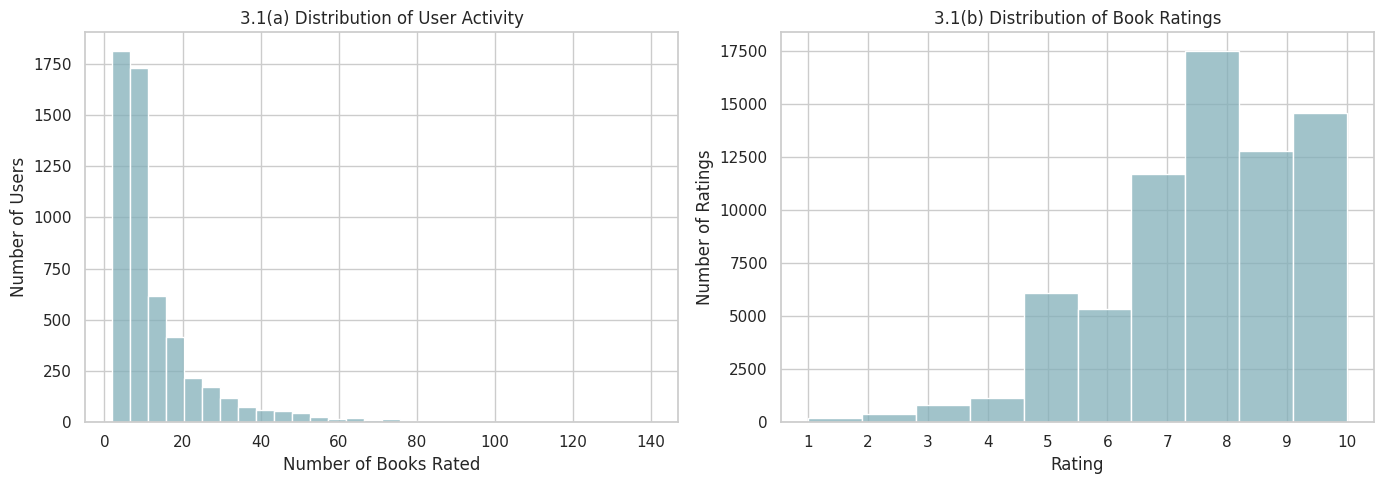

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Custom pastel blend palette
custom_palette = sns.color_palette("blend:#7AB,#EDA", n_colors=12)
# sns.set(style='whitegrid')

# Grouped user rating counts
user_counts = df.groupby('User-ID')['ISBN'].count()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Subplot 1: Number of books rated per user
sns.histplot(user_counts, bins=30, ax=axes[0], color=custom_palette[1])
axes[0].set_title('3.1(a) Distribution of User Activity')
axes[0].set_xlabel('Number of Books Rated')
axes[0].set_ylabel('Number of Users')

# Subplot 2: Distribution of ratings
sns.histplot(df['Book-Rating'], bins=10, kde=False, ax=axes[1], color=custom_palette[1])
axes[1].set_title('3.1(b) Distribution of Book Ratings')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Number of Ratings')
axes[1].set_xticks(range(1, 11))

# Improve layout and save
plt.tight_layout()
plt.savefig('figure_3_1_combined.png')
plt.show()




In [61]:
import pandas as pd
import numpy as np

# .fillna(0) handles cases where a description might be NaN or empty, resulting in 0 words.
df['word_count'] = df['description'].str.split().str.len().fillna(0).astype(int)

# Calculate the statistics
mean_word_count = df['word_count'].mean()
median_word_count = df['word_count'].median()
std_dev_word_count = df['word_count'].std()
min_word_count = df['word_count'].min()
max_word_count = df['word_count'].max()


print(f"On average, the retained book descriptions had:")
print(f"Mean word count: {mean_word_count:.2f} words")
print(f"Median word count: {median_word_count:.0f} words")
print(f"Standard deviation: {std_dev_word_count:.2f} words")
print(f"Minimum–maximum range: {min_word_count:.0f}–{max_word_count:.0f} words")

On average, the retained book descriptions had:
Mean word count: 91.27 words
Median word count: 62 words
Standard deviation: 75.51 words
Minimum–maximum range: 1–324 words


In [62]:
unique_books = df.drop_duplicates(subset=['ISBN'])

unique_theme_df = pd.DataFrame({
    'Count': unique_books['finegrained_Theme'].value_counts(),
    'Percentage': unique_books['finegrained_Theme'].value_counts() / len(unique_books) * 100
}).sort_values('Count', ascending=False)

unique_merged_theme_df= pd.DataFrame({
    'Count': unique_books['broader_genre'].value_counts(),
    'Percentage': unique_books['broader_genre'].value_counts() / len(unique_books) * 100
}).sort_values('Count', ascending=False)


#Now, let's evaluate the entire dataset
entire_theme_df = pd.DataFrame({
    'Count': df['finegrained_Theme'].value_counts(),
    'Percentage': df['finegrained_Theme'].value_counts() / len(df) * 100
}).sort_values('Count', ascending=False)

merged_theme_df= pd.DataFrame({
    'Count': df['broader_genre'].value_counts(),
    'Percentage': df['broader_genre'].value_counts() / len(df) * 100
}).sort_values('Count', ascending=False)



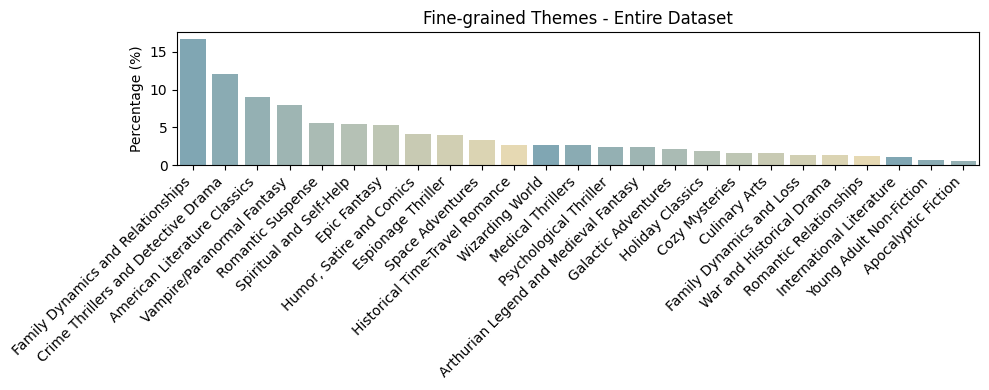

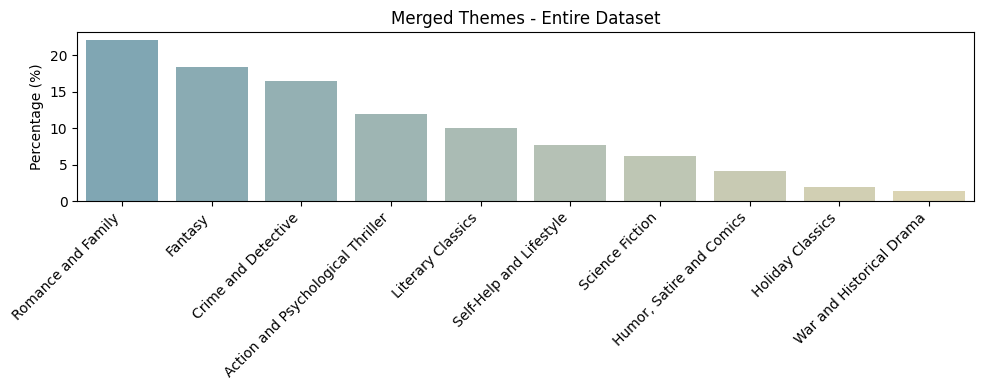

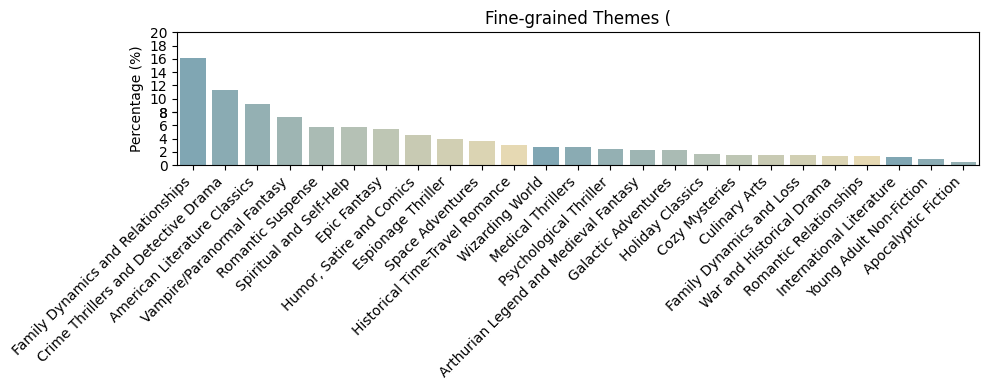

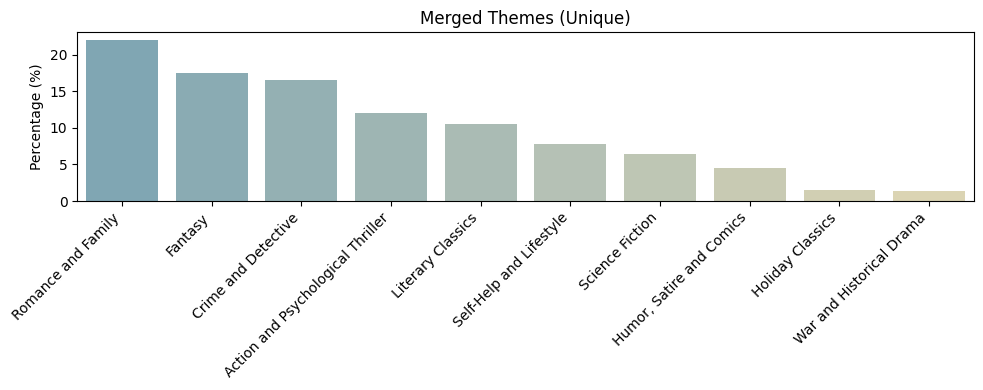

In [8]:
custom_palette = sns.color_palette("blend:#7AB,#EDA", n_colors=11)
plt.figure(figsize=(10, 4))
sns.barplot(x=entire_theme_df.index, y='Percentage', data=entire_theme_df, palette=custom_palette)
plt.title('Fine-grained Themes - Entire Dataset')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentage (%)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
sns.barplot(x=merged_theme_df.index, y='Percentage', data=merged_theme_df, palette=custom_palette)
plt.title('Merged Themes - Entire Dataset')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentage (%)')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
sns.barplot(x=entire_theme_df.index, y='Percentage', data=unique_theme_df, palette=custom_palette)
plt.title('Fine-grained Themes (')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentage (%)')
plt.ylim(0, 20)
plt.yticks([0, 2, 4, 6,8,8,10, 12, 14, 16,18, 20])
plt.tight_layout()
plt.savefig('Themes.png')
plt.show()

plt.figure(figsize=(10, 4))
sns.barplot(x=merged_theme_df.index, y='Percentage', data=unique_merged_theme_df, palette=custom_palette)
plt.title('Merged Themes (Unique)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentage (%)')

plt.tight_layout()
plt.show()

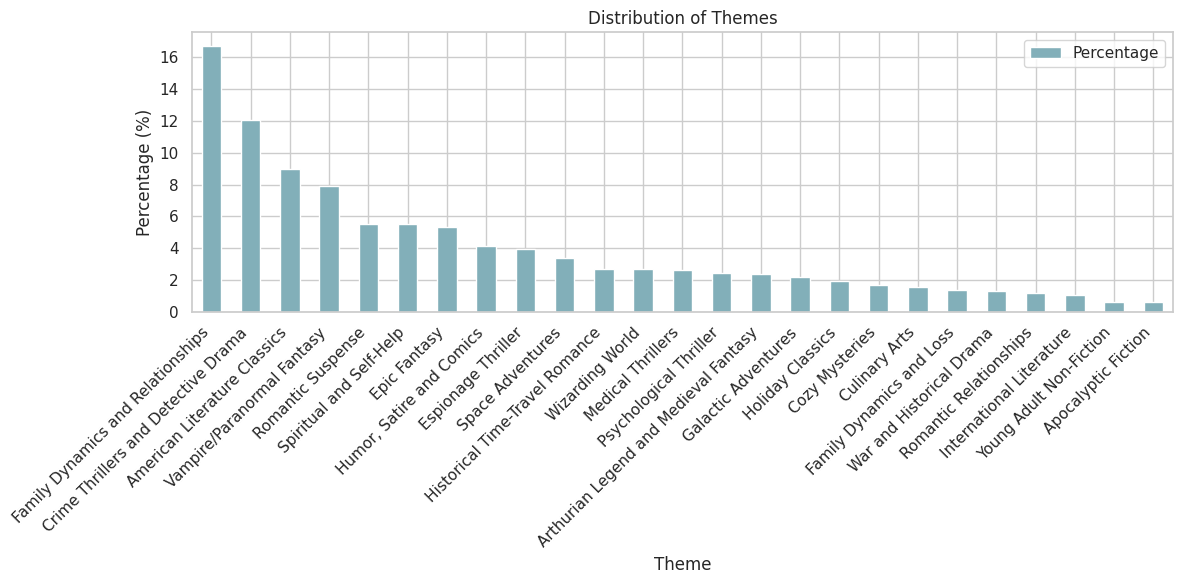

In [9]:
# Custom pastel blend palette
custom_palette = sns.color_palette("blend:#7AB,#EDA", n_colors=12)
sns.set(style='whitegrid')
entire_theme_df.plot(kind='bar', y='Percentage', figsize=(12, 6), color=custom_palette[1])

plt.title("Distribution of Themes")
plt.ylabel("Percentage (%)")
plt.xlabel("Theme")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig('Themes.png')
plt.show()




In [10]:
import pandas as pd

# Function to calculate theme stats
def get_theme_stats(df, col):
    # Unique ISBN-based stats
    unique_books = df.drop_duplicates('ISBN')
    isbn_counts = unique_books[col].value_counts(normalize=True) * 100

    # Rating-based stats (interactions)
    interaction_counts = df[col].value_counts(normalize=True) * 100

    return pd.DataFrame({
        'Theme': isbn_counts.index,
        '% of Unique Books': isbn_counts.values,
        '% of Ratings': interaction_counts.loc[isbn_counts.index].values
    })

# Table 1: Finegrained themes
table1 = get_theme_stats(df, 'finegrained_Theme')

# Table 2: Broader genres
table2 = get_theme_stats(df, 'broader_genre')

# Display or save
print("Finegrained Theme Stats:\n", table1)
print("\nBroader Genre Stats:\n", table2)


Finegrained Theme Stats:
                                     Theme  % of Unique Books  % of Ratings
0       Family Dynamics and Relationships          16.179002     16.739826
1     Crime Thrillers and Detective Drama          11.283228     12.086885
2            American Literature Classics           9.141327      8.980204
3              Vampire/Paranormal Fantasy           7.305412      7.942284
4                       Romantic Suspense           5.775483      5.529438
5                            Epic Fantasy           5.737235      5.366600
6                 Spiritual and Self-Help           5.373876      5.506783
7                Humor, Satire and Comics           4.475043      4.164425
8                      Espionage Thriller           3.863071      3.959106
9                        Space Adventures           3.652706      3.364391
10         Historical Time-Travel Romance           3.040734      2.703124
11                      Medical Thrillers           2.772997      2.647900

## POPULARITY ANALYSIS

## Step 1: Data preparation: We classify top 20% of the books as popular based on number of ratings!

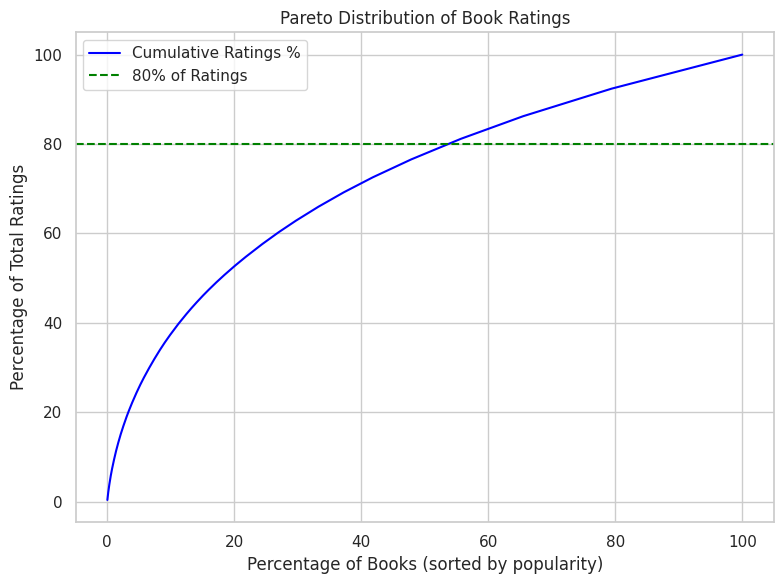

Books %	Ratings %
   5.0%	 25.54%
  10.0%	 37.46%
  20.0%	 52.63%
  30.0%	 63.10%
  50.0%	 77.81%
  80.0%	 92.59%
 100.0%	100.00%


In [11]:
#PARETO-PRINCIPLE ANALYSIS!
ratings_per_book = df.groupby('ISBN').size().rename('num_ratings').reset_index()
ratings_per_book = ratings_per_book.sort_values('num_ratings', ascending=False).reset_index(drop=True)
ratings_per_book['cumulative_ratings'] = ratings_per_book['num_ratings'].cumsum()
total_ratings = ratings_per_book['num_ratings'].sum()
ratings_per_book['cumulative_pct'] = ratings_per_book['cumulative_ratings'] / total_ratings

ratings_per_book['book_pct'] = np.arange(1, len(ratings_per_book)+1) / len(ratings_per_book)

plt.figure(figsize=(8,6))
plt.plot(ratings_per_book['book_pct'] * 100, ratings_per_book['cumulative_pct'] * 100, label='Cumulative Ratings %', color='blue')

plt.axhline(80, color='green', linestyle='--', label='80% of Ratings')
plt.xlabel('Percentage of Books (sorted by popularity)')
plt.ylabel('Percentage of Total Ratings')
plt.title('Pareto Distribution of Book Ratings')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


#for exact counts

ratings_per_book = df.groupby('ISBN').size().rename('num_ratings').reset_index()
ratings_per_book = ratings_per_book.sort_values(by='num_ratings', ascending=False).reset_index(drop=True)

# Cumulative ratings and percentages
ratings_per_book['cumulative_ratings'] = ratings_per_book['num_ratings'].cumsum()
total_ratings = ratings_per_book['num_ratings'].sum()
ratings_per_book['cumulative_pct'] = ratings_per_book['cumulative_ratings'] / total_ratings
ratings_per_book['book_pct'] = (ratings_per_book.index + 1) / len(ratings_per_book)
thresholds = [0.05, 0.10, 0.20, 0.30, 0.50, 0.80, 1.00]

print("Books %\tRatings %")
for t in thresholds:
    row_idx = int(t * len(ratings_per_book)) - 1
    book_pct = (row_idx + 1) / len(ratings_per_book) * 100
    rating_pct = ratings_per_book.iloc[row_idx]['cumulative_pct'] * 100
    print(f"{book_pct:6.1f}%\t{rating_pct:6.2f}%")


In [81]:
# we get number of unique ratings for each ISBN and find popularity ratio as: num ratings/ total number of users
book_popularity = (
    df.groupby('ISBN')['User-ID']
    .nunique()
    .div(df['User-ID'].nunique())
    .rename('popularity_ratio')
    .reset_index()
)

# Calculate 80th percentile threshold using unique books only
popularity_threshold = book_popularity['popularity_ratio'].quantile(0.80)

# Label popular books
book_popularity['is_popular'] = book_popularity['popularity_ratio'] >= popularity_threshold


df = df.merge(book_popularity, on='ISBN', how='left')

# Print results
count_above = book_popularity['is_popular'].sum()
count_total = len(book_popularity)
count_below = count_total - count_above

print(f"Total unique ISBNs: {count_total}")
print(f"Books ABOVE threshold (popular): {count_above} ({(count_above/count_total)*100:.2f}%)")
print(f"Books BELOW threshold: {count_below} ({(count_below/count_total)*100:.2f}%)")


Total unique ISBNs: 5229
Books ABOVE threshold (popular): 1119 (21.40%)
Books BELOW threshold: 4110 (78.60%)


In [13]:
# We shall now plot is_popular books in each theme
(df[df['is_popular']== True].groupby('finegrained_Theme')['ISBN'].nunique().reset_index())



finegrained_Theme  ISBN
0            American Literature Classics   102
1                     Apocalyptic Fiction    12
2   Arthurian Legend and Medieval Fantasy    20
3                          Cozy Mysteries    11
4     Crime Thrillers and Detective Drama   146
5                           Culinary Arts    18
6                            Epic Fantasy    57
7                      Espionage Thriller    52
8                Family Dynamics and Loss    12
9       Family Dynamics and Relationships   197
10                    Galactic Adventures    24
11         Historical Time-Travel Romance    28
12                       Holiday Classics    22
13               Humor, Satire and Comics    50
14               International Literature     6
15                      Medical Thrillers    31
16                 Psychological Thriller    41
17                 Romantic Relationships    11
18                      Romantic Suspense    66
19                       Space Adventures    27
20                Spiritual and Self-Help    61
21             Vampire/Paranormal Fantasy    86
22               War and Historical Drama    11
23                        Wizarding World    24
24                Young Adult Non-Fiction     4

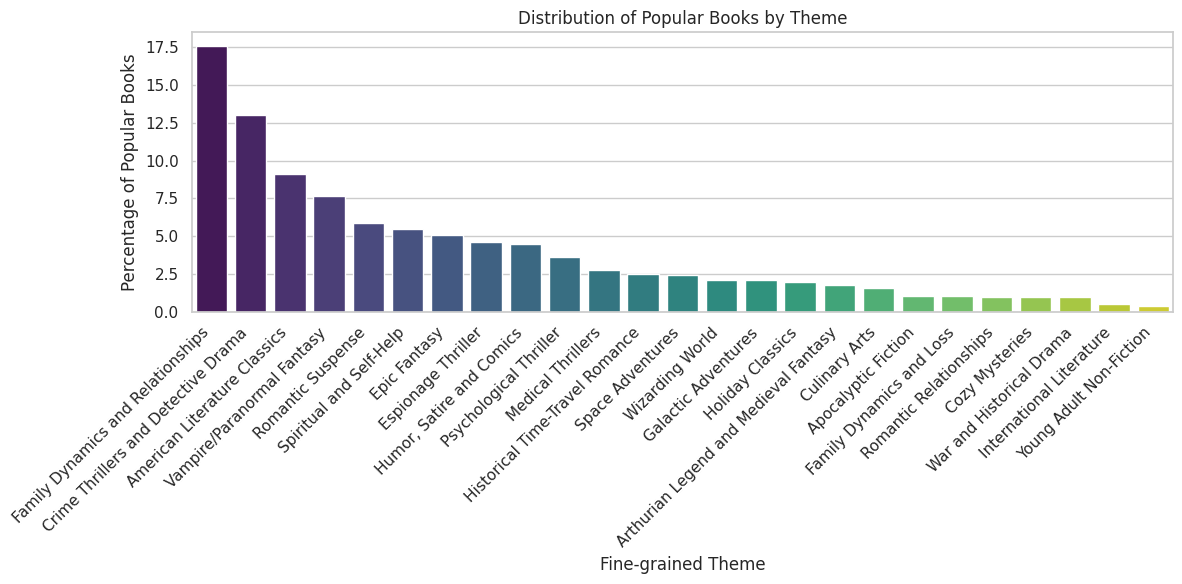

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data
popular_books_per_theme = (
    df.drop_duplicates('ISBN')                         
      .query('is_popular == True')                     
      .groupby('finegrained_Theme')
      .size()
      .reset_index(name='popular_book_count')
)

# Add percentage column
total_popular_books = popular_books_per_theme['popular_book_count'].sum()
popular_books_per_theme['percentage'] = (
    100 * popular_books_per_theme['popular_book_count'] / total_popular_books
).round(2)

# Sort by percentage (optional, for nicer plot)
popular_books_per_theme = popular_books_per_theme.sort_values('percentage', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=popular_books_per_theme,
    x='finegrained_Theme',
    y='percentage',
    palette='viridis'
)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentage of Popular Books')
plt.xlabel('Fine-grained Theme')
plt.title('Distribution of Popular Books by Theme')
plt.tight_layout()
plt.show()


 ### Descriptive Theme Insights

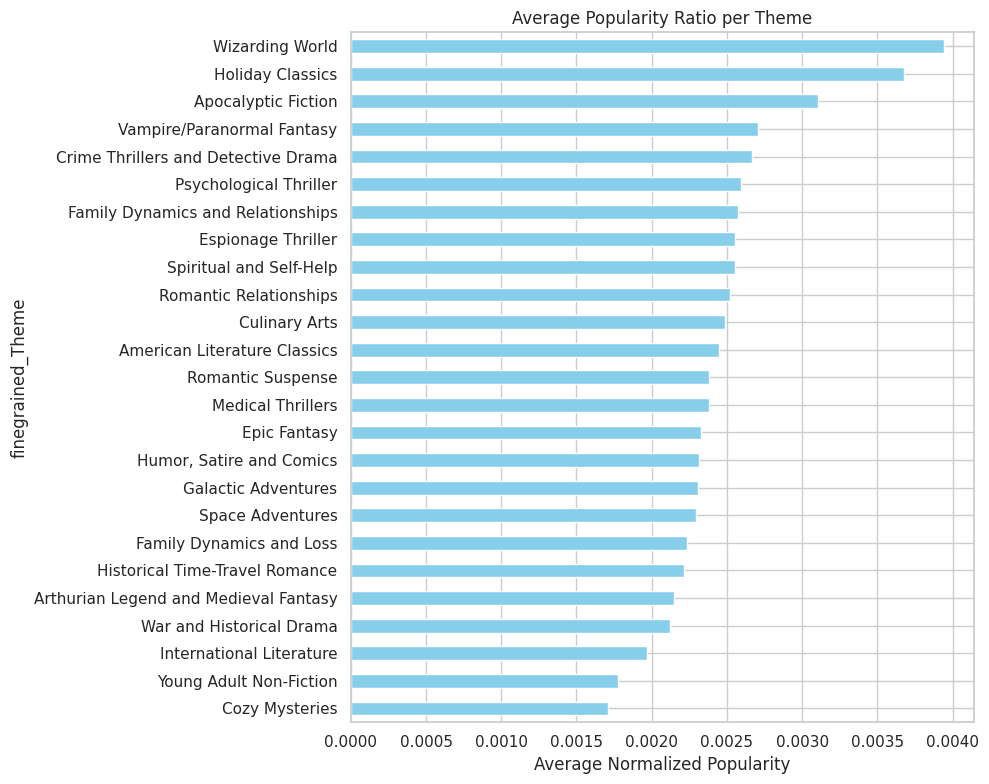

finegrained_Theme
Cozy Mysteries                           0.001710
Young Adult Non-Fiction                  0.001776
International Literature                 0.001970
War and Historical Drama                 0.002119
Arthurian Legend and Medieval Fantasy    0.002146
Historical Time-Travel Romance           0.002214
Family Dynamics and Loss                 0.002237
Space Adventures                         0.002293
Galactic Adventures                      0.002305
Humor, Satire and Comics                 0.002317
Epic Fantasy                             0.002329
Medical Thrillers                        0.002378
Romantic Suspense                        0.002384
American Literature Classics             0.002446
Culinary Arts                            0.002486
Romantic Relationships                   0.002522
Spiritual and Self-Help                  0.002552
Espionage Thriller                       0.002552
Family Dynamics and Relationships        0.002576
Psychological Thriller          

In [14]:
avg_theme_popularity = df.drop_duplicates('ISBN').groupby('finegrained_Theme')['popularity_ratio'].mean().sort_values(ascending=True)

# Plot
plt.figure(figsize=(10, 8))
avg_theme_popularity.plot(kind='barh', color='skyblue')
plt.xlabel('Average Normalized Popularity')
plt.title('Average Popularity Ratio per Theme')
plt.tight_layout()
plt.show()
avg_theme_popularity

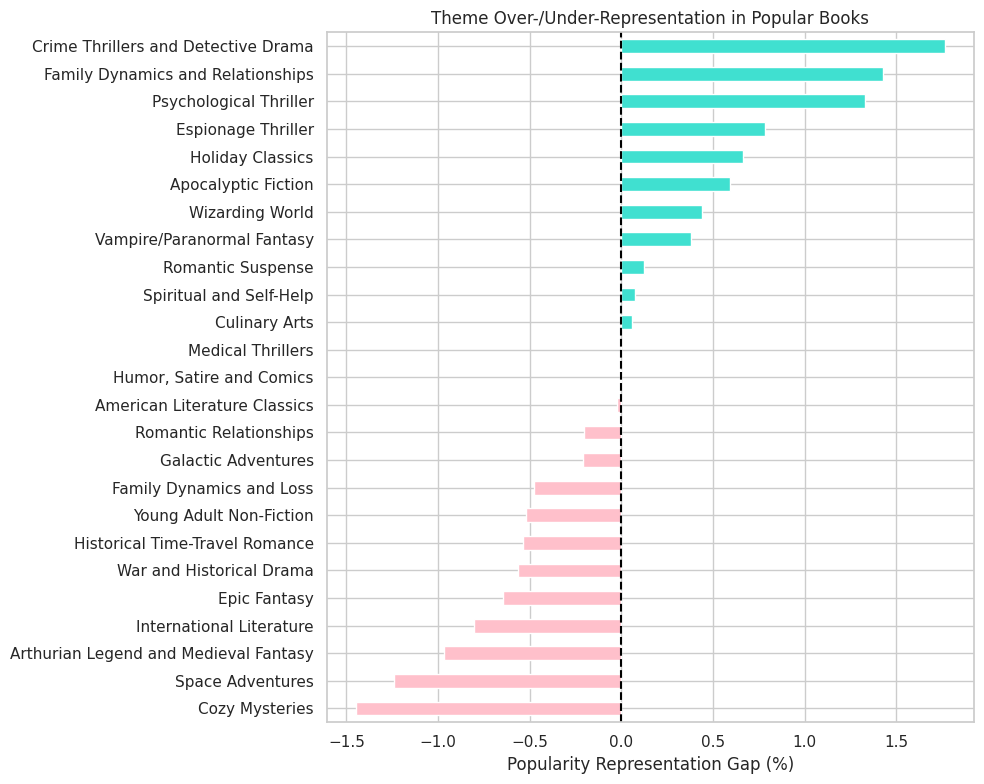

Overall %  Popular %       Gap
Cozy Mysteries                          2.428763   0.983021 -1.445742
Space Adventures                        3.652706   2.412869 -1.239837
Arthurian Legend and Medieval Fantasy   2.753873   1.787310 -0.966563
International Literature                1.338688   0.536193 -0.802495
Epic Fantasy                            5.737235   5.093834 -0.643401
War and Historical Drama                1.549053   0.983021 -0.566033
Historical Time-Travel Romance          3.040734   2.502234 -0.538500
Young Adult Non-Fiction                 0.879709   0.357462 -0.522247
Family Dynamics and Loss                1.549053   1.072386 -0.476667
Galactic Adventures                     2.352266   2.144772 -0.207494
Romantic Relationships                  1.185695   0.983021 -0.202675
American Literature Classics            9.141327   9.115282 -0.026046
Humor, Satire and Comics                4.475043   4.468275 -0.006768
Medical Thrillers                       2.772997   2.770331 -0.002666
Culinary Arts                           1.549053   1.608579  0.059526
Spiritual and Self-Help                 5.373876   5.451296  0.077419
Romantic Suspense                       5.775483   5.898123  0.122640
Vampire/Paranormal Fantasy              7.305412   7.685433  0.380021
Wizarding World                         1.702046   2.144772  0.442726
Apocalyptic Fiction                     0.478103   1.072386  0.594283
Holiday Classics                        1.300440   1.966041  0.665601
Espionage Thriller                      3.863071   4.647006  0.783935
Psychological Thriller                  2.333142   3.663986  1.330844
Family Dynamics and Relationships      16.179002  17.605004  1.426003
Crime Thrillers and Detective Drama    11.283228  13.047364  1.764136

In [15]:
#THIS GRAPHS TELLS US WHICH THEMES ARE OVER OR UNDER REPRESENTED IN POPULAR BOOKS AS COMPARED TO THE ORIGINAL DISTRIBUTION

books_df = df.drop_duplicates('ISBN')[['ISBN', 'finegrained_Theme', 'is_popular']]

# Theme share in total catalog
theme_total = books_df['finegrained_Theme'].value_counts(normalize=True)
# Theme share in popular books
theme_popular = books_df[books_df['is_popular']]['finegrained_Theme'].value_counts(normalize=True)

# Combine
theme_gap = pd.DataFrame({
    'Overall %': theme_total * 100,
    'Popular %': theme_popular * 100
}).fillna(0)

# Calculate the over/under-representation gap
theme_gap['Gap'] = theme_gap['Popular %'] - theme_gap['Overall %']
theme_gap = theme_gap.sort_values('Gap', ascending=True)  # sort by gap

# Plot
plt.figure(figsize=(10, 8))
theme_gap['Gap'].plot(kind='barh', color=['pink' if g < 0 else 'turquoise' for g in theme_gap['Gap']])
plt.xlabel('Popularity Representation Gap (%)')
plt.title('Theme Over-/Under-Representation in Popular Books')
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()
theme_gap

In [16]:
from scipy.stats import chi2_contingency

# Quick significance test for each theme
themes_test = books_df['finegrained_Theme'].value_counts()
themes_test = themes_test[themes_test >= 5].index  # Min 5 books per theme

results = []
for theme in themes_test:
    # 2x2 table: Popular vs Theme presence
    contingency = pd.crosstab(books_df['is_popular'], books_df['finegrained_Theme'] == theme)
    chi2, p_val, _, _ = chi2_contingency(contingency)
    
    # Calculate theme's actual popularity rate
    theme_books = books_df[books_df['finegrained_Theme'] == theme]
    pop_rate = theme_books['is_popular'].mean()
    
    results.append({
        'Theme': theme,
        'N_Books': len(theme_books),
        'N_Popular': theme_books['is_popular'].sum(),
        'Pop_Rate': pop_rate,
        'Expected_Rate': 0.20,
        'Difference': pop_rate - 0.20,
        'P_Value': p_val,
        'Significant': p_val < 0.05,
        'Bias_Type': 'Over' if pop_rate > 0.20 else 'Under'
    })

# Create clean results DataFrame
results_df = pd.DataFrame(results)
significant_df = results_df[results_df['Significant']].sort_values('P_Value')

significant_df


Theme  N_Books  N_Popular  Pop_Rate  \
13                         Cozy Mysteries      127         11  0.086614   
15                 Psychological Thriller      122         41  0.336066   
24                    Apocalyptic Fiction       25         12  0.480000   
20               International Literature       70          6  0.085714   
9                        Space Adventures      191         27  0.141361   
12  Arthurian Legend and Medieval Fantasy      144         20  0.138889   
21                       Holiday Classics       68         22  0.323529   
1     Crime Thrillers and Detective Drama      590        146  0.247458   

    Expected_Rate  Difference   P_Value  Significant Bias_Type  
13            0.2   -0.113386  0.000595         True     Under  
15            0.2    0.136066  0.001305         True      Over  
24            0.2    0.280000  0.002645         True      Over  
20            0.2   -0.114286  0.012846         True     Under  
9             0.2   -0.058639  0.016225         True     Under  
12            0.2   -0.061111  0.033541         True     Under  
21            0.2    0.123529  0.038647         True      Over  
1             0.2    0.047458  0.040309         True      Over

## Here we will finally compare all the themes we got in the recommendations!

## We are analysing the top-n recommendations now, nothing related to populairty, just represenations

In [17]:
rec_MF = pd.read_csv('recommendations_finetuned_thrMF.csv')
rec_MostPop = pd.read_csv('recommendations_finetuned_thrMostPop.csv')
rec_NeuMF = pd.read_csv('recommendations_finetuned_thrNeuMF.csv')
rec_NMF = pd.read_csv('recommendations_finetuned_thrNMF.csv')
rec_PF = pd.read_csv('recommendations_finetuned_thrPF.csv')
rec_PMF = pd.read_csv('recommendations_finetuned_thrPMF.csv')
rec_random = pd.read_csv('recommendations_finetuned_random_thr.csv')
rec_UserKNN = pd.read_csv('recommendations_finetuned_thrUserKNN.csv')
rec_VAECF = pd.read_csv('recommendations_finetuned_thrVAECF.csv')
rec_WMF = pd.read_csv('recommendations_finetuned_thrWMF.csv')
rec_BPR = pd.read_csv('recommendations_finetuned_thrBPR.csv')

In [18]:
rec_dfs = {
    'Random': rec_random,
    'MostPop': rec_MostPop,
    'UserKNN': rec_UserKNN,
    'WMF': rec_WMF,
    'BPR': rec_BPR,
    'MF': rec_MF,
    'NMF': rec_NMF,
    'PF': rec_PF,
    'PMF': rec_PMF,
    'NeuMF': rec_NeuMF,
    'VAECF': rec_VAECF,
    
}
rec_dfs

{'Random':        user_id     item_id  score
 0       232052  0451163494    1.0
 1       232052  0553560204    1.0
 2       232052  0671868071    1.0
 3       232052  0811214982    1.0
 4       232052  0671032550    1.0
 ...        ...         ...    ...
 54165   196085  0671502689    1.0
 54166   196085  0440212359    1.0
 54167   196085  0345435249    1.0
 54168   196085  0140092501    1.0
 54169   196085  0345435338    1.0
 
 [54170 rows x 3 columns],
 'MostPop':        user_id     item_id  score
 0       232052  0385504209  182.0
 1       232052  0312195516  125.0
 2       232052  0142001740  124.0
 3       232052  0060928336  124.0
 4       232052  0446672211  124.0
 ...        ...         ...    ...
 54165   196085  0971880107  118.0
 54166   196085  059035342X  110.0
 54167   196085  0452282152  108.0
 54168   196085  0345337662  106.0
 54169   196085  0671027360  104.0
 
 [54170 rows x 3 columns],
 'UserKNN':        user_id     item_id      score
 0       232052  0767905180  12

In [22]:
# Clean catalog for unique books and themes
catalog_books = df.drop_duplicates('ISBN')[['ISBN', 'finegrained_Theme']]

# Theme distribution in catalog
catalog_theme_counts = catalog_books['finegrained_Theme'].value_counts()
catalog_theme_pct = catalog_theme_counts / catalog_theme_counts.sum()

In [23]:
theme_ratio_results = []

for algo_name, rec_df in rec_dfs.items():
    # Drop duplicate ISBNs from recs
    rec_books = rec_df.drop_duplicates('item_id')[['item_id']].rename(columns={'item_id': 'ISBN'})

    # Merge with theme info
    rec_books = rec_books.merge(df[['ISBN', 'finegrained_Theme']], on='ISBN', how='left')
    rec_books = rec_books.dropna(subset=['finegrained_Theme'])

    # Count unique themes in recs
    rec_theme_counts = rec_books['finegrained_Theme'].value_counts()
    rec_theme_pct = rec_theme_counts / rec_theme_counts.sum()

    # Compare with catalog and compute ratio
    for theme in catalog_theme_pct.index:
        catalog_pct = catalog_theme_pct.get(theme, 0)
        rec_pct = rec_theme_pct.get(theme, 0)
        ratio = rec_pct / catalog_pct if catalog_pct > 0 else 0

        theme_ratio_results.append({
            'Algorithm': algo_name,
            'Theme': theme,
            '% in Catalog': round(catalog_pct * 100, 2),
            '% in Recs': round(rec_pct * 100, 2),
            'Ratio': round(ratio, 2),
            
        })


In [24]:
theme_ratio_df = pd.DataFrame(theme_ratio_results)
theme_ratio_wide = theme_ratio_df.pivot(index='Theme', columns='Algorithm', values='Ratio')
theme_ratio_wide = theme_ratio_wide.reset_index().fillna(0)

# theme_ratio_df = theme_ratio_df.sort_values(by=['Algorithm', 'Ratio'], ascending=[True, False])
# display(theme_ratio_df.head(25)) 
theme_ratio_wide


Algorithm                                  Theme   BPR    MF  MostPop   NMF  \
0                   American Literature Classics  0.69  1.13     1.02  1.17   
1                            Apocalyptic Fiction  1.39  1.27     0.00  1.28   
2          Arthurian Legend and Medieval Fantasy  0.81  0.85     0.00  0.94   
3                                 Cozy Mysteries  0.13  0.53     0.00  0.70   
4            Crime Thrillers and Detective Drama  1.19  0.83     0.00  0.58   
5                                  Culinary Arts  0.66  0.81     0.00  0.96   
6                                   Epic Fantasy  1.00  1.07     1.52  1.07   
7                             Espionage Thriller  1.00  0.76     0.00  0.66   
8                       Family Dynamics and Loss  0.64  0.85     0.00  0.76   
9              Family Dynamics and Relationships  0.99  1.01     0.61  0.93   
10                           Galactic Adventures  1.01  1.04     0.00  1.04   
11                Historical Time-Travel Romance  0.87  0.76     0.00  0.91   
12                              Holiday Classics  2.60  1.77     0.00  1.06   
13                      Humor, Satire and Comics  0.77  1.00     0.00  1.14   
14                      International Literature  0.53  0.76     6.13  1.08   
15                             Medical Thrillers  0.72  0.82     0.00  0.77   
16                        Psychological Thriller  1.08  0.84     0.00  0.95   
17                        Romantic Relationships  1.00  1.28     0.00  1.05   
18                             Romantic Suspense  1.03  0.71     0.00  0.72   
19                              Space Adventures  1.02  0.94     2.53  1.23   
20                       Spiritual and Self-Help  0.88  1.29     1.93  1.43   
21                    Vampire/Paranormal Fantasy  1.42  1.22     4.77  1.34   
22                      War and Historical Drama  0.30  1.01     0.00  1.23   
23                               Wizarding World  3.46  2.51     5.49  2.54   
24                       Young Adult Non-Fiction  0.00  0.41     0.00  0.41   

Algorithm  NeuMF    PF   PMF  Random  UserKNN  VAECF   WMF  
0           0.89  0.91  1.08    0.98     1.09   0.90  0.99  
1           1.71  1.60  1.60    1.25     1.02   1.49  1.26  
2           0.84  0.49  0.87    0.86     0.68   0.52  0.85  
3           0.18  0.04  0.59    0.69     0.66   0.16  0.69  
4           1.34  1.11  0.93    1.07     0.90   1.22  1.07  
5           0.69  0.98  0.86    1.00     0.74   0.66  0.96  
6           0.97  0.97  0.99    0.94     1.01   1.10  0.93  
7           0.89  1.24  0.85    1.03     0.82   0.87  1.02  
8           0.41  0.59  0.78    0.90     0.80   0.28  0.92  
9           0.88  0.98  0.97    1.03     0.97   0.91  1.03  
10          0.91  0.95  1.07    0.93     0.92   1.16  0.92  
11          0.47  0.73  0.88    0.89     0.84   0.94  0.89  
12          1.74  2.23  1.70    1.48     1.79   2.08  1.48  
13          0.70  0.45  1.01    0.93     1.08   0.79  0.92  
14          0.88  0.65  0.71    0.79     0.73   0.73  0.79  
15          0.44  0.55  0.86    0.96     0.87   0.68  0.95  
16          0.26  0.53  0.95    1.04     1.03   0.98  1.07  
17          1.45  1.16  1.15    1.01     1.04   0.84  1.01  
18          0.98  0.79  0.83    0.96     0.80   0.90  0.95  
19          1.13  0.97  1.01    0.92     1.10   1.02  0.92  
20          0.95  1.35  1.15    1.02     1.20   0.97  1.02  
21          1.64  1.46  1.19    1.09     1.24   1.60  1.09  
22          0.00  0.61  0.92    0.85     0.85   0.39  0.86  
23          4.50  4.04  2.11    1.58     2.32   3.04  1.61  
24          0.00  0.00  0.63    0.71     0.60   0.05  0.69

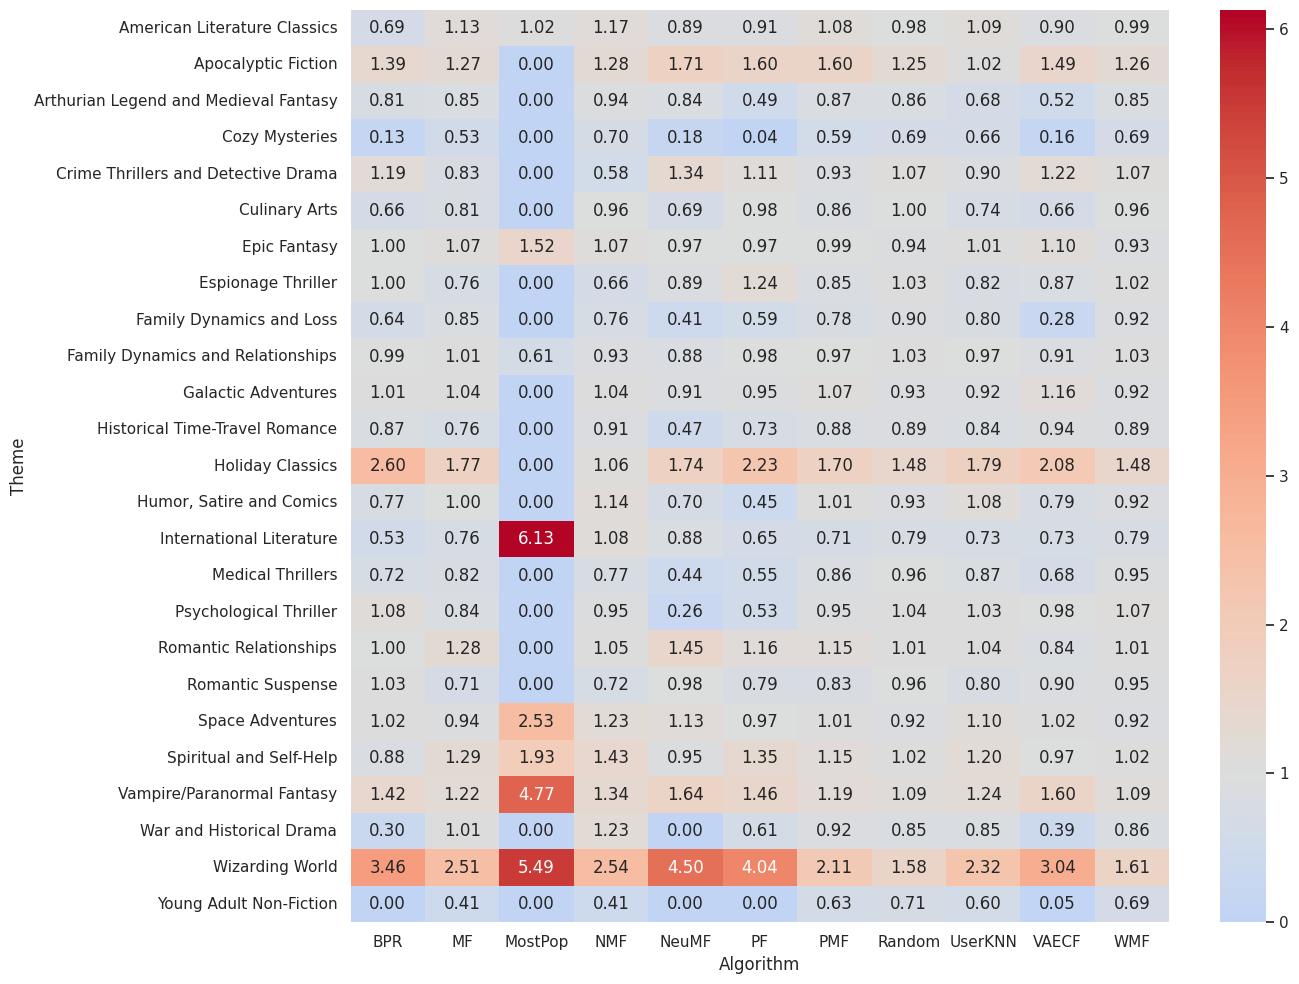

In [88]:

# Pivot for heatmap: Themes (rows) x Algorithms (columns)
heatmap_df = theme_ratio_df.pivot(index='Theme', columns='Algorithm', values='Ratio').fillna(0)

# Plot
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_df, annot=True, fmt=".2f", cmap='coolwarm', center=1.0)
plt.xlabel('Algorithm')
plt.ylabel('Theme')
plt.tight_layout()
plt.savefig('er.png')
plt.show()


In [26]:
from scipy.stats import chi2_contingency
import pandas as pd

def test_theme_significance(rec_dfs, books_df):
    """Test if recommendation theme distributions significantly differ from dataset baseline"""
    
    # Get dataset theme baseline
    dataset_themes = books_df['finegrained_Theme'].value_counts()
    total_books = len(books_df)
    
    results = []
    
    for alg_name, rec_df in rec_dfs.items():
        # Merge recommendations with book themes using ISBN/item_id
        rec_with_themes = rec_df.merge(books_df[['ISBN', 'finegrained_Theme']], 
                                     left_on='item_id', right_on='ISBN', how='left')
        
        # Get theme counts in recommendations
        rec_items = rec_with_themes['finegrained_Theme'].value_counts()
        total_recs = rec_items.sum()
        
        for theme in dataset_themes.index:
            if dataset_themes[theme] >= 5:  # Min threshold
                # 2x2 contingency table
                theme_in_recs = rec_items.get(theme, 0)
                theme_not_in_recs = total_recs - theme_in_recs
                theme_in_dataset = dataset_themes[theme]
                theme_not_in_dataset = total_books - theme_in_dataset
                
                contingency = [[theme_in_recs, theme_not_in_recs],
                              [theme_in_dataset, theme_not_in_dataset]]
                
                chi2, p_val, _, _ = chi2_contingency(contingency)
                
                # Calculate actual vs expected rates
                rec_rate = theme_in_recs / total_recs if total_recs > 0 else 0
                dataset_rate = theme_in_dataset / total_books
                bias_ratio = rec_rate / dataset_rate if dataset_rate > 0 else 0
                
                results.append({
                    'Algorithm': alg_name,
                    'Theme': theme,
                    'Rec_Rate': rec_rate,
                    'Dataset_Rate': dataset_rate,
                    'Bias_Ratio': bias_ratio,
                    'P_Value': p_val,
                    'Significant': p_val < 0.05
                })
    
    return pd.DataFrame(results)

# Run the test
significance_results = test_theme_significance(rec_dfs, books_df)
significant_biases = significance_results[significance_results['Significant']].sort_values('P_Value')
print(f"Found {len(significant_biases)} significant thematic biases")
significant_biases

Found 193 significant thematic biases


Algorithm                                  Theme  Rec_Rate  Dataset_Rate  \
125        MF      Family Dynamics and Relationships  0.035462      0.161790   
26    MostPop    Crime Thrillers and Detective Drama  0.000000      0.112832   
29    MostPop                      Romantic Suspense  0.000000      0.057755   
126        MF    Crime Thrillers and Detective Drama  0.011556      0.112832   
151       NMF    Crime Thrillers and Detective Drama  0.020288      0.112832   
..        ...                                    ...       ...           ...   
99        WMF                    Apocalyptic Fiction  0.007421      0.004781   
146        MF                       Holiday Classics  0.016873      0.013004   
156       NMF                Spiritual and Self-Help  0.060864      0.053739   
162       NMF  Arthurian Legend and Medieval Fantasy  0.032749      0.027539   
76        WMF    Crime Thrillers and Detective Drama  0.122245      0.112832   

     Bias_Ratio   P_Value  Significant  
125    0.219188  0.000000         True  
26     0.000000  0.000000         True  
29     0.000000  0.000000         True  
126    0.102419  0.000000         True  
151    0.179807  0.000000         True  
..          ...       ...          ...  
99     1.552193  0.038237         True  
146    1.297469  0.041528         True  
156    1.132589  0.041591         True  
162    1.189189  0.046113         True  
76     1.083420  0.049076         True  

[193 rows x 7 columns]

In [27]:
#LINKING POPULAIRTY AND THEME REPRESENTATION

from scipy.stats import pearsonr

# Prepare data - merge gap and ratios
gap_dict = theme_gap.set_index(theme_gap.index)['Gap'].to_dict()

# Calculate correlations for each algorithm
algorithms = ['BPR', 'MF', 'MostPop', 'NMF', 'NeuMF', 'PF', 'PMF', 'Random', 'UserKNN', 'VAECF', 'WMF']
results = []

for alg in algorithms:
    # Get gap and ratio values for each theme
    gaps = []
    ratios = []
    
    for _, row in theme_ratio_wide.iterrows():
        theme = row['Theme']
        ratio = row[alg]
        
        if theme in gap_dict and ratio > 0:  # Exclude 0 ratios
            gaps.append(gap_dict[theme])
            ratios.append(ratio)
    
    # Calculate correlation
    if len(gaps) > 2:
        corr, p_val = pearsonr(gaps, ratios)
        results.append({
            'Algorithm': alg,
            'Correlation': round(corr, 3),
            'P_Value': round(p_val, 4),
            'N_Themes': len(gaps)
        })

# Results
corr_results = pd.DataFrame(results).sort_values('Correlation', ascending=False)
print("Popularity Amplification Rankings:")
print(corr_results)


Popularity Amplification Rankings:
   Algorithm  Correlation  P_Value  N_Themes
7     Random        0.583   0.0022        25
10       WMF        0.581   0.0023        25
9      VAECF        0.442   0.0268        25
0        BPR        0.416   0.0434        24
6        PMF        0.357   0.0795        25
5         PF        0.354   0.0896        24
8    UserKNN        0.317   0.1222        25
1         MF        0.273   0.1866        25
4      NeuMF        0.241   0.2690        23
3        NMF        0.033   0.8752        25
2    MostPop       -0.209   0.6199         8


In [28]:
ratio_threshold = np.std(theme_ratio_wide[algorithms].values) 
gap_threshold = np.std(theme_gap['Gap'])


(ratio_threshold, gap_threshold)

(0.7433126514806806, 0.7875866767449)

In [29]:
# Theme-level analysis for each algorithm
def theme_level_analysis():
  # Merge data
  analysis_df = theme_ratio_wide.merge(
      theme_gap[['Gap']].reset_index().rename(columns={'index': 'Theme'}), 
      on='Theme'
  )
  
  algorithms = ['BPR', 'MF', 'MostPop', 'NMF', 'NeuMF', 'PF', 'PMF', 'Random', 'UserKNN', 'VAECF', 'WMF']
  
  for alg in algorithms:
      print(f"\n=== {alg} Theme Analysis ===")
      
      # Create comparison
      df = analysis_df[['Theme', 'Gap', alg]].copy()
      df = df[df[alg] > 0]  # Exclude zero ratios
      
      # Add alignment category
      df['Alignment'] = df.apply(lambda row: 
          'Amplifies' if (row['Gap'] > 0 and row[alg] > 1) or (row['Gap'] < 0 and row[alg] < 1)
          else 'Counters' if (row['Gap'] > 0 and row[alg] < 1) or (row['Gap'] < 0 and row[alg] > 1)  
          else 'Neutral', axis=1
      )
      
      # Sort by gap and show top patterns
      df_sorted = df.sort_values('Gap', ascending=False)
      print(df_sorted[['Theme', 'Gap', alg, 'Alignment']].round(2).to_string(index=False))
      
      # Summary
      amplifies = len(df[df['Alignment'] == 'Amplifies'])
      counters = len(df[df['Alignment'] == 'Counters'])
      print(f"Summary: {amplifies} themes amplified, {counters} themes countered")

theme_level_analysis()


=== BPR Theme Analysis ===
                                Theme   Gap  BPR Alignment
  Crime Thrillers and Detective Drama  1.76 1.19 Amplifies
    Family Dynamics and Relationships  1.43 0.99  Counters
               Psychological Thriller  1.33 1.08 Amplifies
                   Espionage Thriller  0.78 1.00   Neutral
                     Holiday Classics  0.67 2.60 Amplifies
                  Apocalyptic Fiction  0.59 1.39 Amplifies
                      Wizarding World  0.44 3.46 Amplifies
           Vampire/Paranormal Fantasy  0.38 1.42 Amplifies
                    Romantic Suspense  0.12 1.03 Amplifies
              Spiritual and Self-Help  0.08 0.88  Counters
                        Culinary Arts  0.06 0.66  Counters
                    Medical Thrillers -0.00 0.72 Amplifies
             Humor, Satire and Comics -0.01 0.77 Amplifies
         American Literature Classics -0.03 0.69 Amplifies
               Romantic Relationships -0.20 1.00   Neutral
                  Galactic A

KeyError: 'Gap'

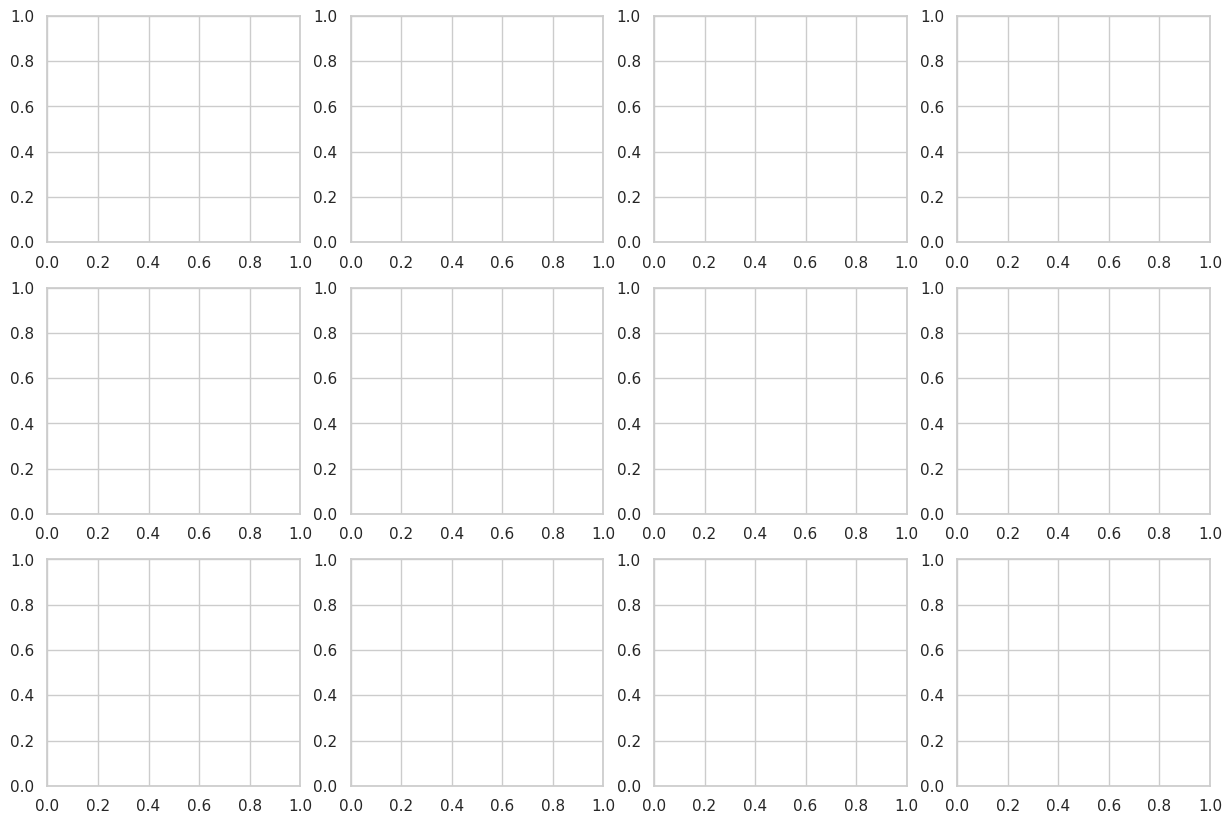

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Merge data
# df = theme_ratio_wide.merge(theme_gap[['Gap']].reset_index().rename(columns={'index': 'Theme'}), on='Theme')
algorithms = ['BPR', 'MF', 'MostPop', 'NMF', 'NeuMF', 'PF', 'PMF', 'Random', 'UserKNN', 'VAECF', 'WMF']

# Plot without significance filtering
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
axes = axes.flatten()

for i, alg in enumerate(algorithms):
   ax = axes[i]
   
   # Categorize behaviors using simple thresholds
   def categorize(row):
       gap, ratio = row['Gap'], row[alg]
       if gap > 0 and ratio > 1:  # pos-pos
           return 'Amplifies Popular'
       elif gap < 0 and ratio < 1:  # neg-neg
           return 'Amplifies Unpopular'
       elif gap > 0 and ratio < 1:  # pos-neg
           return 'Counters Popular'
       elif gap < 0 and ratio > 1:  # neg-pos
           return 'Counters Unpopular'
       else:
           return 'Neutral'
   
   df['Behavior'] = df.apply(categorize, axis=1)
   
   colors = {'Amplifies Popular': 'red', 'Amplifies Unpopular': 'orange', 
             'Counters Popular': 'blue', 'Counters Unpopular': 'cyan', 
             'Neutral': 'green'}
   
   for behavior, color in colors.items():
       subset = df[df['Behavior'] == behavior]
       if len(subset) > 0:
           ax.scatter(subset['Gap'], subset[alg], c=color, alpha=0.7)
   
   ax.axhline(1, color='black', linestyle='--', alpha=0.3)
   ax.axvline(0, color='black', linestyle='--', alpha=0.3)
   ax.set_title(alg)
   ax.set_xlabel('Popularity Gap')
   ax.set_ylabel('Exposure Ratio')
   ax.grid(True, alpha=0.2)

axes[-1].remove()

# Add legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8) 
          for color in colors.values()]
labels = list(colors.keys())


fig.legend(handles, labels, loc='lower right', bbox_to_anchor=(0.98, 0.02))
fig.suptitle("Theme level Popularity Amplification", fontsize=16, y=1.03)
plt.tight_layout()
plt.show()

In [29]:
def theme_analysis_double_significance():
   # Get themes with significant popularity gaps
   pop_significant_themes = set(significant_df['Theme'])  # From earlier popularity analysis
   
   # Get algorithm-theme pairs with significant recommendation bias  
   rec_sig_lookup = set(zip(significant_biases['Algorithm'], significant_biases['Theme']))
   
   # Merge data
   analysis_df = theme_ratio_wide.merge(
       theme_gap[['Gap']].reset_index().rename(columns={'index': 'Theme'}), 
       on='Theme'
   )
   
   algorithms = ['BPR', 'MF', 'MostPop', 'NMF', 'NeuMF', 'PF', 'PMF', 'Random', 'UserKNN', 'VAECF', 'WMF']
   
   for alg in algorithms:
       print(f"\n=== {alg} - Double Significance (Pop + Rec) ===")
       
       df = analysis_df[['Theme', 'Gap', alg]].copy()
       # Keep ALL data including 0 ratios
       
       df['Pop_Significant'] = df['Theme'].isin(pop_significant_themes)
       df['Rec_Significant'] = df['Theme'].apply(lambda theme: (alg, theme) in rec_sig_lookup)
       df['Both_Significant'] = df['Pop_Significant'] & df['Rec_Significant']
       
       df['Alignment'] = df.apply(lambda row: 
           'Complete Avoidance' if row['Both_Significant'] and row[alg] == 0
           else 'Amplifies' if row['Both_Significant'] and (
               (row['Gap'] > 0 and row[alg] > 1) or (row['Gap'] < 0 and row[alg] < 1)
           )
           else 'Counters' if row['Both_Significant'] and (
               (row['Gap'] > 0 and row[alg] < 1) or (row['Gap'] < 0 and row[alg] > 1)
           )
           else 'Not Significant', axis=1
       )
       
       df_sorted = df.sort_values('Gap', ascending=False)
       print(df_sorted[['Theme', 'Gap', alg, 'Alignment']].round(2).to_string(index=False))
       
       amplifies = len(df[df['Alignment'] == 'Amplifies'])
       counters = len(df[df['Alignment'] == 'Counters'])
       avoids = len(df[df['Alignment'] == 'Complete Avoidance'])
       not_sig = len(df[df['Alignment'] == 'Not Significant'])
       
       print(f"Summary: {amplifies} amplified, {counters} countered, {avoids} avoided, {not_sig} not double-significant")

print("=== ANALYSIS 2: SIGNIFICANCE (POPULARITY + RECOMMENDATION) ===")
theme_analysis_double_significance()

=== ANALYSIS 2: SIGNIFICANCE (POPULARITY + RECOMMENDATION) ===

=== BPR - Double Significance (Pop + Rec) ===
                                Theme   Gap  BPR       Alignment
  Crime Thrillers and Detective Drama  1.76 1.19       Amplifies
    Family Dynamics and Relationships  1.43 0.99 Not Significant
               Psychological Thriller  1.33 1.08       Amplifies
                   Espionage Thriller  0.78 1.00 Not Significant
                     Holiday Classics  0.67 2.60       Amplifies
                  Apocalyptic Fiction  0.59 1.39       Amplifies
                      Wizarding World  0.44 3.46 Not Significant
           Vampire/Paranormal Fantasy  0.38 1.42 Not Significant
                    Romantic Suspense  0.12 1.03 Not Significant
              Spiritual and Self-Help  0.08 0.88 Not Significant
                        Culinary Arts  0.06 0.66 Not Significant
                    Medical Thrillers -0.00 0.72 Not Significant
             Humor, Satire and Comics -0.01 0

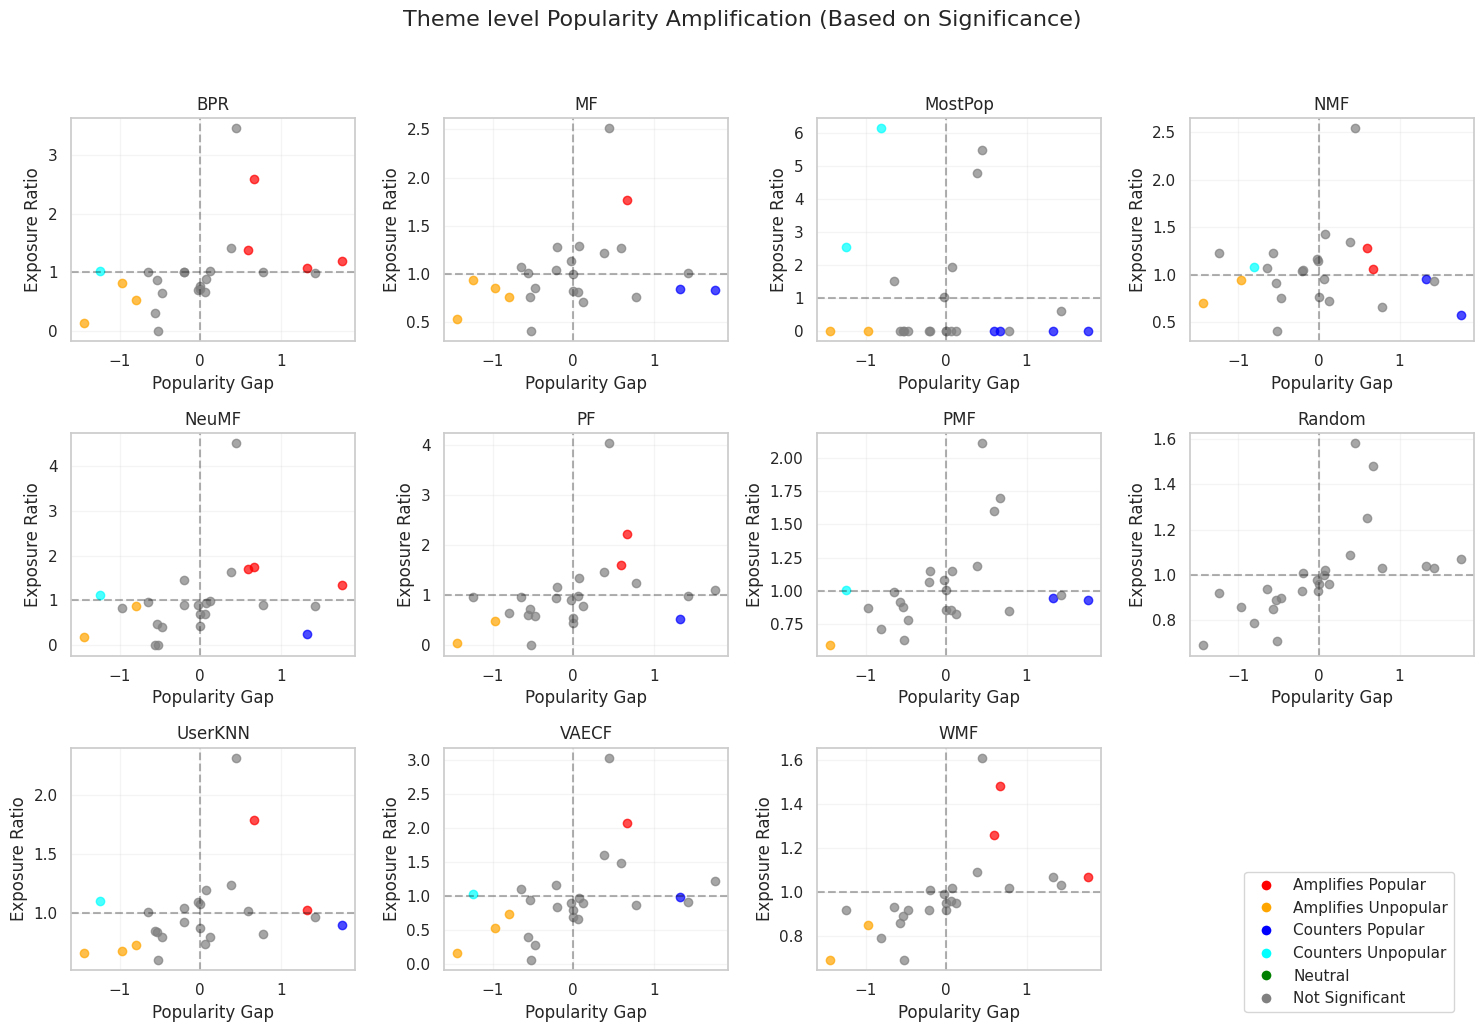

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Get significant themes and biases
pop_sig = set(significant_df['Theme'])
rec_sig = set(zip(significant_biases['Algorithm'], significant_biases['Theme']))

# Merge data
df = theme_ratio_wide.merge(theme_gap[['Gap']].reset_index().rename(columns={'index': 'Theme'}), on='Theme')
algorithms = ['BPR', 'MF', 'MostPop', 'NMF', 'NeuMF', 'PF', 'PMF', 'Random', 'UserKNN', 'VAECF', 'WMF']

# 1. Plot
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
axes = axes.flatten()

for i, alg in enumerate(algorithms):
   ax = axes[i]
   
   # Categorize behaviors
   def categorize(row):
       if row['Theme'] not in pop_sig or (alg, row['Theme']) not in rec_sig:
           return 'Not Significant'
       elif row['Gap'] > 0 and row[alg] > 1:  # pos-pos
           return 'Amplifies Popular'
       elif row['Gap'] < 0 and row[alg] < 1:  # neg-neg  
           return 'Amplifies Unpopular'
       elif row['Gap'] > 0 and row[alg] < 1:  # pos-neg
           return 'Counters Popular'
       elif row['Gap'] < 0 and row[alg] > 1:  # neg-pos
           return 'Counters Unpopular'
       else:
           return 'Neutral'
   
   df['Behavior'] = df.apply(categorize, axis=1)
   
   colors = {'Amplifies Popular': 'red', 'Amplifies Unpopular': 'orange', 
             'Counters Popular': 'blue', 'Counters Unpopular': 'cyan', 
             'Neutral': 'green', 'Not Significant': 'gray'}
   
   for behavior, color in colors.items():
       subset = df[df['Behavior'] == behavior]
       if len(subset) > 0:
           ax.scatter(subset['Gap'], subset[alg], c=color, label=behavior, alpha=0.7)
   
   ax.axhline(1, color='black', linestyle='--', alpha=0.3)
   ax.axvline(0, color='black', linestyle='--', alpha=0.3)
   ax.set_title(alg)
   ax.set_xlabel('Popularity Gap')
   ax.set_ylabel('Exposure Ratio')
   ax.grid(True, alpha=0.2)

axes[-1].remove()

# Add legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8) 
          for color in colors.values()]
labels = list(colors.keys())
fig.legend(handles, labels, loc='lower right', bbox_to_anchor=(0.98, 0.02))
fig.suptitle("Theme level Popularity Amplification (Based on Significance)", fontsize=16, y=1.03)
plt.tight_layout()

plt.show()

In [31]:
# Extract themes by behavior from double significance analysis
pop_sig = set(significant_df['Theme'])
rec_sig = set(zip(significant_biases['Algorithm'], significant_biases['Theme']))
df = theme_ratio_wide.merge(theme_gap[['Gap']].reset_index().rename(columns={'index': 'Theme'}), on='Theme')

all_behaviors = []

for alg in algorithms:
   def categorize(row):
       if row['Theme'] not in pop_sig or (alg, row['Theme']) not in rec_sig:
           return 'Not Significant'
       elif row['Gap'] > 0 and row[alg] > 1:
           return 'Amplifies Popular'
       elif row['Gap'] < 0 and row[alg] < 1:
           return 'Amplifies Unpopular'
       elif row['Gap'] > 0 and row[alg] < 1:
           return 'Counters Popular'
       elif row['Gap'] < 0 and row[alg] > 1:
           return 'Counters Unpopular'
       else:
           return 'Neutral'
   
   df['Behavior'] = df.apply(categorize, axis=1)
   
   for _, row in df.iterrows():
       if row['Behavior'] != 'Not Significant':
           all_behaviors.append({
               'Algorithm': alg,
               'Theme': row['Theme'],
               'Gap': row['Gap'],
               'Ratio': row[alg],
               'Behavior': row['Behavior']
           })

behavior_df = pd.DataFrame(all_behaviors)

# Group by behavior
for behavior in ['Amplifies Popular', 'Amplifies Unpopular', 'Counters Popular', 'Counters Unpopular', 'Neutral']:
   subset = behavior_df[behavior_df['Behavior'] == behavior]
   if len(subset) > 0:
       print(f"\n=== {behavior.upper()} ===")
       print(subset[['Algorithm', 'Theme', 'Gap', 'Ratio']].round(2))
       print(f"Total instances: {len(subset)}")
       print(f"Unique themes: {subset['Theme'].nunique()}")


=== AMPLIFIES POPULAR ===
   Algorithm                                Theme   Gap  Ratio
0        BPR                  Apocalyptic Fiction  0.59   1.39
3        BPR  Crime Thrillers and Detective Drama  1.76   1.19
4        BPR                     Holiday Classics  0.67   2.60
6        BPR               Psychological Thriller  1.33   1.08
11        MF                     Holiday Classics  0.67   1.77
23       NMF                  Apocalyptic Fiction  0.59   1.28
27       NMF                     Holiday Classics  0.67   1.06
30     NeuMF                  Apocalyptic Fiction  0.59   1.71
32     NeuMF  Crime Thrillers and Detective Drama  1.76   1.34
33     NeuMF                     Holiday Classics  0.67   1.74
37        PF                  Apocalyptic Fiction  0.59   1.60
40        PF                     Holiday Classics  0.67   2.23
49   UserKNN                     Holiday Classics  0.67   1.79
51   UserKNN               Psychological Thriller  1.33   1.03
55     VAECF                

In [63]:
def plot_theme_horizontal_subplots(rec_dfs_dict, original_df, top_n=26, row='finegrained_Theme', name='default.png'):
   
    theme_mapping = original_df[['ISBN', row]].drop_duplicates()
    algo_names = list(rec_dfs_dict.keys())
    num_algos = len(algo_names)

    # Get global top-N themes
    all_rec = pd.concat(rec_dfs_dict.values())
    all_rec_with_themes = all_rec.merge(theme_mapping, left_on='item_id', right_on='ISBN', how='left')
    top_themes = all_rec_with_themes[row].value_counts().head(top_n).index.tolist()

    # Subplot layout
    cols = 3
    rows = math.ceil(num_algos / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5), sharey=True)
    axes = axes.flatten()

    # Color palette: consistent across all plots
    theme_colors = dict(zip(top_themes, sns.color_palette("Set2", n_colors=len(top_themes))))

    for idx, algo_name in enumerate(algo_names):
        rec_df = rec_dfs_dict[algo_name]
        rec_with_themes = rec_df.merge(theme_mapping, left_on='item_id', right_on='ISBN', how='left')

        theme_counts = rec_with_themes[row].value_counts()
        theme_pct = (theme_counts / len(rec_with_themes)) * 100

        # Ensure all top themes are represented, fill missing with 0
        data = pd.DataFrame({
            'Theme': top_themes,
            'Percentage': [theme_pct.get(theme, 0.0) for theme in top_themes]
        })

        ax = axes[idx]
        sns.barplot(
            x='Percentage',
            y='Theme',
            data=data,
            palette=[theme_colors[t] for t in data['Theme']],
            ax=ax
        )
        ax.set_title(f"({chr(97 + idx)}) {algo_name}", fontsize=12)
        ax.set_xlabel("Recommendation %")
        ax.set_ylabel("Themes")
        ax.set_xlim(0, 30)  
        ax.set_xticks(range(0, 40, 5))  
      

    # Hide any unused subplots
    for i in range(num_algos, len(axes)):
        fig.delaxes(axes[i])

    fig.suptitle("Theme Distribution Across Algorithms", fontsize=16, y=1.03)
    plt.tight_layout()
    plt.savefig(name)
    plt.show()


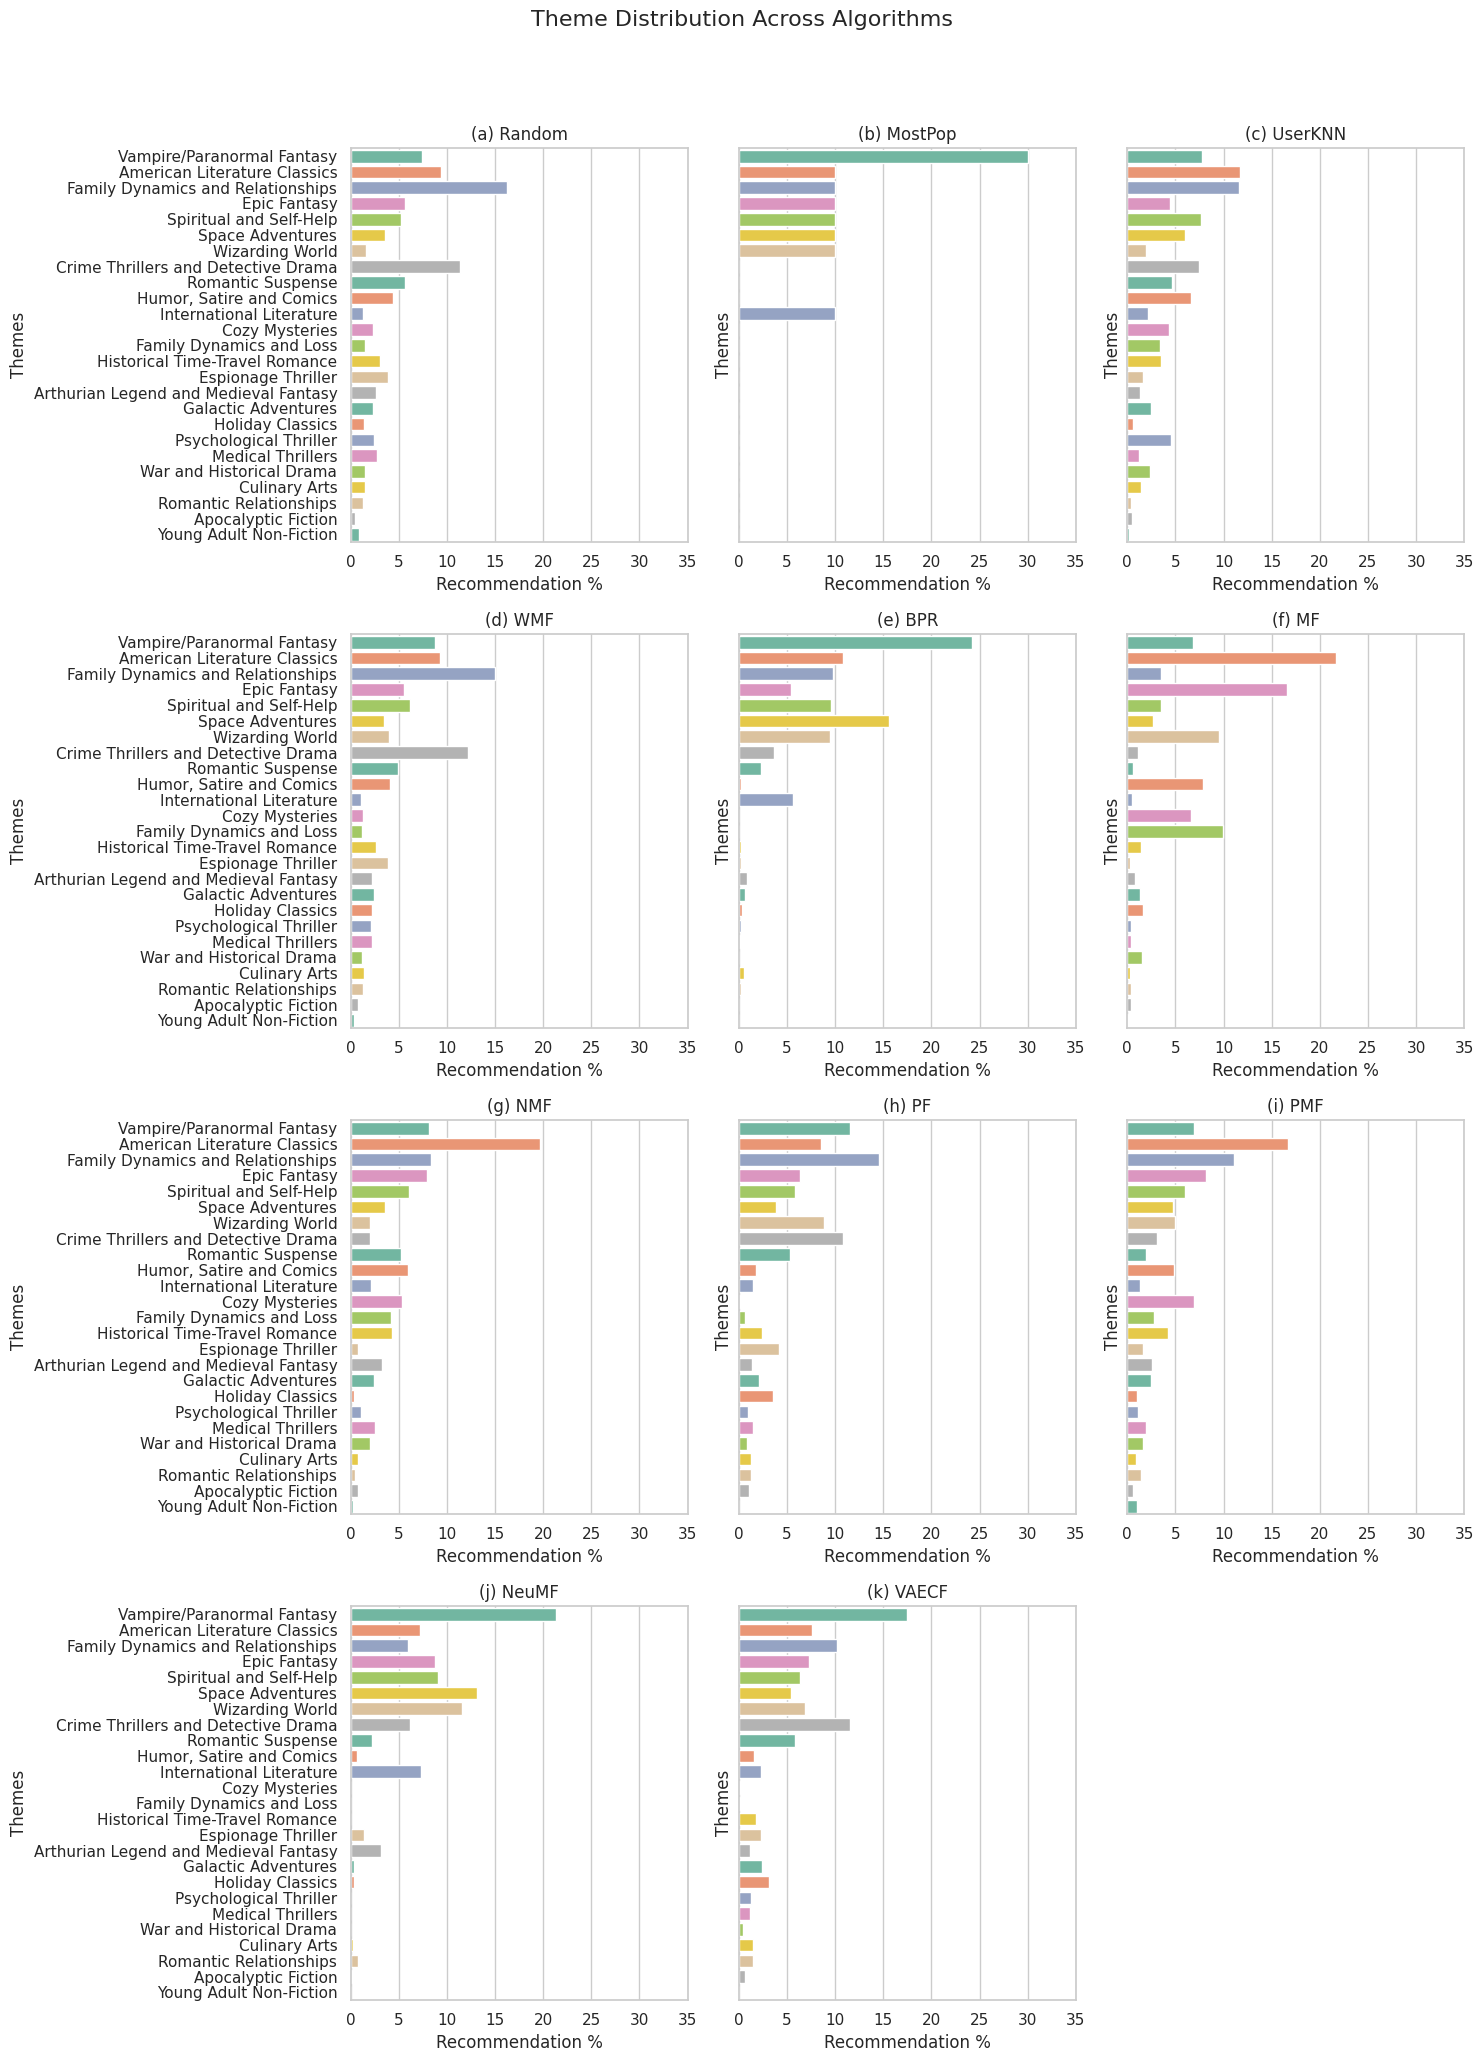

In [64]:

plot_theme_horizontal_subplots(rec_dfs, df )

# User Level Analysis

In [65]:
import numpy as np

# Step 1: Drop duplicates so one user-book pair is counted once
df_unique = df.drop_duplicates(['User-ID', 'ISBN'])

# Step 2: Compute theme distribution per user
user_theme_dist = (
    df_unique.groupby(['User-ID', 'finegrained_Theme'])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum())  # Normalize to probabilities
)

# Step 3: Compute Shannon entropy per user
shannon_entropy = user_theme_dist.groupby(level=0).apply(
    lambda p: -np.sum(p * np.log2(p))
).reset_index(name='shannon_entropy')

# Step 4: Quick look
print(shannon_entropy.describe())


/tmp/ipykernel_3690916/3048713963.py:11: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  .apply(lambda x: x / x.sum())  # Normalize to probabilities


             User-ID  shannon_entropy
count    5424.000000      5424.000000
mean   140102.237279         2.402920
std     79960.118718         0.655265
min       114.000000        -0.000000
25%     70643.750000         1.921928
50%    138660.500000         2.370951
75%    209821.000000         2.863826
max    278843.000000         4.136286


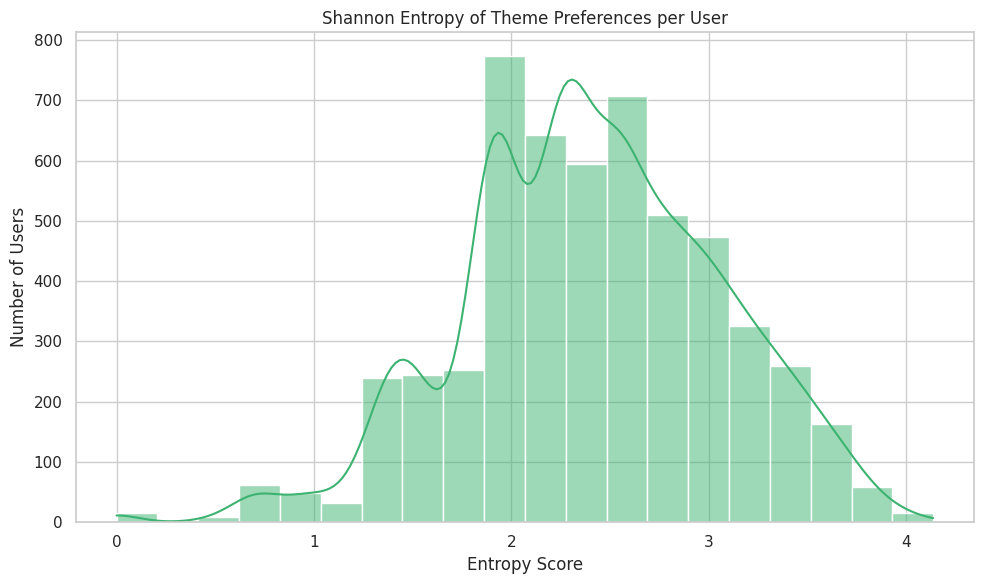

In [35]:
# Histogram of Shannon entropy
plt.figure(figsize=(10, 6))
sns.histplot(shannon_entropy['shannon_entropy'], bins=20, kde=True, color='mediumseagreen')
plt.title('Shannon Entropy of Theme Preferences per User')
plt.xlabel('Entropy Score')
plt.ylabel('Number of Users')
plt.grid(True)
plt.tight_layout()
plt.show()


In [36]:
# Step 1: Count how many unique themes each user read
theme_counts = (
    df_unique.groupby('User-ID')['finegrained_Theme']
    .nunique()
    .reset_index(name='num_themes')
)

# Step 2: Merge with entropy table
shannon_entropy = shannon_entropy.merge(theme_counts, on='User-ID')

# Step 3: Normalize entropy
shannon_entropy['normalized_entropy'] = shannon_entropy.apply(
    lambda row: row['shannon_entropy'] / np.log2(row['num_themes']) 
    if row['num_themes'] > 1 else 0,  # Avoid division by zero
    axis=1
)

# Step 4: Quick summary
print(shannon_entropy[['normalized_entropy']].describe())


       normalized_entropy
count         5424.000000
mean             0.920650
std              0.083005
min              0.000000
25%              0.895165
50%              0.942681
75%              0.968393
max              1.000000


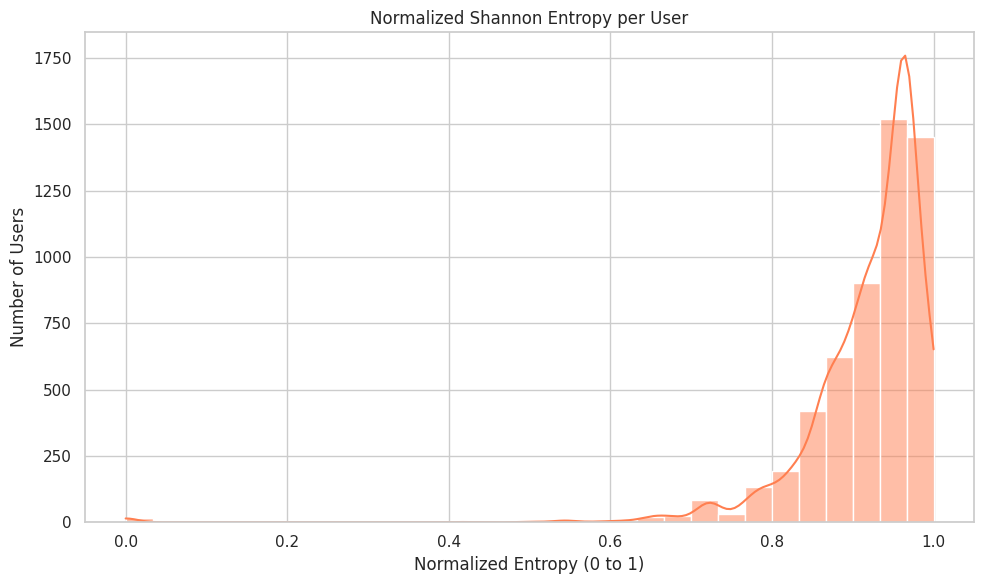

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(shannon_entropy['normalized_entropy'], bins=30, kde=True, color='coral')
plt.title('Normalized Shannon Entropy per User')
plt.xlabel('Normalized Entropy (0 to 1)')
plt.ylabel('Number of Users')
plt.grid(True)
plt.tight_layout()
plt.show()


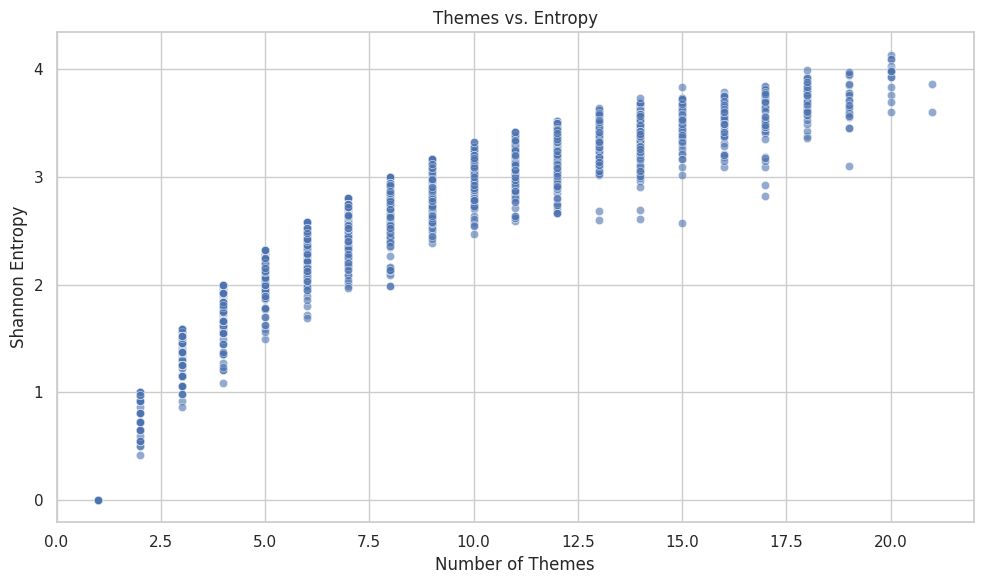

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Load the data (if not already loaded)
df_shannon = shannon_entropy.copy() 

# Convert necessary columns to numeric
df_shannon["num_themes"] = pd.to_numeric(df_shannon["num_themes"], errors="coerce")
df_shannon["shannon_entropy"] = pd.to_numeric(df_shannon["shannon_entropy"], errors="coerce")

# Drop rows with missing values
df_shannon = df_shannon.dropna(subset=["num_themes", "shannon_entropy"])

# Setup plot style
sns.set(style="whitegrid")

# Create subplots
plt.figure(figsize=(10, 6))

# 1. Scatter Plot
sns.scatterplot(data=df_shannon, x="num_themes", y="shannon_entropy", alpha=0.6)
plt.title("Themes vs. Entropy")
plt.xlabel("Number of Themes")
plt.ylabel("Shannon Entropy")



plt.tight_layout()
plt.show()



In [39]:
# Quartile analysis for both metrics
percentiles = [0, 0.25, 0.5, 0.75, 1.0]

print("Shannon Entropy Quartiles:")
entropy_quartiles = shannon_entropy['shannon_entropy'].quantile(percentiles)
for p, val in entropy_quartiles.items():
    print(f"{int(p*100)}%: {val:.2f}")

print("\nNumber of Themes Quartiles:")
theme_quartiles = shannon_entropy['num_themes'].quantile(percentiles)
for p, val in theme_quartiles.items():
    print(f"{int(p*100)}%: {val:.0f}")

print("\nSuggested Thresholds:")
print(f"Specialists: entropy ≤ {entropy_quartiles[0.25]:.1f} AND themes ≤ {theme_quartiles[0.25]:.0f}")
print(f"Explorers: entropy ≥ {entropy_quartiles[0.75]:.1f} OR themes ≥ {theme_quartiles[0.75]:.0f}")


Shannon Entropy Quartiles:
0%: 0.00
25%: 1.92
50%: 2.37
75%: 2.86
100%: 4.14

Number of Themes Quartiles:
0%: 1
25%: 4
50%: 6
75%: 9
100%: 21

Suggested Thresholds:
Specialists: entropy ≤ 1.9 AND themes ≤ 4
Explorers: entropy ≥ 2.9 OR themes ≥ 9


             User-ID  shannon_entropy   num_themes  normalized_entropy
count    5424.000000      5424.000000  5424.000000         5424.000000
mean   140102.237279         2.402920     6.857117            0.920650
std     79960.118718         0.655265     3.569501            0.083005
min       114.000000        -0.000000     1.000000            0.000000
25%     70643.750000         1.921928     4.000000            0.895165
50%    138660.500000         2.370951     6.000000            0.942681
75%    209821.000000         2.863826     9.000000            0.968393
max    278843.000000         4.136286    21.000000            1.000000
Group Distribution:
Moderate    3215
Broad       1181
Niche       1028
Name: diversity_group, dtype: int64
Total users: 5424

Group Characteristics:
                num_themes               shannon_entropy                 
                      mean min max   std            mean  min   max   std
diversity_group                                                 

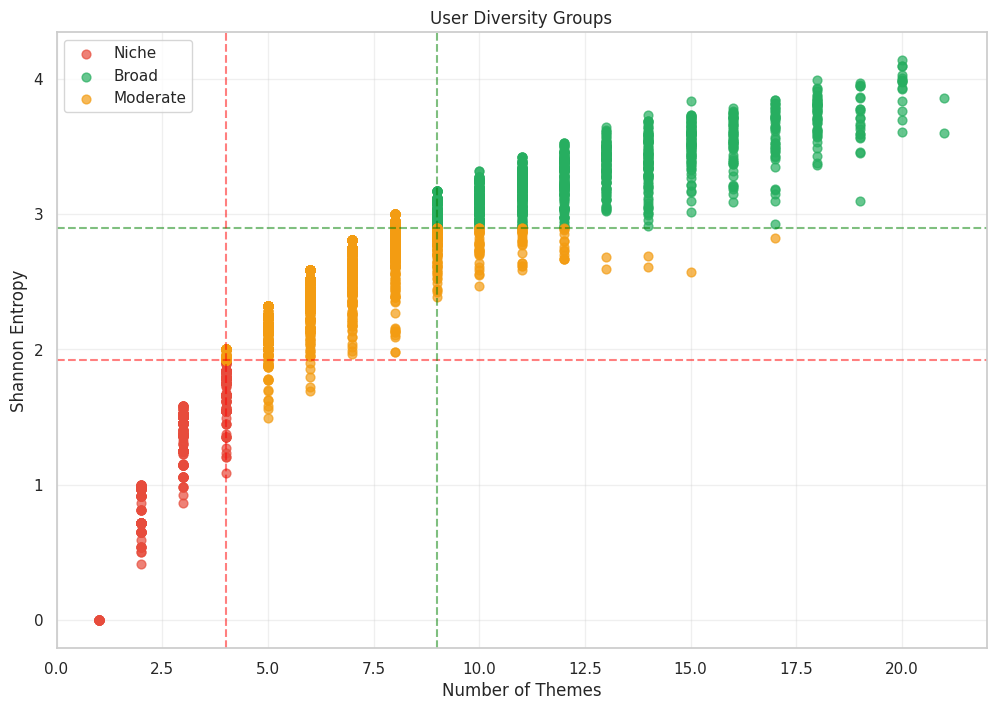

In [40]:
def assign_diversity_group_visual(row):
    num_themes = row['num_themes']
    entropy = row['shannon_entropy']
    
    # Niche: Clear bottom-left cluster
    if num_themes <=4 and entropy <= 1.92:
        return 'Niche'
    
    # Broad: High entropy users (regardless of theme count)
    elif entropy >= 2.9 and num_themes>=9:
        return 'Broad'
    
    # Also include users with many themes even if moderate entropy
    # elif num_themes >= 9:
    #     return 'Broad'
    
    # Everything else is moderate
    else:
        return 'Moderate'

# Apply the grouping
shannon_entropy['diversity_group'] = shannon_entropy.apply(assign_diversity_group_visual, axis=1)


#Shanon entropy description
print(shannon_entropy.describe())
# Validate the grouping
print("Group Distribution:")
print(shannon_entropy['diversity_group'].value_counts())
print(f"Total users: {len(shannon_entropy)}")

print("\nGroup Characteristics:")
stats = shannon_entropy.groupby('diversity_group').agg({
    'num_themes': ['mean', 'min', 'max', 'std'],
    'shannon_entropy': ['mean', 'min', 'max', 'std']
}).round(2)
print(stats)

# Plot with the new groups
import matplotlib.pyplot as plt
colors = {'Niche': '#e74c3c', 'Moderate': '#f39c12', 'Broad': '#27ae60'}

plt.figure(figsize=(12, 8))
for group in shannon_entropy['diversity_group'].unique():
    subset = shannon_entropy[shannon_entropy['diversity_group'] == group]
    plt.scatter(subset['num_themes'], subset['shannon_entropy'], 
               c=colors[group], alpha=0.7, s=40, label=group)

# Add threshold lines for visualization
plt.axhline(y=1.92, color='red', linestyle='--', alpha=0.5)
plt.axhline(y=2.9, color='green', linestyle='--', alpha=0.5)
plt.axvline(x=4, color='red', linestyle='--', alpha=0.5)
plt.axvline(x=9, color='green', linestyle='--', alpha=0.5)

plt.xlabel('Number of Themes')
plt.ylabel('Shannon Entropy')
plt.title('User Diversity Groups')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

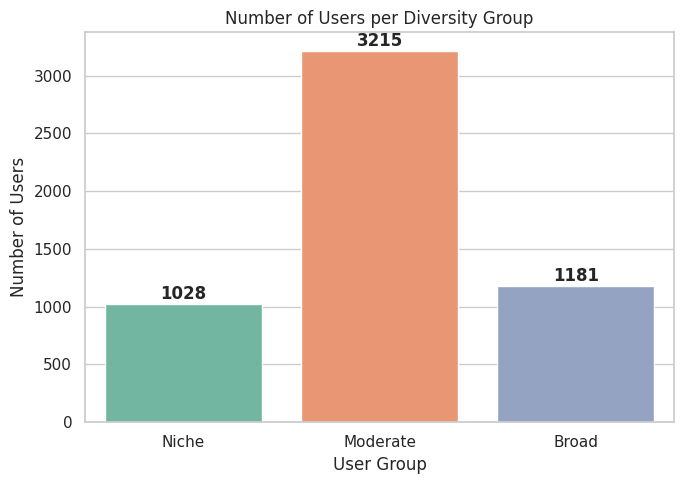

In [41]:
# custom order
order = ['Niche', 'Moderate', 'Broad']

# Count users in each group with fixed order
group_counts = shannon_entropy['diversity_group'].value_counts().reindex(order).reset_index()
group_counts.columns = ['diversity_group', 'count']

# Plot
plt.figure(figsize=(7, 5))
ax = sns.barplot(data=group_counts, x='diversity_group', y='count', palette='Set2', order=order)

# Add counts on top of bars
for i, row in group_counts.iterrows():
    ax.text(i, row['count'] + 5, row['count'], ha='center', va='bottom', fontweight='bold')

plt.title('Number of Users per Diversity Group')
plt.xlabel('User Group')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



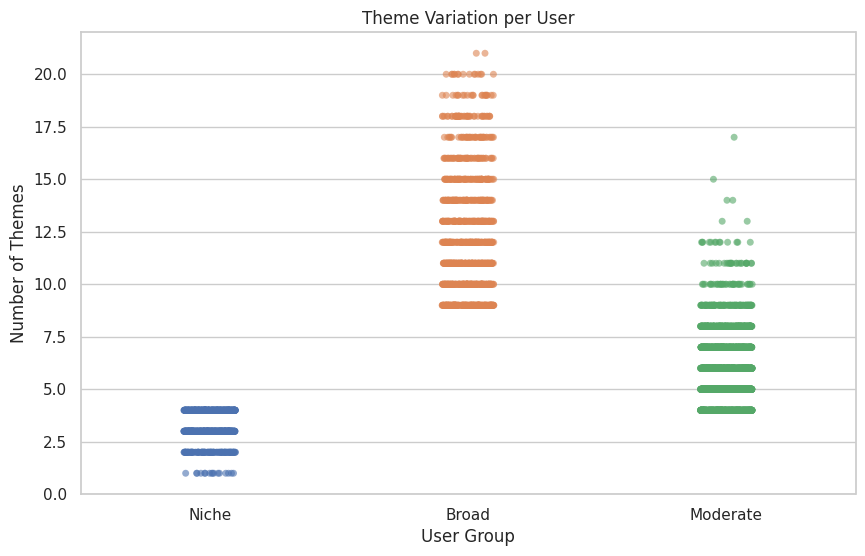

In [42]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=shannon_entropy, x='diversity_group', y='num_themes', jitter=True, alpha=0.6)
plt.title('Theme Variation per User')
plt.xlabel('User Group')
plt.ylabel('Number of Themes')
plt.show()


In [43]:
shannon_entropy

User-ID  shannon_entropy  num_themes  normalized_entropy diversity_group
0         114         1.370951           3            0.864974           Niche
1         243         2.985228           9            0.941735           Broad
2         244         2.251629           5            0.969724        Moderate
3         254         3.297797          13            0.891191           Broad
4         388         2.235926           5            0.962961        Moderate
...       ...              ...         ...                 ...             ...
5419   278535         2.521928           7            0.898329        Moderate
5420   278554         2.000000           4            1.000000        Moderate
5421   278582         2.706891           8            0.902297        Moderate
5422   278633         2.547898          10            0.766994        Moderate
5423   278843         2.481715           6            0.960058        Moderate

[5424 rows x 5 columns]

In [44]:
# Merge diversity groups to main df
df_merged = df.merge(shannon_entropy[['User-ID', 'diversity_group']], on='User-ID', how='left')

# Check the merge
print(f"Original df shape: {df.shape}")
print(f"Merged df shape: {df_merged.shape}")
print(f"\nDiversity group distribution in merged df:")
print(df_merged['diversity_group'].value_counts())


Original df shape: (70622, 22)
Merged df shape: (70622, 23)

Diversity group distribution in merged df:
Broad       33558
Moderate    30609
Niche        6455
Name: diversity_group, dtype: int64


In [45]:
# This preserves information about all books each user read

# Calculate theme percentages within each user group
theme_percentages = df_merged.groupby('diversity_group')['finegrained_Theme'].value_counts(normalize=True) * 100

# Convert to a nice table format
theme_table = theme_percentages.unstack(level=0).fillna(0).round(2)

# Reorder columns
theme_table = theme_table[['Niche', 'Moderate', 'Broad']]

# Sort by niche users' preferences
theme_table = theme_table.sort_values('Niche', ascending=False)

print("Theme Percentages by User Group:")
print("="*50)
print(theme_table.head(15))

#raw counts 
print("\n" + "="*50)
print("Raw Counts:")
theme_counts = df_merged.groupby('diversity_group')['finegrained_Theme'].value_counts()
theme_counts_table = theme_counts.unstack(level=0).fillna(0)
theme_counts_table = theme_counts_table[['Niche', 'Moderate', 'Broad']]
print(theme_counts_table.head(10))

Theme Percentages by User Group:
diversity_group                      Niche  Moderate  Broad
finegrained_Theme                                          
Family Dynamics and Relationships    22.28     16.97  15.46
Crime Thrillers and Detective Drama  15.76     12.23  11.26
Vampire/Paranormal Fantasy            8.89      7.96   7.74
American Literature Classics          8.77      8.85   9.14
Romantic Suspense                     5.64      5.77   5.29
Spiritual and Self-Help               4.74      5.59   5.58
Epic Fantasy                          4.45      5.28   5.62
Espionage Thriller                    3.80      4.16   3.81
Humor, Satire and Comics              3.42      3.99   4.47
Wizarding World                       3.21      2.47   2.80
Space Adventures                      2.84      3.44   3.40
Historical Time-Travel Romance        2.62      2.67   2.75
Medical Thrillers                     1.95      2.61   2.81
Galactic Adventures                   1.69      2.09   2.35
Holiday

In [66]:
# Step 1: Create ISBN to theme mapping from original data
isbn_theme_map = df[['ISBN', 'finegrained_Theme']].drop_duplicates()

# Step 2: Create user to diversity group mapping
user_group_map = df_merged[['User-ID', 'diversity_group']].drop_duplicates()

# Step 3: Analyze each recommendation system
def analyze_recommendations(rec_df, system_name):
    # Merge with themes
    rec_with_themes = rec_df.merge(isbn_theme_map, left_on='item_id', right_on='ISBN', how='left')
    
    # Merge with user groups
    rec_with_groups = rec_with_themes.merge(user_group_map, left_on='user_id', right_on='User-ID', how='left')
    
    # Calculate theme percentages by user group
    theme_percentages = rec_with_groups.groupby('diversity_group')['finegrained_Theme'].value_counts(normalize=True) * 100
    theme_table = theme_percentages.unstack(level=0).fillna(0).round(2)
    
    # Reorder columns if they exist
    available_cols = [col for col in ['Niche', 'Moderate', 'Broad'] if col in theme_table.columns]
    if available_cols:
        theme_table = theme_table[available_cols]
    
    # Sort by niche users' recommendations
    if 'Niche' in theme_table.columns:
        theme_table = theme_table.sort_values('Niche', ascending=False)
    
    print(f"\n{'='*60}")
    print(f"RECOMMENDATIONS - {system_name}")
    print(f"{'='*60}")
    print(theme_table.head(15))
    
    return theme_table

# Analyze all recommendation systems
rec_theme_tables = {}

# Example for one system first (replace 'MostPop' with any system name)
system_name = 'MostPop'  # Change this to test different systems
rec_df = rec_dfs[system_name]
rec_theme_tables[system_name] = analyze_recommendations(rec_dfs, system_name)

# To analyze all systems, uncomment below:
# for system_name, rec_df in rec_dfs.items():
#     rec_theme_tables[system_name] = analyze_recommendations(rec_df, system_name)

print(f"\n{'='*60}")
print("COMPARISON: USER PREFERENCES vs RECOMMENDATIONS")
print(f"{'='*60}")
print("Original User Preferences (Top 10 themes):")
print(theme_table.head(10))



AttributeError: 'dict' object has no attribute 'merge'

In [67]:
# Step 1: Create ISBN to theme mapping from original data
isbn_theme_map = df[['ISBN', 'finegrained_Theme']].drop_duplicates()

# Step 2: Create user to diversity group mapping  
user_group_map = df_merged[['User-ID', 'diversity_group']].drop_duplicates()

# Step 3: Analyze each recommendation system
def analyze_recommendations(rec_df, system_name):
    print(f"\nAnalyzing {system_name}...")
    print("rec_df shape:", rec_df.shape)
    print("rec_df columns:", rec_df.columns.tolist())
    
    # Merge with themes
    rec_with_themes = rec_df.merge(isbn_theme_map, left_on='item_id', right_on='ISBN', how='left')
    
    # Merge with user groups
    rec_with_groups = rec_with_themes.merge(user_group_map, left_on='user_id', right_on='User-ID', how='left')
    
    # Calculate theme percentages by user group
    theme_percentages = rec_with_groups.groupby('diversity_group')['finegrained_Theme'].value_counts(normalize=True) * 100
    theme_table = theme_percentages.unstack(level=0).fillna(0).round(2)
    
    # Reorder columns if they exist
    available_cols = [col for col in ['Niche', 'Moderate', 'Broad'] if col in theme_table.columns]
    if available_cols:
        theme_table = theme_table[available_cols]
    
    # Sort by niche users' recommendations
    if 'Niche' in theme_table.columns:
        theme_table = theme_table.sort_values('Niche', ascending=False)
    
    print(f"\n{'='*60}")
    print(f"RECOMMENDATIONS - {system_name}")
    print(f"{'='*60}")
    print(theme_table.head(15))
    
    return theme_table

# Analyze all recommendation systems
rec_theme_tables = {}

# Example for one system first (replace 'MostPop' with any system name)
system_name = 'MostPop'  # Change this to test different systems
rec_df = rec_dfs[system_name]
rec_theme_tables[system_name] = analyze_recommendations(rec_df, system_name)

# To analyze all systems, uncomment below:
for system_name, rec_df in rec_dfs.items():
    rec_theme_tables[system_name] = analyze_recommendations(rec_df, system_name)

print(f"\n{'='*60}")
print("COMPARISON: USER PREFERENCES vs RECOMMENDATIONS")
print(f"{'='*60}")
print("Original User Preferences (Top 10 themes):")
print(theme_table)


Analyzing MostPop...
rec_df shape: (54170, 3)
rec_df columns: ['user_id', 'item_id', 'score']

RECOMMENDATIONS - MostPop
diversity_group                    Niche  Moderate  Broad
finegrained_Theme                                        
Vampire/Paranormal Fantasy          30.0      30.0   30.0
American Literature Classics        10.0      10.0   10.0
Epic Fantasy                        10.0      10.0   10.0
Family Dynamics and Relationships   10.0      10.0   10.0
International Literature            10.0      10.0   10.0
Space Adventures                    10.0      10.0   10.0
Spiritual and Self-Help             10.0      10.0   10.0
Wizarding World                     10.0      10.0   10.0

Analyzing Random...
rec_df shape: (54170, 3)
rec_df columns: ['user_id', 'item_id', 'score']

RECOMMENDATIONS - Random
diversity_group                        Niche  Moderate  Broad
finegrained_Theme                                            
Family Dynamics and Relationships      16.34     16.41

In [68]:
import numpy as np
import pandas as pd

def calculate_gini_coefficient(theme_counts):
    """
    Calculate Gini coefficient for theme distribution
    theme_counts: pandas Series with theme frequencies
    """
    if len(theme_counts) <= 1:
        return 0
    
    # Sort values in ascending order
    sorted_values = np.sort(theme_counts.values)
    n = len(sorted_values)
    
    # Calculate Gini coefficient
    index = np.arange(1, n + 1)  # 1, 2, ..., n
    gini = (2 * np.sum(index * sorted_values)) / (n * np.sum(sorted_values)) - (n + 1) / n
    
    return gini

# Step 1: Calculate Gini coefficient for each user
user_gini_scores = []

for user_id in df_merged['User-ID'].unique():
    user_themes = df_merged[df_merged['User-ID'] == user_id]['finegrained_Theme']
    theme_counts = user_themes.value_counts()
    
    if len(theme_counts) > 0:  # Only users with at least one book
        gini_score = calculate_gini_coefficient(theme_counts)
        user_gini_scores.append({
            'User-ID': user_id,
            'gini_coefficient': gini_score,
            'num_themes': len(theme_counts),
            'total_books': len(user_themes),
            'top_theme_pct': theme_counts.iloc[0] / len(user_themes) * 100
        })

# Create DataFrame
gini_df = pd.DataFrame(user_gini_scores)


In [69]:
gini_df.describe()

User-ID  gini_coefficient   num_themes  total_books  \
count    5424.000000       5424.000000  5424.000000  5424.000000   
mean   140102.237279          0.228364     6.857117    13.020280   
std     79960.118718          0.124400     3.569501    12.280691   
min       114.000000          0.000000     1.000000     2.000000   
25%     70643.750000          0.150000     4.000000     6.000000   
50%    138660.500000          0.228571     6.000000     8.000000   
75%    209821.000000          0.311688     9.000000    15.000000   
max    278843.000000          0.646367    21.000000   140.000000   

       top_theme_pct  
count    5424.000000  
mean       33.953403  
std        14.170982  
min        10.000000  
25%        23.076923  
50%        33.333333  
75%        40.000000  
max       100.000000

In [70]:

print("Gini Threshold Justification:")
print(f"75th percentile: {gini_df['gini_coefficient'].quantile(0.75):.3f}")
print(f"25th percentile: {gini_df['gini_coefficient'].quantile(0.25):.3f}")
print(f"Mean: {gini_df['gini_coefficient'].mean():.3f}")

# We chose:
# 0.31 ≈ 75th percentile (top quarter are "concentrated")  
# 0.15 ≈ 25th percentile (bottom quarter are "evenly distributed")

# Concise classification using both Gini and theme count
def classify_user_type(row):
    themes = row['num_themes']
    gini = row['gini_coefficient']
    
    # Specialists: Few themes OR high concentration
    if themes <= 4 or gini > 0.31:
        return 'Specialists'
    
    # Generalists: Many themes AND low concentration
    elif themes >= 9 or gini <= 0.15:
        return 'Generalists'
    
    # Moderate: Everything else
    else:
        return 'Moderate'

# Apply classification
gini_df['user_type'] = gini_df.apply(classify_user_type, axis=1)

# Results
print("User Type Distribution:")
print(gini_df['user_type'].value_counts())



Gini Threshold Justification:
75th percentile: 0.312
25th percentile: 0.150
Mean: 0.228
User Type Distribution:
Specialists    2719
Generalists    1572
Moderate       1133
Name: user_type, dtype: int64


User Type Distribution:
Moderate      4886
Generalist     323
Specialist     215
Name: user_type, dtype: int64

Group Characteristics:
            num_themes  gini_coefficient
user_type                               
Generalist       10.23              0.18
Moderate          6.78              0.23
Specialist        3.43              0.36


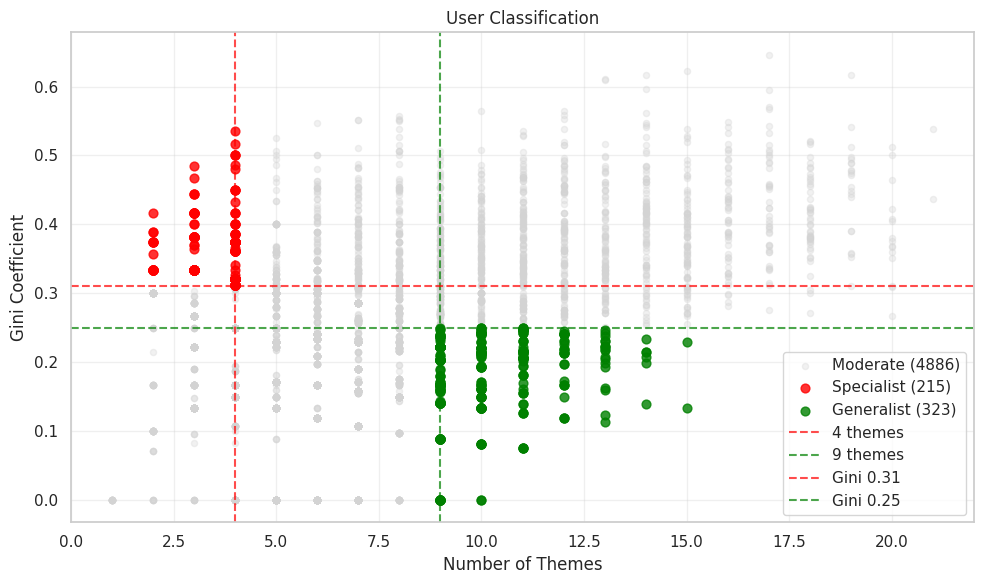

In [71]:
import matplotlib.pyplot as plt

# Apply your classification
def classify_simple(row):
    themes, gini = row['num_themes'], row['gini_coefficient']
    
    if themes <=4 and gini >= 0.31:  # Few themes + concentrated
        return 'Specialist'
    elif themes >= 9 and gini <= 0.25:  # Many themes + even
        return 'Generalist'
    else:
        return 'Moderate'

gini_df['user_type'] = gini_df.apply(classify_simple, axis=1)

# Results
print("User Type Distribution:")
print(gini_df['user_type'].value_counts())
print("\nGroup Characteristics:")
print(gini_df.groupby('user_type')[['num_themes', 'gini_coefficient']].mean().round(2))

# Simple plot
plt.figure(figsize=(10, 6))

colors = {'Specialist': 'red', 'Moderate': 'lightgray', 'Generalist': 'green'}
for group in ['Moderate', 'Specialist', 'Generalist']:  # Plot moderate first (background)
    if group in gini_df['user_type'].values:
        subset = gini_df[gini_df['user_type'] == group]
        alpha = 0.3 if group == 'Moderate' else 0.8
        size = 20 if group == 'Moderate' else 40
        plt.scatter(subset['num_themes'], subset['gini_coefficient'], 
                   c=colors[group], alpha=alpha, s=size, label=f"{group} ({len(subset)})")

# Add threshold lines
plt.axvline(x=4, color='red', linestyle='--', alpha=0.7, label='4 themes')
plt.axvline(x=9, color='green', linestyle='--', alpha=0.7, label='9 themes')
plt.axhline(y=0.31, color='red', linestyle='--', alpha=0.7, label='Gini 0.31')
plt.axhline(y=0.25, color='green', linestyle='--', alpha=0.7, label='Gini 0.25')

plt.xlabel('Number of Themes')
plt.ylabel('Gini Coefficient')
plt.title('User Classification')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [73]:
import numpy as np
import pandas as pd

# Get specialists and their historical stats
specialists = gini_df[gini_df['user_type'] == 'Specialist']['User-ID'].tolist()
specialist_hist = gini_df[gini_df['user_type'] == 'Specialist'].set_index('User-ID')

# Historical theme distribution for specialists
hist_themes = df_merged[df_merged['User-ID'].isin(specialists)]['finegrained_Theme'].value_counts(normalize=True) * 100

def analyze_algorithm(system_name, rec_df):
    # Get recommendations with themes
    spec_recs = rec_df[rec_df['user_id'].isin(specialists)]
    spec_recs_themes = spec_recs.merge(isbn_theme_map, left_on='item_id', right_on='ISBN', how='left').dropna(subset=['finegrained_Theme'])
    
    if len(spec_recs_themes) == 0:
        return None
    
    # Basic stats
    rec_theme_counts = spec_recs_themes.groupby('user_id')['finegrained_Theme'].nunique()
    avg_rec_themes = rec_theme_counts.mean()
    
    # Gini calculation
    ginis = []
    for user_id in specialists:
        user_themes = spec_recs_themes[spec_recs_themes['user_id'] == user_id]['finegrained_Theme']
        if len(user_themes) > 1:
            theme_dist = user_themes.value_counts().values
            sorted_vals = np.sort(theme_dist)
            n = len(sorted_vals)
            gini = (2 * sum((i+1) * val for i, val in enumerate(sorted_vals))) / (n * sum(sorted_vals)) - (n + 1) / n
            ginis.append(gini)
    
    avg_rec_gini = np.mean(ginis) if ginis else 0
    
    # Theme distribution
    rec_themes = spec_recs_themes['finegrained_Theme'].value_counts(normalize=True) * 100
    
    # Top theme comparison
    top_hist_theme = hist_themes.index[0]
    top_rec_theme = rec_themes.index[0]
    
    return {
        'avg_historical_themes': specialist_hist['num_themes'].mean(),
        'avg_rec_themes': avg_rec_themes,
        'theme_diff': avg_rec_themes - specialist_hist['num_themes'].mean(),
        'avg_historical_gini': specialist_hist['gini_coefficient'].mean(),
        'avg_rec_gini': avg_rec_gini,
        'gini_diff': avg_rec_gini - specialist_hist['gini_coefficient'].mean(),
        'top_hist_theme': top_hist_theme,
        'top_hist_pct': hist_themes.iloc[0],
        'top_rec_theme': top_rec_theme,
        'top_rec_pct': rec_themes.iloc[0],
        'theme_shift': top_hist_theme != top_rec_theme
    }

# Analyze all algorithms
results = {}
for system_name, rec_df in rec_dfs.items():
    result = analyze_algorithm(system_name, rec_df)
    if result:
        results[system_name] = result

# Display results
print("COMPREHENSIVE NICHE USER ANALYSIS - ALL ALGORITHMS")
print("=" * 80)
print(f"{'Algorithm':<12} {'Themes':<8} {'ΔThemes':<8} {'Gini':<7} {'ΔGini':<8} {'Top Theme Shift'}")
print("-" * 80)

for system, data in results.items():
    themes = f"{data['avg_rec_themes']:.1f}"
    theme_diff = f"{data['theme_diff']:+.1f}"
    gini = f"{data['avg_rec_gini']:.3f}"
    gini_diff = f"{data['gini_diff']:+.3f}"
    shift = "YES" if data['theme_shift'] else "NO"
    
    print(f"{system:<12} {themes:<8} {theme_diff:<8} {gini:<7} {gini_diff:<8} {shift}")

print(f"\nHistorical Baseline: {specialist_hist['num_themes'].mean():.1f} themes, {specialist_hist['gini_coefficient'].mean():.3f} Gini")
print(f"Top Historical Theme: {hist_themes.index[0]} ({hist_themes.iloc[0]:.1f}%)")

# Show which algorithms cause biggest shifts
print(f"\n🔄 THEME PREFERENCE ANALYSIS:")
print(f"\n📚 TOP 10 HISTORICAL THEMES (Niche Users):")
for i, (theme, pct) in enumerate(hist_themes.head(10).items(), 1):
    print(f"{i:2}. {theme[:40]:<40} {pct:5.1f}%")

print("\n🎯 TOP 10 RECOMMENDED THEMES BY ALGORITHM:")
for system, data in results.items():
    print(f"\n{system}:")
    # Get recommendations for this system
    spec_recs = rec_dfs[system][rec_dfs[system]['user_id'].isin(specialists)]
    spec_recs_themes = spec_recs.merge(isbn_theme_map, left_on='item_id', right_on='ISBN', how='left').dropna(subset=['finegrained_Theme'])
    rec_themes = spec_recs_themes['finegrained_Theme'].value_counts(normalize=True) * 100
    
    for i, (theme, pct) in enumerate(rec_themes.head(10).items(), 1):
        print(f"  {i:2}. {theme[:35]:<35} {pct:5.1f}%")

print(f"\n ALGORITHM THEME SHIFTS (Top Theme Only):")
for system, data in results.items():
    top_hist_theme = data['top_hist_theme'][:25]
    top_rec_theme = data['top_rec_theme'][:25]
    hist_pct = data['top_hist_pct']
    rec_pct = data['top_rec_pct']
   
    
    print(f"{system:<10}: {top_hist_theme} ({hist_pct:.1f}%) → {top_rec_theme} ({rec_pct:.1f}%)")

COMPREHENSIVE NICHE USER ANALYSIS - ALL ALGORITHMS
Algorithm    Themes   ΔThemes  Gini    ΔGini    Top Theme Shift
--------------------------------------------------------------------------------
Random       7.4      +3.9     0.181   -0.180   NO
MostPop      8.0      +4.6     0.175   -0.186   YES
UserKNN      7.5      +4.1     0.173   -0.188   NO
WMF          4.7      +1.3     0.325   -0.036   NO
BPR          7.3      +3.9     0.188   -0.173   YES
MF           6.9      +3.5     0.214   -0.147   YES
NMF          7.6      +4.1     0.174   -0.186   YES
PF           6.0      +2.5     0.280   -0.081   NO
PMF          7.1      +3.7     0.198   -0.163   YES
NeuMF        7.0      +3.5     0.214   -0.147   YES
VAECF        5.4      +1.9     0.279   -0.082   YES

Historical Baseline: 3.4 themes, 0.361 Gini
Top Historical Theme: Family Dynamics and Relationships (26.6%)

🔄 THEME PREFERENCE ANALYSIS:

📚 TOP 10 HISTORICAL THEMES (Niche Users):
 1. Family Dynamics and Relationships         26.6%
 2

In [74]:
# Simple theme count comparison
print("\nTHEME COUNT ANALYSIS")
print("-" * 40)
print(f"{'Algorithm':<12} {'Rec Themes':<11} {'Hist Themes':<12} {'Diff'}")
print("-" * 40)

hist_avg = specialist_hist['num_themes'].mean()

for system_name, rec_df in rec_dfs.items():
    # Get recommendations with themes
    spec_recs = rec_df[rec_df['user_id'].isin(specialists)]
    spec_recs_themes = spec_recs.merge(isbn_theme_map, left_on='item_id', right_on='ISBN', how='left').dropna(subset=['finegrained_Theme'])
    
    if len(spec_recs_themes) > 0:
        # Calculate average themes per user
        rec_theme_counts = spec_recs_themes.groupby('user_id')['finegrained_Theme'].nunique()
        avg_rec = rec_theme_counts.mean()
        diff = avg_rec - hist_avg
        
        print(f"{system_name:<12} {avg_rec:<11.1f} {hist_avg:<12.1f} {diff:+.1f}")

# Calculate overall average across algorithms
all_rec_averages = []
for system_name, rec_df in rec_dfs.items():
    spec_recs = rec_df[rec_df['user_id'].isin(specialists)]
    spec_recs_themes = spec_recs.merge(isbn_theme_map, left_on='item_id', right_on='ISBN', how='left').dropna(subset=['finegrained_Theme'])
    
    if len(spec_recs_themes) > 0:
        rec_theme_counts = spec_recs_themes.groupby('user_id')['finegrained_Theme'].nunique()
        all_rec_averages.append(rec_theme_counts.mean())

overall_rec_avg = np.mean(all_rec_averages) if all_rec_averages else 0

print("-" * 40)
print(f"{'OVERALL AVG':<12} {overall_rec_avg:<11.1f} {hist_avg:<12.1f} {overall_rec_avg - hist_avg:+.1f}")
print(f"\nHistorical baseline: {hist_avg:.1f} themes per user")
print(f"Recommendation average: {overall_rec_avg:.1f} themes per user")


THEME COUNT ANALYSIS
----------------------------------------
Algorithm    Rec Themes  Hist Themes  Diff
----------------------------------------
Random       7.4         3.4          +3.9
MostPop      8.0         3.4          +4.6
UserKNN      7.5         3.4          +4.1
WMF          4.7         3.4          +1.3
BPR          7.3         3.4          +3.9
MF           6.9         3.4          +3.5
NMF          7.6         3.4          +4.1
PF           6.0         3.4          +2.5
PMF          7.1         3.4          +3.7
NeuMF        7.0         3.4          +3.5
VAECF        5.4         3.4          +1.9
----------------------------------------
OVERALL AVG  6.8         3.4          +3.4

Historical baseline: 3.4 themes per user
Recommendation average: 6.8 themes per user


In [75]:
import numpy as np

def calculate_gini(theme_counts):
    """Calculate Gini coefficient for theme distribution"""
    if len(theme_counts) <= 1:
        return 0
    
    sorted_vals = np.sort(theme_counts)
    n = len(sorted_vals)
    return (2 * sum((i+1) * val for i, val in enumerate(sorted_vals))) / (n * sum(sorted_vals)) - (n + 1) / n

def get_avg_gini_for_algorithm(system_name, rec_df, specialists, isbn_theme_map):
    """Get average Gini for one algorithm"""
    # Get recommendations with themes
    spec_recs = rec_df[rec_df['user_id'].isin(specialists)]
    spec_recs_themes = spec_recs.merge(isbn_theme_map, left_on='item_id', right_on='ISBN', how='left').dropna(subset=['finegrained_Theme'])
    
    if len(spec_recs_themes) == 0:
        return 0
    
    # Calculate Gini for each user
    ginis = []
    for user_id in specialists:
        user_themes = spec_recs_themes[spec_recs_themes['user_id'] == user_id]['finegrained_Theme']
        if len(user_themes) > 1:
            theme_counts = user_themes.value_counts().values
            gini = calculate_gini(theme_counts)
            ginis.append(gini)
    
    return np.mean(ginis) if ginis else 0

# Option 1: Average Gini per algorithm
print("Average Gini per Algorithm:")
print("-" * 30)
for system_name, rec_df in rec_dfs.items():
    avg_gini = get_avg_gini_for_algorithm(system_name, rec_df, specialists, isbn_theme_map)
    print(f"{system_name:<12}: {avg_gini:.3f}")

# Option 2: Overall average across ALL algorithms
print(f"\nHistorical Average: {specialist_hist['gini_coefficient'].mean():.3f}")

# Option 3: Average of all algorithm averages
all_ginis = []
for system_name, rec_df in rec_dfs.items():
    avg_gini = get_avg_gini_for_algorithm(system_name, rec_df, specialists, isbn_theme_map)
    all_ginis.append(avg_gini)

overall_avg = np.mean(all_ginis)
print(f"Overall Average (across algorithms): {overall_avg:.3f}")
print(f"Shift from Historical: {overall_avg - specialist_hist['gini_coefficient'].mean():+.3f}")

Average Gini per Algorithm:
------------------------------
Random      : 0.181
MostPop     : 0.175
UserKNN     : 0.173
WMF         : 0.325
BPR         : 0.188
MF          : 0.214
NMF         : 0.174
PF          : 0.280
PMF         : 0.198
NeuMF       : 0.214
VAECF       : 0.279

Historical Average: 0.361
Overall Average (across algorithms): 0.218
Shift from Historical: -0.143


In [72]:
import numpy as np
import pandas as pd

# Get specialists and their historical stats
specialists = gini_df[gini_df['user_type'] == 'Generalist']['User-ID'].tolist()
specialist_hist = gini_df[gini_df['user_type'] == 'Generalist'].set_index('User-ID')

# Historical theme distribution for specialists
hist_themes = df_merged[df_merged['User-ID'].isin(specialists)]['finegrained_Theme'].value_counts(normalize=True) * 100

def analyze_algorithm(system_name, rec_df):
    # Get recommendations with themes
    spec_recs = rec_df[rec_df['user_id'].isin(specialists)]
    spec_recs_themes = spec_recs.merge(isbn_theme_map, left_on='item_id', right_on='ISBN', how='left').dropna(subset=['finegrained_Theme'])
    
    if len(spec_recs_themes) == 0:
        return None
    
    # Basic stats
    rec_theme_counts = spec_recs_themes.groupby('user_id')['finegrained_Theme'].nunique()
    avg_rec_themes = rec_theme_counts.mean()
    
    # Gini calculation
    ginis = []
    for user_id in specialists:
        user_themes = spec_recs_themes[spec_recs_themes['user_id'] == user_id]['finegrained_Theme']
        if len(user_themes) > 1:
            theme_dist = user_themes.value_counts().values
            sorted_vals = np.sort(theme_dist)
            n = len(sorted_vals)
            gini = (2 * sum((i+1) * val for i, val in enumerate(sorted_vals))) / (n * sum(sorted_vals)) - (n + 1) / n
            ginis.append(gini)
    
    avg_rec_gini = np.mean(ginis) if ginis else 0
    
    # Theme distribution
    rec_themes = spec_recs_themes['finegrained_Theme'].value_counts(normalize=True) * 100
    
    # Top theme comparison
    top_hist_theme = hist_themes.index[0]
    top_rec_theme = rec_themes.index[0]
    
    return {
        'avg_historical_themes': specialist_hist['num_themes'].mean(),
        'avg_rec_themes': avg_rec_themes,
        'theme_diff': avg_rec_themes - specialist_hist['num_themes'].mean(),
        'avg_historical_gini': specialist_hist['gini_coefficient'].mean(),
        'avg_rec_gini': avg_rec_gini,
        'gini_diff': avg_rec_gini - specialist_hist['gini_coefficient'].mean(),
        'top_hist_theme': top_hist_theme,
        'top_hist_pct': hist_themes.iloc[0],
        'top_rec_theme': top_rec_theme,
        'top_rec_pct': rec_themes.iloc[0],
        'theme_shift': top_hist_theme != top_rec_theme
    }

# Analyze all algorithms
results = {}
for system_name, rec_df in rec_dfs.items():
    result = analyze_algorithm(system_name, rec_df)
    if result:
        results[system_name] = result

# Display results
print("COMPREHENSIVE Generalist  USER ANALYSIS - ALL ALGORITHMS")
print("=" * 80)
print(f"{'Algorithm':<12} {'Themes':<8} {'ΔThemes':<8} {'Gini':<7} {'ΔGini':<8} {'Top Theme Shift'}")
print("-" * 80)

for system, data in results.items():
    themes = f"{data['avg_rec_themes']:.1f}"
    theme_diff = f"{data['theme_diff']:+.1f}"
    gini = f"{data['avg_rec_gini']:.3f}"
    gini_diff = f"{data['gini_diff']:+.3f}"
    shift = "YES" if data['theme_shift'] else "NO"
    
    print(f"{system:<12} {themes:<8} {theme_diff:<8} {gini:<7} {gini_diff:<8} {shift}")

print(f"\nHistorical Baseline: {specialist_hist['num_themes'].mean():.1f} themes, {specialist_hist['gini_coefficient'].mean():.3f} Gini")
print(f"Top Historical Theme: {hist_themes.index[0]} ({hist_themes.iloc[0]:.1f}%)")

# Show which algorithms cause biggest shifts
print(f"\n🔄 THEME PREFERENCE ANALYSIS:")
print(f"\n📚 TOP 10 HISTORICAL THEMES (Generalist Users):")
for i, (theme, pct) in enumerate(hist_themes.head(10).items(), 1):
    print(f"{i:2}. {theme[:40]:<40} {pct:5.1f}%")

print("\n🎯 TOP 10 RECOMMENDED THEMES BY ALGORITHM:")
for system, data in results.items():
    print(f"\n{system}:")
    # Get recommendations for this system
    spec_recs = rec_dfs[system][rec_dfs[system]['user_id'].isin(specialists)]
    spec_recs_themes = spec_recs.merge(isbn_theme_map, left_on='item_id', right_on='ISBN', how='left').dropna(subset=['finegrained_Theme'])
    rec_themes = spec_recs_themes['finegrained_Theme'].value_counts(normalize=True) * 100
    
    for i, (theme, pct) in enumerate(rec_themes.head(10).items(), 1):
        print(f"  {i:2}. {theme[:35]:<35} {pct:5.1f}%")

print(f"\n ALGORITHM THEME SHIFTS (Top Theme Only):")
for system, data in results.items():
    top_hist_theme = data['top_hist_theme'][:25]
    top_rec_theme = data['top_rec_theme'][:25]
    hist_pct = data['top_hist_pct']
    rec_pct = data['top_rec_pct']
   
    
    print(f"{system:<10}: {top_hist_theme} ({hist_pct:.1f}%) → {top_rec_theme} ({rec_pct:.1f}%)")

COMPREHENSIVE Generalist  USER ANALYSIS - ALL ALGORITHMS
Algorithm    Themes   ΔThemes  Gini    ΔGini    Top Theme Shift
--------------------------------------------------------------------------------
Random       7.5      -2.7     0.174   -0.009   NO
MostPop      8.0      -2.2     0.175   -0.008   YES
UserKNN      7.5      -2.8     0.176   -0.006   YES
WMF          7.3      -2.9     0.184   +0.001   NO
BPR          7.1      -3.1     0.191   +0.008   YES
MF           7.3      -2.9     0.184   +0.001   YES
NMF          7.6      -2.7     0.169   -0.014   YES
PF           6.5      -3.7     0.243   +0.060   NO
PMF          7.2      -3.0     0.192   +0.009   YES
NeuMF        7.0      -3.3     0.212   +0.030   YES
VAECF        6.3      -3.9     0.238   +0.055   YES

Historical Baseline: 10.2 themes, 0.183 Gini
Top Historical Theme: Family Dynamics and Relationships (11.0%)

🔄 THEME PREFERENCE ANALYSIS:

📚 TOP 10 HISTORICAL THEMES (Generalist Users):
 1. Family Dynamics and Relationships    

In [73]:
# Simple theme count comparison
print("\nTHEME COUNT ANALYSIS")
print("-" * 40)
print(f"{'Algorithm':<12} {'Rec Themes':<11} {'Hist Themes':<12} {'Diff'}")
print("-" * 40)

hist_avg = specialist_hist['num_themes'].mean()

for system_name, rec_df in rec_dfs.items():
    # Get recommendations with themes
    spec_recs = rec_df[rec_df['user_id'].isin(specialists)]
    spec_recs_themes = spec_recs.merge(isbn_theme_map, left_on='item_id', right_on='ISBN', how='left').dropna(subset=['finegrained_Theme'])
    
    if len(spec_recs_themes) > 0:
        # Calculate average themes per user
        rec_theme_counts = spec_recs_themes.groupby('user_id')['finegrained_Theme'].nunique()
        avg_rec = rec_theme_counts.mean()
        diff = avg_rec - hist_avg
        
        print(f"{system_name:<12} {avg_rec:<11.1f} {hist_avg:<12.1f} {diff:+.1f}")

# Calculate overall average across algorithms
all_rec_averages = []
for system_name, rec_df in rec_dfs.items():
    spec_recs = rec_df[rec_df['user_id'].isin(specialists)]
    spec_recs_themes = spec_recs.merge(isbn_theme_map, left_on='item_id', right_on='ISBN', how='left').dropna(subset=['finegrained_Theme'])
    
    if len(spec_recs_themes) > 0:
        rec_theme_counts = spec_recs_themes.groupby('user_id')['finegrained_Theme'].nunique()
        all_rec_averages.append(rec_theme_counts.mean())

overall_rec_avg = np.mean(all_rec_averages) if all_rec_averages else 0

print("-" * 40)
print(f"{'OVERALL AVG':<12} {overall_rec_avg:<11.1f} {hist_avg:<12.1f} {overall_rec_avg - hist_avg:+.1f}")
print(f"\nHistorical baseline: {hist_avg:.1f} themes per user")
print(f"Recommendation average: {overall_rec_avg:.1f} themes per user")


THEME COUNT ANALYSIS
----------------------------------------
Algorithm    Rec Themes  Hist Themes  Diff
----------------------------------------
Random       7.5         10.2         -2.7
MostPop      8.0         10.2         -2.2
UserKNN      7.5         10.2         -2.8
WMF          7.3         10.2         -2.9
BPR          7.1         10.2         -3.1
MF           7.3         10.2         -2.9
NMF          7.6         10.2         -2.7
PF           6.5         10.2         -3.7
PMF          7.2         10.2         -3.0
NeuMF        7.0         10.2         -3.3
VAECF        6.3         10.2         -3.9
----------------------------------------
OVERALL AVG  7.2         10.2         -3.0

Historical baseline: 10.2 themes per user
Recommendation average: 7.2 themes per user


In [74]:
# Option 1: Average Gini per algorithm
print("Average Gini per Algorithm:")
print("-" * 30)
for system_name, rec_df in rec_dfs.items():
    avg_gini = get_avg_gini_for_algorithm(system_name, rec_df, specialists, isbn_theme_map)
    print(f"{system_name:<12}: {avg_gini:.3f}")

# Option 2: Overall average across ALL algorithms
print(f"\nHistorical Average: {specialist_hist['gini_coefficient'].mean():.3f}")

# Option 3: Average of all algorithm averages
all_ginis = []
for system_name, rec_df in rec_dfs.items():
    avg_gini = get_avg_gini_for_algorithm(system_name, rec_df, specialists, isbn_theme_map)
    all_ginis.append(avg_gini)

overall_avg = np.mean(all_ginis)
print(f"Overall Average (across algorithms): {overall_avg:.3f}")
print(f"Shift from Historical: {overall_avg - specialist_hist['gini_coefficient'].mean():+.3f}")

Average Gini per Algorithm:
------------------------------
Random      : 0.174
MostPop     : 0.175
UserKNN     : 0.176
WMF         : 0.184
BPR         : 0.191
MF          : 0.184
NMF         : 0.169
PF          : 0.243
PMF         : 0.192
NeuMF       : 0.212
VAECF       : 0.238

Historical Average: 0.183
Overall Average (across algorithms): 0.194
Shift from Historical: +0.012


In [75]:
gini_df['user_type'].unique()

array(['Moderate', 'Specialist', 'Generalist'], dtype=object)

In [76]:
import numpy as np
import pandas as pd

# Get specialists and their historical stats
specialists = gini_df[gini_df['user_type'] == 'Moderate']['User-ID'].tolist()
specialist_hist = gini_df[gini_df['user_type'] == 'Moderate'].set_index('User-ID')

# Historical theme distribution for specialists
hist_themes = df_merged[df_merged['User-ID'].isin(specialists)]['finegrained_Theme'].value_counts(normalize=True) * 100

def analyze_algorithm(system_name, rec_df):
    # Get recommendations with themes
    spec_recs = rec_df[rec_df['user_id'].isin(specialists)]
    spec_recs_themes = spec_recs.merge(isbn_theme_map, left_on='item_id', right_on='ISBN', how='left').dropna(subset=['finegrained_Theme'])
    
    if len(spec_recs_themes) == 0:
        return None
    
    # Basic stats
    rec_theme_counts = spec_recs_themes.groupby('user_id')['finegrained_Theme'].nunique()
    avg_rec_themes = rec_theme_counts.mean()
    
    # Gini calculation
    ginis = []
    for user_id in specialists:
        user_themes = spec_recs_themes[spec_recs_themes['user_id'] == user_id]['finegrained_Theme']
        if len(user_themes) > 1:
            theme_dist = user_themes.value_counts().values
            sorted_vals = np.sort(theme_dist)
            n = len(sorted_vals)
            gini = (2 * sum((i+1) * val for i, val in enumerate(sorted_vals))) / (n * sum(sorted_vals)) - (n + 1) / n
            ginis.append(gini)
    
    avg_rec_gini = np.mean(ginis) if ginis else 0
    
    # Theme distribution
    rec_themes = spec_recs_themes['finegrained_Theme'].value_counts(normalize=True) * 100
    
    # Top theme comparison
    top_hist_theme = hist_themes.index[0]
    top_rec_theme = rec_themes.index[0]
    
    return {
        'avg_historical_themes': specialist_hist['num_themes'].mean(),
        'avg_rec_themes': avg_rec_themes,
        'theme_diff': avg_rec_themes - specialist_hist['num_themes'].mean(),
        'avg_historical_gini': specialist_hist['gini_coefficient'].mean(),
        'avg_rec_gini': avg_rec_gini,
        'gini_diff': avg_rec_gini - specialist_hist['gini_coefficient'].mean(),
        'top_hist_theme': top_hist_theme,
        'top_hist_pct': hist_themes.iloc[0],
        'top_rec_theme': top_rec_theme,
        'top_rec_pct': rec_themes.iloc[0],
        'theme_shift': top_hist_theme != top_rec_theme
    }

# Analyze all algorithms
results = {}
for system_name, rec_df in rec_dfs.items():
    result = analyze_algorithm(system_name, rec_df)
    if result:
        results[system_name] = result

# Display results
print("COMPREHENSIVE NICHE USER ANALYSIS - ALL ALGORITHMS")
print("=" * 80)
print(f"{'Algorithm':<12} {'Themes':<8} {'ΔThemes':<8} {'Gini':<7} {'ΔGini':<8} {'Top Theme Shift'}")
print("-" * 80)

for system, data in results.items():
    themes = f"{data['avg_rec_themes']:.1f}"
    theme_diff = f"{data['theme_diff']:+.1f}"
    gini = f"{data['avg_rec_gini']:.3f}"
    gini_diff = f"{data['gini_diff']:+.3f}"
    shift = "YES" if data['theme_shift'] else "NO"
    
    print(f"{system:<12} {themes:<8} {theme_diff:<8} {gini:<7} {gini_diff:<8} {shift}")

print(f"\nHistorical Baseline: {specialist_hist['num_themes'].mean():.1f} themes, {specialist_hist['gini_coefficient'].mean():.3f} Gini")
print(f"Top Historical Theme: {hist_themes.index[0]} ({hist_themes.iloc[0]:.1f}%)")

# Show which algorithms cause biggest shifts
print(f"\n🔄 THEME PREFERENCE ANALYSIS:")
print(f"\n📚 TOP 10 HISTORICAL THEMES (Moderate Users):")
for i, (theme, pct) in enumerate(hist_themes.head(10).items(), 1):
    print(f"{i:2}. {theme[:40]:<40} {pct:5.1f}%")

print("\n🎯 TOP 10 RECOMMENDED THEMES BY ALGORITHM:")
for system, data in results.items():
    print(f"\n{system}:")
    # Get recommendations for this system
    spec_recs = rec_dfs[system][rec_dfs[system]['user_id'].isin(specialists)]
    spec_recs_themes = spec_recs.merge(isbn_theme_map, left_on='item_id', right_on='ISBN', how='left').dropna(subset=['finegrained_Theme'])
    rec_themes = spec_recs_themes['finegrained_Theme'].value_counts(normalize=True) * 100
    
    for i, (theme, pct) in enumerate(rec_themes.head(10).items(), 1):
        print(f"  {i:2}. {theme[:35]:<35} {pct:5.1f}%")

print(f"\n ALGORITHM THEME SHIFTS (Top Theme Only):")
for system, data in results.items():
    top_hist_theme = data['top_hist_theme'][:25]
    top_rec_theme = data['top_rec_theme'][:25]
    hist_pct = data['top_hist_pct']
    rec_pct = data['top_rec_pct']
   
    
    print(f"{system:<10}: {top_hist_theme} ({hist_pct:.1f}%) → {top_rec_theme} ({rec_pct:.1f}%)")

COMPREHENSIVE NICHE USER ANALYSIS - ALL ALGORITHMS
Algorithm    Themes   ΔThemes  Gini    ΔGini    Top Theme Shift
--------------------------------------------------------------------------------
Random       7.5      +0.7     0.176   -0.050   NO
MostPop      8.0      +1.2     0.175   -0.051   YES
UserKNN      7.5      +0.7     0.175   -0.050   YES
WMF          6.3      -0.4     0.236   +0.010   NO
BPR          7.2      +0.4     0.195   -0.031   YES
MF           7.1      +0.3     0.202   -0.024   YES
NMF          7.5      +0.7     0.177   -0.048   YES
PF           6.2      -0.6     0.265   +0.039   NO
PMF          7.2      +0.4     0.189   -0.037   YES
NeuMF        7.0      +0.3     0.206   -0.020   YES
VAECF        6.0      -0.8     0.248   +0.022   YES

Historical Baseline: 6.8 themes, 0.226 Gini
Top Historical Theme: Family Dynamics and Relationships (16.9%)

🔄 THEME PREFERENCE ANALYSIS:

📚 TOP 10 HISTORICAL THEMES (Moderate Users):
 1. Family Dynamics and Relationships         16.9

In [ ]:
# Option 1: Average Gini per algorithm
print("Average Gini per Algorithm:")
print("-" * 30)
for system_name, rec_df in rec_dfs.items():
    avg_gini = get_avg_gini_for_algorithm(system_name, rec_df, specialists, isbn_theme_map)
    print(f"{system_name:<12}: {avg_gini:.3f}")

# Option 2: Overall average across ALL algorithms
print(f"\nHistorical Average: {specialist_hist['gini_coefficient'].mean():.3f}")

# Option 3: Average of all algorithm averages
all_ginis = []
for system_name, rec_df in rec_dfs.items():
    avg_gini = get_avg_gini_for_algorithm(system_name, rec_df, specialists, isbn_theme_map)
    all_ginis.append(avg_gini)

overall_avg = np.mean(all_ginis)
print(f"Overall Average (across algorithms): {overall_avg:.3f}")
print(f"Shift from Historical: {overall_avg - specialist_hist['gini_coefficient'].mean():+.3f}")

In [78]:
# Simple theme count comparison
print("\nTHEME COUNT ANALYSIS")
print("-" * 40)
print(f"{'Algorithm':<12} {'Rec Themes':<11} {'Hist Themes':<12} {'Diff'}")
print("-" * 40)

hist_avg = specialist_hist['num_themes'].mean()

for system_name, rec_df in rec_dfs.items():
    # Get recommendations with themes
    spec_recs = rec_df[rec_df['user_id'].isin(specialists)]
    spec_recs_themes = spec_recs.merge(isbn_theme_map, left_on='item_id', right_on='ISBN', how='left').dropna(subset=['finegrained_Theme'])
    
    if len(spec_recs_themes) > 0:
        # Calculate average themes per user
        rec_theme_counts = spec_recs_themes.groupby('user_id')['finegrained_Theme'].nunique()
        avg_rec = rec_theme_counts.mean()
        diff = avg_rec - hist_avg
        
        print(f"{system_name:<12} {avg_rec:<11.1f} {hist_avg:<12.1f} {diff:+.1f}")

# Calculate overall average across algorithms
all_rec_averages = []
for system_name, rec_df in rec_dfs.items():
    spec_recs = rec_df[rec_df['user_id'].isin(specialists)]
    spec_recs_themes = spec_recs.merge(isbn_theme_map, left_on='item_id', right_on='ISBN', how='left').dropna(subset=['finegrained_Theme'])
    
    if len(spec_recs_themes) > 0:
        rec_theme_counts = spec_recs_themes.groupby('user_id')['finegrained_Theme'].nunique()
        all_rec_averages.append(rec_theme_counts.mean())

overall_rec_avg = np.mean(all_rec_averages) if all_rec_averages else 0

print("-" * 40)
print(f"{'OVERALL AVG':<12} {overall_rec_avg:<11.1f} {hist_avg:<12.1f} {overall_rec_avg - hist_avg:+.1f}")
print(f"\nHistorical baseline: {hist_avg:.1f} themes per user")
print(f"Recommendation average: {overall_rec_avg:.1f} themes per user")


THEME COUNT ANALYSIS
----------------------------------------
Algorithm    Rec Themes  Hist Themes  Diff
----------------------------------------
Random       7.5         6.8          +0.7
MostPop      8.0         6.8          +1.2
UserKNN      7.5         6.8          +0.7
WMF          6.3         6.8          -0.4
BPR          7.2         6.8          +0.4
MF           7.1         6.8          +0.3
NMF          7.5         6.8          +0.7
PF           6.2         6.8          -0.6
PMF          7.2         6.8          +0.4
NeuMF        7.0         6.8          +0.3
VAECF        6.0         6.8          -0.8
----------------------------------------
OVERALL AVG  7.1         6.8          +0.3

Historical baseline: 6.8 themes per user
Recommendation average: 7.1 themes per user


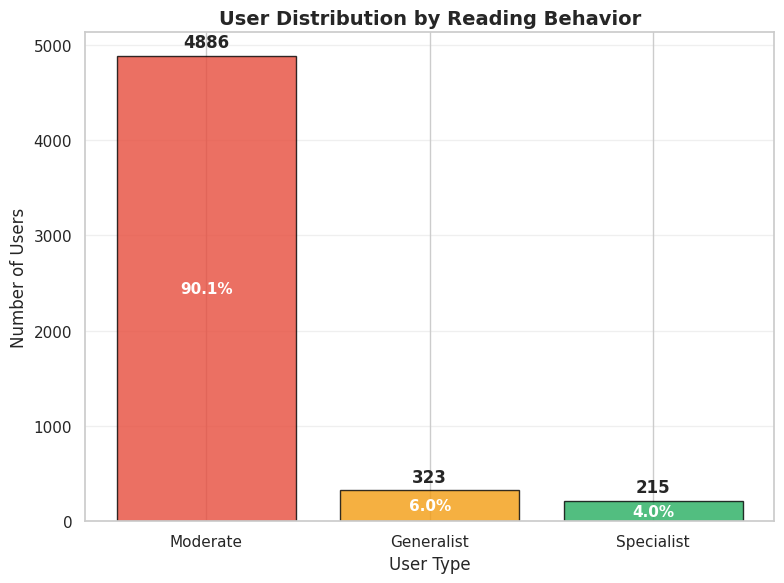

📊 USER DISTRIBUTION SUMMARY:
Moderate    : 4886 users ( 90.1%)
Generalist  :  323 users (  6.0%)
Specialist  :  215 users (  4.0%)


In [76]:
import matplotlib.pyplot as plt

# Bar chart of user distribution
user_counts = gini_df['user_type'].value_counts()
colors = ['#e74c3c', '#f39c12', '#27ae60']  # Red, Orange, Green

plt.figure(figsize=(8, 6))
bars = plt.bar(user_counts.index, user_counts.values, color=colors, alpha=0.8, edgecolor='black')

# Add count labels on bars
for bar, count in zip(bars, user_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
             str(count), ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.title('User Distribution by Reading Behavior', fontsize=14, fontweight='bold')
plt.xlabel('User Type', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add percentages
total_users = len(gini_df)
for i, (user_type, count) in enumerate(user_counts.items()):
    pct = count/total_users*100
    plt.text(i, count/2, f'{pct:.1f}%', ha='center', va='center', 
             fontsize=11, fontweight='bold', color='white')

plt.tight_layout()
plt.show()

print("📊 USER DISTRIBUTION SUMMARY:")
print("=" * 40)
for user_type, count in user_counts.items():
    print(f"{user_type:12}: {count:4} users ({count/total_users*100:5.1f}%)")



In [77]:
# Option 1: Average Gini per algorithm
print("Average Gini per Algorithm:")
print("-" * 30)
for system_name, rec_df in rec_dfs.items():
    avg_gini = get_avg_gini_for_algorithm(system_name, rec_df, specialists, isbn_theme_map)
    print(f"{system_name:<12}: {avg_gini:.3f}")

# Option 2: Overall average across ALL algorithms
print(f"\nHistorical Average: {specialist_hist['gini_coefficient'].mean():.3f}")

# Option 3: Average of all algorithm averages
all_ginis = []
for system_name, rec_df in rec_dfs.items():
    avg_gini = get_avg_gini_for_algorithm(system_name, rec_df, specialists, isbn_theme_map)
    all_ginis.append(avg_gini)

overall_avg = np.mean(all_ginis)
print(f"Overall Average (across algorithms): {overall_avg:.3f}")
print(f"Shift from Historical: {overall_avg - specialist_hist['gini_coefficient'].mean():+.3f}")

Average Gini per Algorithm:
------------------------------
Random      : 0.181
MostPop     : 0.175
UserKNN     : 0.173
WMF         : 0.325
BPR         : 0.188
MF          : 0.214
NMF         : 0.174
PF          : 0.280
PMF         : 0.198
NeuMF       : 0.214
VAECF       : 0.279

Historical Average: 0.361
Overall Average (across algorithms): 0.218
Shift from Historical: -0.143


In [83]:
'''
 Homogenization Bias

Generalists: 10.2 → 6-8 themes is real homogenization
CF pushes diverse users toward rating pattern clusters
Still problematic - systems reduce user diversity

2. Popularity/Data Bias

Theme shifts (Family Dynamics → American Literature) reflect dataset biases
Popular themes in dataset get amplified by CF
Still unfair - ignores individual preferences

3. Pattern Amplification

CF amplifies existing patterns in data
If data has theme imbalances, CF perpetuates them
Systemic bias regardless of algorithm

'''

# Theme ratings analysis - ALL themes
theme_ratings = df.groupby('finegrained_Theme')['Book-Rating'].agg(['mean', 'count']).round(2)
theme_ratings.columns = ['avg_rating', 'num_ratings']
theme_ratings = theme_ratings.sort_values('avg_rating', ascending=False)

print("📊 ALL THEME RATINGS ANALYSIS")
print("=" * 55)
print(f"{'Theme':<35} {'Avg Rating':<12} {'Count'}")
print("-" * 55)

# All themes sorted by rating
for theme, row in theme_ratings.iterrows():
    print(f"{theme[:34]:<35} {row['avg_rating']:<12} {row['num_ratings']}")

print(f"\n📈 SUMMARY STATS:")
print(f"Highest rated theme: {theme_ratings.index[0]} ({theme_ratings.iloc[0]['avg_rating']})")
print(f"Lowest rated theme: {theme_ratings.index[-1]} ({theme_ratings.iloc[-1]['avg_rating']})")
print(f"Average rating across all themes: {theme_ratings['avg_rating'].mean():.2f}")

print(f"\n💡 CF BIAS INSIGHT:")
print("If CF optimizes for ratings, higher-rated themes get recommended more!")
print("This explains algorithmic taste imposition regardless of user preferences.")

📊 ALL THEME RATINGS ANALYSIS
Theme                               Avg Rating   Count
-------------------------------------------------------
Wizarding World                     8.51         1904.0
Apocalyptic Fiction                 8.19         421.0
Epic Fantasy                        8.1          3790.0
Arthurian Legend and Medieval Fant  8.08         1676.0
Historical Time-Travel Romance      8.03         1909.0
Humor, Satire and Comics            8.02         2941.0
War and Historical Drama            8.01         931.0
Cozy Mysteries                      7.99         1178.0
Spiritual and Self-Help             7.97         3889.0
American Literature Classics        7.96         6342.0
International Literature            7.95         748.0
Galactic Adventures                 7.95         1538.0
Holiday Classics                    7.92         1357.0
Vampire/Paranormal Fantasy          7.91         5609.0
Romantic Relationships              7.87         848.0
Family Dynamics and Loss

# User division based on long tail!

In [79]:
book_popularity

ISBN  popularity_ratio  is_popular
0     0003300277          0.000922       False
1     0006550576          0.000922       False
2     0007110928          0.000922       False
3     0007154615          0.001291       False
4     000716226X          0.001291       False
...          ...               ...         ...
5224  842046435X          0.000922       False
5225  8433969978          0.000922       False
5226  846630679X          0.000922       False
5227  8495501198          0.000922       False
5228  950491036X          0.001291       False

[5229 rows x 3 columns]

 USER POPULARITY PREFERENCE ANALYSIS

Distribution Statistics:
Min: 0.0%
Max: 100.0%
Mean: 54.5%
Median: 55.9%

Quartiles:
25th percentile: 40.0%
50th percentile: 55.9%
75th percentile: 69.2%

 Classification (30%/70% thresholds):
Mixed Readers     : 3431 users ( 63.3%)
Mainstream Readers: 1275 users ( 23.5%)
Long-tail Readers :  718 users ( 13.2%)


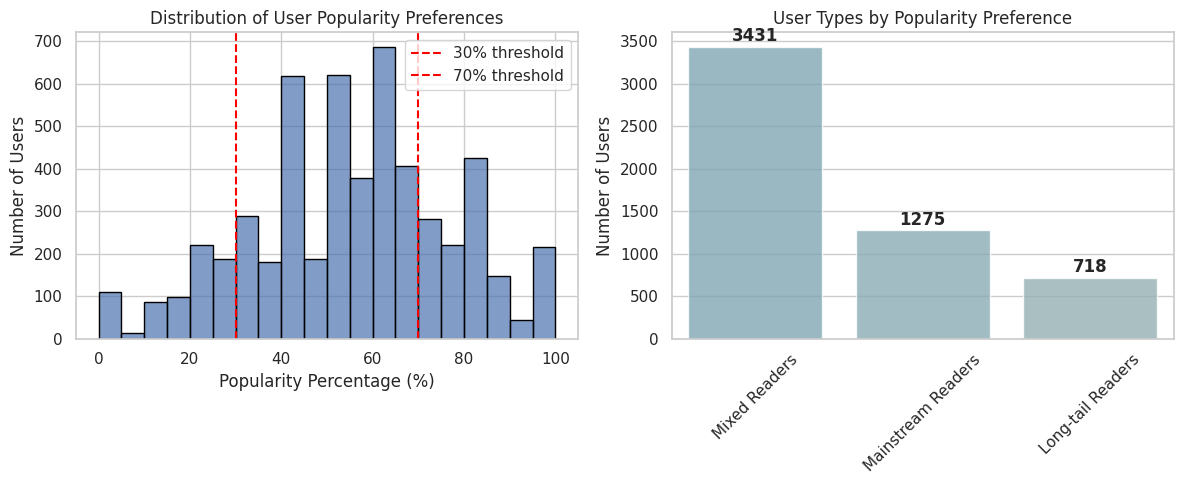

• 0-30%: Long-tail Readers (prefer niche/unpopular books)
• 30-70%: Mixed Readers (balanced reading habits)
• 70-100%: Mainstream Readers (prefer bestsellers/popular books)


In [83]:
# Calculate user popularity preference
user_popularity = df.groupby('User-ID').agg({
    'is_popular': ['sum', 'count']
}).reset_index()

# Flatten column names
user_popularity.columns = ['User-ID', 'popular_books', 'total_books']

# Calculate popularity preference (0-1 scale)
user_popularity['popularity_preference'] = user_popularity['popular_books'] / user_popularity['total_books']

# Convert to percentage for easier interpretation
user_popularity['popularity_percentage'] = user_popularity['popularity_preference'] * 100

print(" USER POPULARITY PREFERENCE ANALYSIS")
print("=" * 50)

print(f"\nDistribution Statistics:")
print(f"Min: {user_popularity['popularity_percentage'].min():.1f}%")
print(f"Max: {user_popularity['popularity_percentage'].max():.1f}%") 
print(f"Mean: {user_popularity['popularity_percentage'].mean():.1f}%")
print(f"Median: {user_popularity['popularity_percentage'].median():.1f}%")

print(f"\nQuartiles:")
for q in [25, 50, 75]:
    val = user_popularity['popularity_percentage'].quantile(q/100)
    print(f"{q}th percentile: {val:.1f}%")

# Classify users
def classify_popularity_preference(pct):
    if pct < 30:
        return 'Long-tail Readers'
    elif pct > 70: 
        return 'Mainstream Readers'
    else:
        return 'Mixed Readers'

user_popularity['reader_type'] = user_popularity['popularity_percentage'].apply(classify_popularity_preference)

print(f"\n Classification (30%/70% thresholds):")
type_counts = user_popularity['reader_type'].value_counts()
for reader_type, count in type_counts.items():
    pct = count/len(user_popularity)*100
    print(f"{reader_type:18}: {count:4} users ({pct:5.1f}%)")

# Show distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(user_popularity['popularity_percentage'], bins=20, alpha=0.7, edgecolor='black')
plt.axvline(30, color='red', linestyle='--', label='30% threshold')
plt.axvline(70, color='red', linestyle='--', label='70% threshold')
plt.xlabel('Popularity Percentage (%)')
plt.ylabel('Number of Users')
plt.title('Distribution of User Popularity Preferences')
plt.legend()

# Bar chart of user types
plt.subplot(1, 2, 2)
colors = ['#2ecc71', '#f39c12', '#e74c3c']  # Green, Orange, Red
bars = plt.bar(type_counts.index, type_counts.values, color=colors, alpha=0.8)
plt.title('User Types by Popularity Preference')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)

# Add count labels
for bar, count in zip(bars, type_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20, 
             str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"• 0-30%: Long-tail Readers (prefer niche/unpopular books)")
print(f"• 30-70%: Mixed Readers (balanced reading habits)")  
print(f"• 70-100%: Mainstream Readers (prefer bestsellers/popular books)")

In [99]:
# Merge user popularity types with main dataframe
df_with_popularity = df.merge(user_popularity[['User-ID', 'reader_type']], on='User-ID', how='left')

print("THEME ANALYSIS BY POPULARITY PREFERENCE")
print("=" * 60)

# Analyze theme distribution for each reader type
for reader_type in ['Long-tail Readers', 'Mixed Readers', 'Mainstream Readers']:
    print(f"\n{reader_type.upper()}:")
    print("-" * 40)
    
    # Get themes for this reader type
    type_themes = df_with_popularity[df_with_popularity['reader_type'] == reader_type]['finegrained_Theme']
    theme_distribution = type_themes.value_counts(normalize=True) * 100
    
    print("Top 10 Themes:")
    for i, (theme, pct) in enumerate(theme_distribution.head(10).items(), 1):
        print(f"{i:2}. {theme[:40]:<40} {pct:5.1f}%")

# Compare top themes across groups
print(f"\nTHEME COMPARISON ACROSS GROUPS:")
print("=" * 80)

# Create comparison table
comparison_data = {}
for reader_type in ['Long-tail Readers', 'Mixed Readers', 'Mainstream Readers']:
    type_themes = df_with_popularity[df_with_popularity['reader_type'] == reader_type]['finegrained_Theme']
    theme_dist = type_themes.value_counts(normalize=True) * 100
    comparison_data[reader_type] = theme_dist

# Get top 15 themes across all groups
all_themes = set()
for themes in comparison_data.values():
    all_themes.update(themes.head(15).index)

print(f"{'Theme':<35} {'Long-tail':<10} {'Mixed':<10} {'Mainstream':<12} {'Difference'}")
print("-" * 80)

for theme in sorted(all_themes):
    longtail_pct = comparison_data['Long-tail Readers'].get(theme, 0)
    mixed_pct = comparison_data['Mixed Readers'].get(theme, 0)
    mainstream_pct = comparison_data['Mainstream Readers'].get(theme, 0)
    
    # Calculate difference between extremes
    diff = mainstream_pct - longtail_pct
    
    print(f"{theme[:34]:<35} {longtail_pct:>7.1f}%  {mixed_pct:>7.1f}%  {mainstream_pct:>9.1f}%  {diff:>+6.1f}")

print(f"\n🔍 KEY INSIGHTS:")
print("• Positive difference = Theme more popular with Mainstream readers")
print("• Negative difference = Theme more popular with Long-tail readers")

# Find themes that show biggest differences
theme_differences = []
for theme in all_themes:
    longtail_pct = comparison_data['Long-tail Readers'].get(theme, 0)
    mainstream_pct = comparison_data['Mainstream Readers'].get(theme, 0)
    diff = mainstream_pct - longtail_pct
    if abs(diff) > 1:  # Only significant differences
        theme_differences.append((theme, diff))

# Sort by difference
theme_differences.sort(key=lambda x: abs(x[1]), reverse=True)

print(f"\n🎭 BIGGEST THEME PREFERENCES DIFFERENCES:")
print("-" * 50)
print("Mainstream-favored themes:")
for theme, diff in theme_differences[:5]:
    if diff > 0:
        print(f"• {theme[:40]:<40} (+{diff:.1f}%)")

print("\nLong-tail-favored themes:")
for theme, diff in theme_differences[:5]:
    if diff < 0:
        print(f"• {theme[:40]:<40} ({diff:.1f}%)")

print(f"\n💡 SUMMARY:")
total_users = len(user_popularity)
for reader_type, count in user_popularity['reader_type'].value_counts().items():
    pct = count/total_users*100
    print(f"{reader_type}: {count} users ({pct:.1f}%)")

THEME ANALYSIS BY POPULARITY PREFERENCE

LONG-TAIL READERS:
----------------------------------------
Top 10 Themes:
 1. Family Dynamics and Relationships         15.3%
 2. Crime Thrillers and Detective Drama       10.1%
 3. Vampire/Paranormal Fantasy                 8.7%
 4. American Literature Classics               6.9%
 5. Epic Fantasy                               6.1%
 6. Romantic Suspense                          6.0%
 7. Space Adventures                           5.1%
 8. Historical Time-Travel Romance             4.6%
 9. Spiritual and Self-Help                    4.4%
10. Humor, Satire and Comics                   4.4%

MIXED READERS:
----------------------------------------
Top 10 Themes:
 1. Family Dynamics and Relationships         16.5%
 2. Crime Thrillers and Detective Drama       12.2%
 3. American Literature Classics               9.1%
 4. Vampire/Paranormal Fantasy                 7.7%
 5. Epic Fantasy                               5.6%
 6. Romantic Suspense           

# Now we will analyse recommendations of these 3 types of users!

# LONG TAIL USERS

In [100]:
# Get long-tail readers
longtail_users = user_popularity[user_popularity['reader_type'] == 'Long-tail Readers']['User-ID'].tolist()
print(f"Long-tail readers: {len(longtail_users)} users")
print(f"Average popularity preference: {user_popularity[user_popularity['reader_type'] == 'Long-tail Readers']['popularity_percentage'].mean():.1f}%")

Long-tail readers: 718 users
Average popularity preference: 17.4%


In [101]:
# Historical reading patterns of long-tail users
longtail_history = df[df['User-ID'].isin(longtail_users)]

print("LONG-TAIL USERS - HISTORICAL READING:")
print(f"Total Interaction with Books: {len(longtail_history)}")
print(f"Popular book Interactions: {longtail_history['is_popular'].sum()} ({longtail_history['is_popular'].mean()*100:.1f}%)")
print(f"Unpopular book interactions: {(~longtail_history['is_popular']).sum()} ({(~longtail_history['is_popular']).mean()*100:.1f}%)")

LONG-TAIL USERS - HISTORICAL READING:
Total Interaction with Books: 6400
Popular book Interactions: 1208 (18.9%)
Unpopular book interactions: 5192 (81.1%)


In [102]:
# Get recommendations for long-tail users (using WMF algorithm)
system_name = 'WMF'
rec_df = rec_dfs[system_name]

longtail_recs = rec_df[rec_df['user_id'].isin(longtail_users)]
longtail_recs_with_info = longtail_recs.merge(book_popularity, left_on='item_id', right_on='ISBN', how='left')
longtail_recs_with_info = longtail_recs_with_info.dropna(subset=['is_popular'])

print(f"🎯 LONG-TAIL USERS - {system_name} RECOMMENDATIONS:")
print(f"Total recommendations: {len(longtail_recs_with_info)}")
print(f"Popular recommendations: {longtail_recs_with_info['is_popular'].sum()} ({longtail_recs_with_info['is_popular'].mean()*100:.1f}%)")
print(f"Unpopular recommendations: {(~longtail_recs_with_info['is_popular']).sum()} ({(~longtail_recs_with_info['is_popular']).mean()*100:.1f}%)")

print(f"\n📊 POPULARITY SHIFT:")
hist_popular_pct = longtail_history['is_popular'].mean() * 100
rec_popular_pct = longtail_recs_with_info['is_popular'].mean() * 100
shift = rec_popular_pct - hist_popular_pct
print(f"Historical: {hist_popular_pct:.1f}% popular books")
print(f"Recommended: {rec_popular_pct:.1f}% popular books")
print(f"Shift: {shift:+.1f}% {'📈 MORE POPULAR' if shift > 0 else '📉 LESS POPULAR' if shift < 0 else '➡️ NO CHANGE'}")

🎯 LONG-TAIL USERS - WMF RECOMMENDATIONS:
Total recommendations: 7180
Popular recommendations: 3525 (49.1%)
Unpopular recommendations: 3655 (50.9%)

📊 POPULARITY SHIFT:
Historical: 18.9% popular books
Recommended: 49.1% popular books
Shift: +30.2% 📈 MORE POPULAR


In [103]:
# Add themes to recommendations
isbn_theme_map = df[['ISBN', 'finegrained_Theme']].drop_duplicates()
longtail_recs_themes = longtail_recs_with_info.merge(isbn_theme_map, left_on='item_id', right_on='ISBN', how='left')
longtail_recs_themes = longtail_recs_themes.dropna(subset=['finegrained_Theme'])

print("🎭 WITHIN-THEME POPULARITY ANALYSIS:")
print("=" * 50)

# Compare top themes: historical vs recommended popularity within each theme
top_themes = hist_themes.head(3).index

for theme in top_themes:
    print(f"\n📖 {theme}:")
    
    # Historical popularity within this theme
    hist_theme_books = longtail_history[longtail_history['finegrained_Theme'] == theme]
    hist_pop_pct = hist_theme_books['is_popular'].mean() * 100 if len(hist_theme_books) > 0 else 0
    
    # Recommended popularity within this theme
    rec_theme_books = longtail_recs_themes[longtail_recs_themes['finegrained_Theme'] == theme]
    rec_pop_pct = rec_theme_books['is_popular'].mean() * 100 if len(rec_theme_books) > 0 else 0
    
    theme_shift = rec_pop_pct - hist_pop_pct
    
    print(f"  Historical: {hist_pop_pct:.1f}% popular books ({len(hist_theme_books)} books)")
    print(f"  Recommended: {rec_pop_pct:.1f}% popular books ({len(rec_theme_books)} books)")
    print(f"  Within-theme shift: {theme_shift:+.1f}% {'📈' if theme_shift > 5 else '📉' if theme_shift < -5 else '➡️'}")

print(f"\n🚨 WITHIN-THEME BIAS VERDICT:")
if rec_popular_pct > hist_popular_pct + 5:
    print("❌ POPULARITY BIAS DETECTED: System pushes long-tail readers toward popular books!")
else:
    print("✅ NO MAJOR BIAS: System respects long-tail reading preferences")

🎭 WITHIN-THEME POPULARITY ANALYSIS:

📖 Family Dynamics and Relationships:
  Historical: 17.9% popular books (977 books)
  Recommended: 48.3% popular books (1054 books)
  Within-theme shift: +30.4% 📈

📖 Crime Thrillers and Detective Drama:
  Historical: 20.9% popular books (646 books)
  Recommended: 54.5% popular books (792 books)
  Within-theme shift: +33.6% 📈

📖 American Literature Classics:
  Historical: 20.2% popular books (440 books)
  Recommended: 54.5% popular books (556 books)
  Within-theme shift: +34.3% 📈

🚨 WITHIN-THEME BIAS VERDICT:
❌ POPULARITY BIAS DETECTED: System pushes long-tail readers toward popular books!


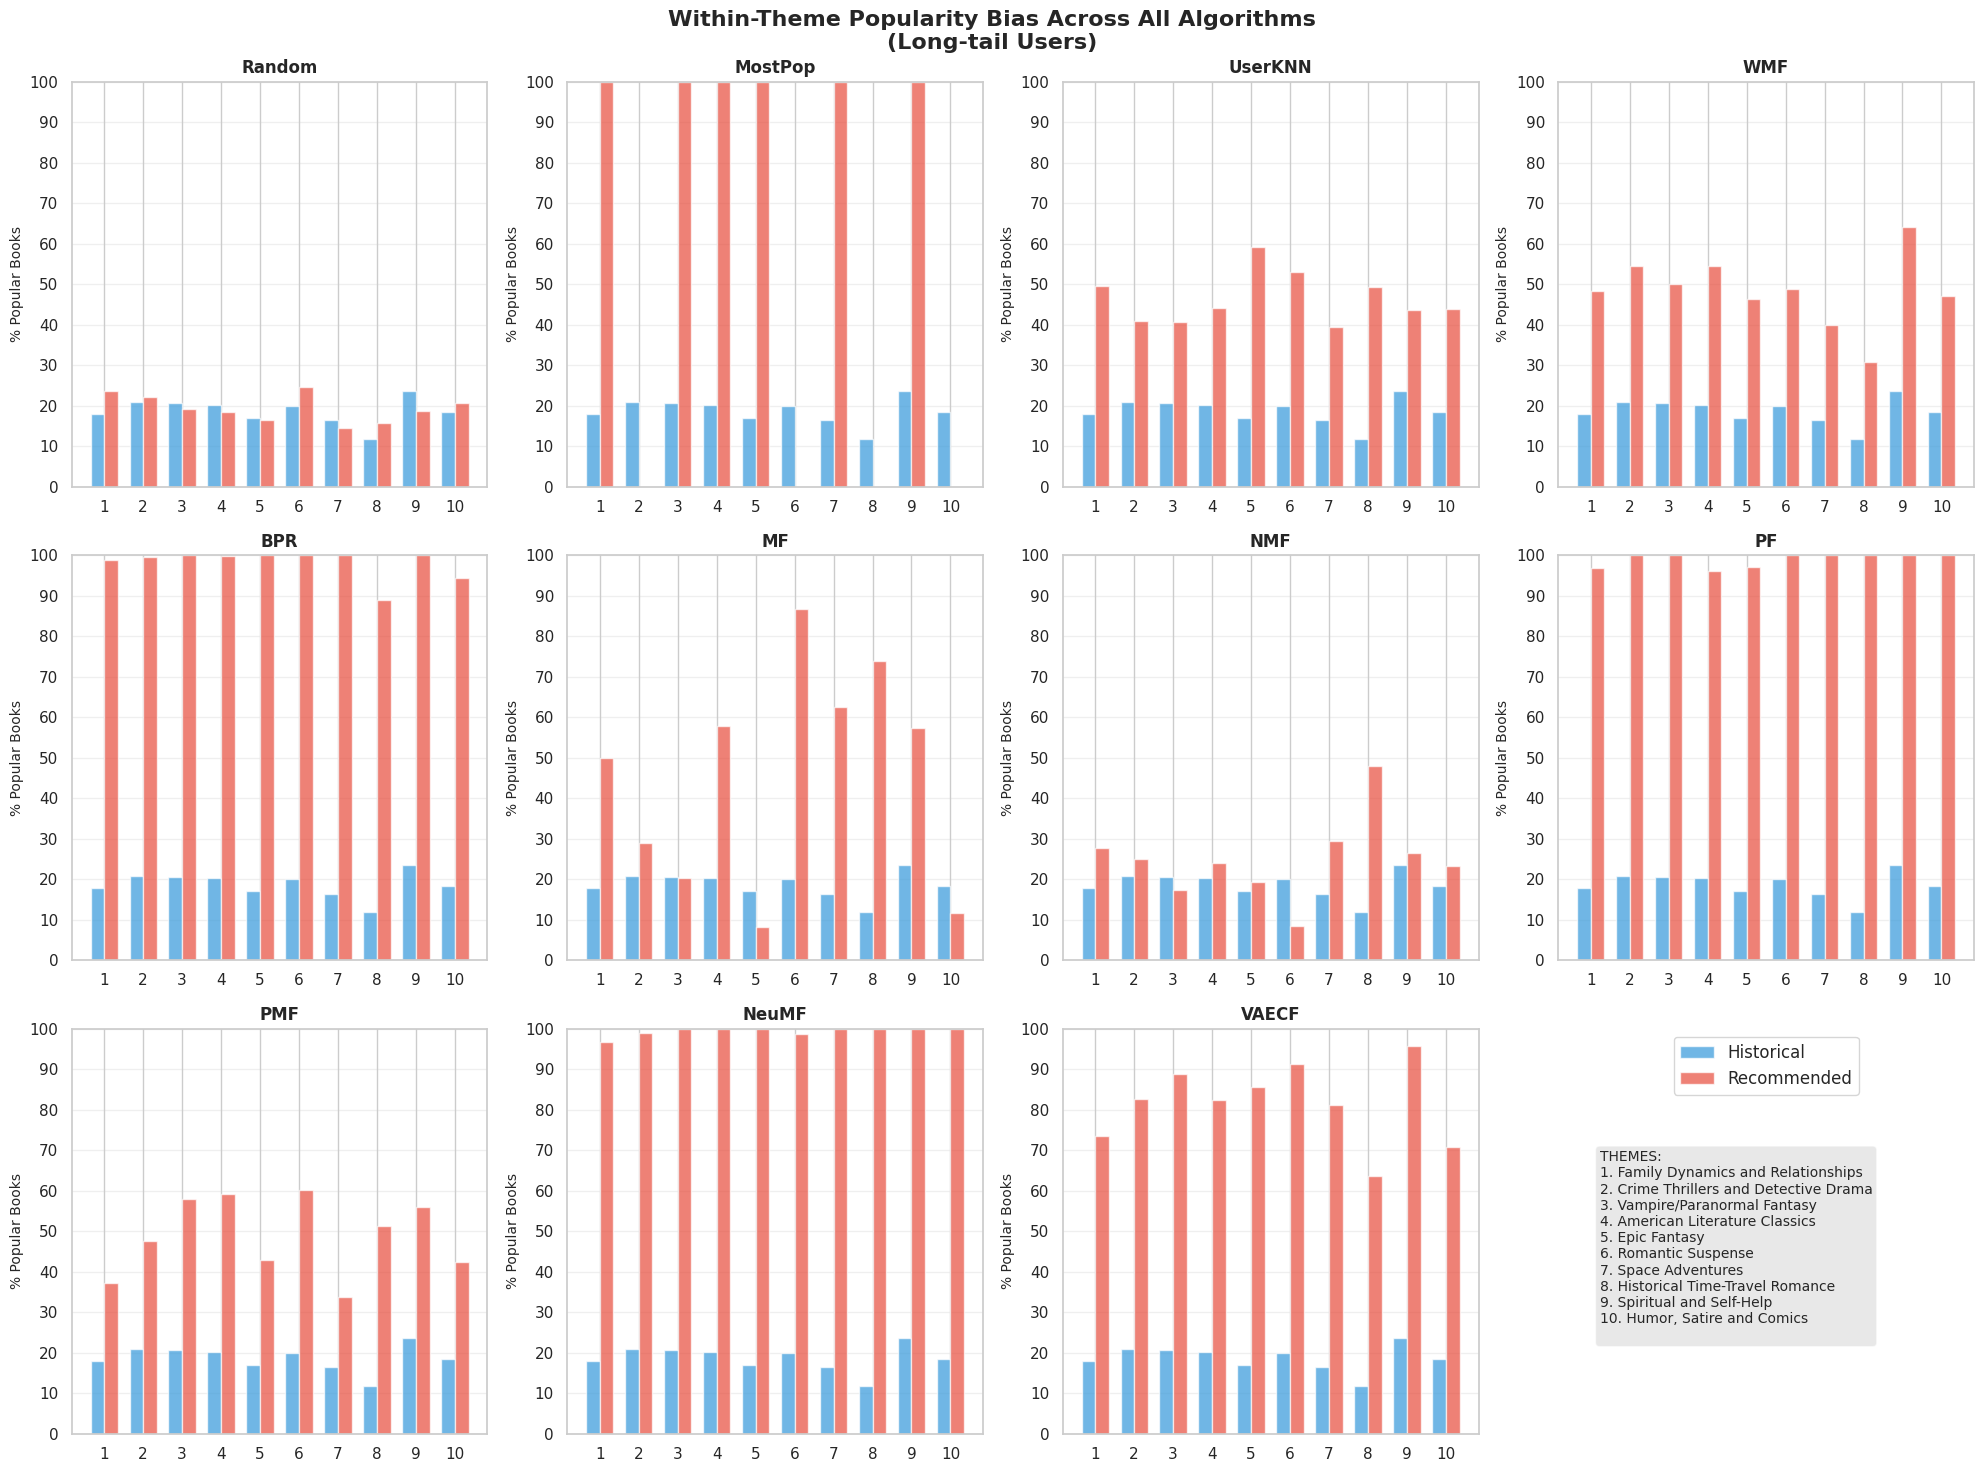


📊 BIAS SUMMARY TABLE:
Algorithm    Avg Shift  Max Shift  Themes >+20%
--------------------------------------------------------------------------------
Random          +0.7%      +5.7%   0/10
MostPop        +41.3%     +83.5%   6/10
UserKNN        +27.7%     +42.1%   9/10
WMF            +29.7%     +40.5%   9/10
BPR            +79.5%     +83.5%   10/10
MF             +27.1%     +66.7%   6/10
NMF             +6.2%     +36.0%   1/10
PF             +80.3%     +88.2%   10/10
PMF            +30.2%     +40.3%   8/10
NeuMF          +80.7%     +88.2%   10/10
VAECF          +62.9%     +72.2%   10/10


In [104]:
import matplotlib.pyplot as plt
import numpy as np

# Get top 10 themes for long-tail users
top_10_themes = longtail_history['finegrained_Theme'].value_counts().head(10).index

# Calculate historical popularity for each theme
hist_popularity = {}
for theme in top_10_themes:
    theme_books = longtail_history[longtail_history['finegrained_Theme'] == theme]
    hist_popularity[theme] = theme_books['is_popular'].mean() * 100

# Create subplots for all algorithms
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

for idx, (system_name, rec_df) in enumerate(rec_dfs.items()):
    # Get recommendations with themes
    recs = rec_df[rec_df['user_id'].isin(longtail_users)]
    recs_info = recs.merge(book_popularity, left_on='item_id', right_on='ISBN', how='left').dropna()
    recs_themes = recs_info.merge(isbn_theme_map, left_on='item_id', right_on='ISBN', how='left').dropna()
    
    # Calculate recommended popularity for each theme
    historical = []
    recommended = []
    
    for theme in top_10_themes:
        rec_books = recs_themes[recs_themes['finegrained_Theme'] == theme]
        rec_pop = rec_books['is_popular'].mean() * 100 if len(rec_books) > 0 else 0
        
        historical.append(hist_popularity[theme])
        recommended.append(rec_pop)
    
    # Create bar chart with numbers on x-axis
    x = np.arange(1, 11)  # Numbers 1-10
    width = 0.35
    
    ax = axes[idx]
    ax.bar(x - width/2, historical, width, label='Historical', color='#3498db', alpha=0.7)
    ax.bar(x + width/2, recommended, width, label='Recommended', color='#e74c3c', alpha=0.7)
    
    ax.set_title(f'{system_name}', fontsize=12, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(x)
    ax.set_ylabel('% Popular Books', fontsize=10)
    
    # Fix Y-axis scale: 0 to 100 with steps of 10
    ax.set_ylim(0, 100)
    ax.set_yticks(np.arange(0, 101, 10))
    
    ax.grid(axis='y', alpha=0.3)

# Create legend in the 12th subplot (bottom right)
legend_ax = axes[11]
legend_ax.axis('off')

# Add color legend
legend_ax.bar(0, 0, color='#3498db', alpha=0.7, label='Historical')
legend_ax.bar(0, 0, color='#e74c3c', alpha=0.7, label='Recommended')
legend_ax.legend(loc='upper center', fontsize=12)

# Add theme legend
legend_text = "THEMES:\n"
for i, theme in enumerate(top_10_themes, 1):
    legend_text += f"{i}. {theme}\n"
legend_ax.text(0.1, 0.7, legend_text, fontsize=10, verticalalignment='top', 
               transform=legend_ax.transAxes, bbox=dict(boxstyle="round,pad=0.3", 
               facecolor="lightgray", alpha=0.5))

plt.suptitle('Within-Theme Popularity Bias Across All Algorithms\n(Long-tail Users)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Print summary table
print("\n📊 BIAS SUMMARY TABLE:")
print("=" * 80)
print(f"{'Algorithm':<12} {'Avg Shift':<10} {'Max Shift':<10} {'Themes >+20%'}")
print("-" * 80)

for system_name, rec_df in rec_dfs.items():
    recs = rec_df[rec_df['user_id'].isin(longtail_users)]
    recs_info = recs.merge(book_popularity, left_on='item_id', right_on='ISBN', how='left').dropna()
    recs_themes = recs_info.merge(isbn_theme_map, left_on='item_id', right_on='ISBN', how='left').dropna()
    
    shifts = []
    high_bias_count = 0
    
    for theme in top_10_themes:
        rec_books = recs_themes[recs_themes['finegrained_Theme'] == theme]
        rec_pop = rec_books['is_popular'].mean() * 100 if len(rec_books) > 0 else 0
        shift = rec_pop - hist_popularity[theme]
        shifts.append(shift)
        if shift > 20:
            high_bias_count += 1
    
    avg_shift = np.mean(shifts)
    max_shift = max(shifts)
    
    print(f"{system_name:<12} {avg_shift:>+7.1f}%   {max_shift:>+7.1f}%   {high_bias_count}/10")

In [105]:
# Per-theme results for each algorithm
top_10_themes = longtail_history['finegrained_Theme'].value_counts().head(10).index

# Historical baseline
hist_popularity = {}
for theme in top_10_themes:
    theme_books = longtail_history[longtail_history['finegrained_Theme'] == theme]
    hist_popularity[theme] = theme_books['is_popular'].mean() * 100

for system_name, rec_df in rec_dfs.items():
    print(f"\n🔍 {system_name}:")
    
    # Get recommendations
    recs = rec_df[rec_df['user_id'].isin(longtail_users)]
    recs_info = recs.merge(book_popularity, left_on='item_id', right_on='ISBN', how='left').dropna()
    recs_themes = recs_info.merge(isbn_theme_map, left_on='item_id', right_on='ISBN', how='left').dropna()
    
    # Per-theme results
    for i, theme in enumerate(top_10_themes, 1):
        rec_books = recs_themes[recs_themes['finegrained_Theme'] == theme]
        rec_pop = rec_books['is_popular'].mean() * 100 if len(rec_books) > 0 else 0
        shift = rec_pop - hist_popularity[theme]
        
        print(f"{i:2}. {theme[:35]:<35}: {hist_popularity[theme]:4.1f}% → {rec_pop:4.1f}% ({shift:+5.1f}%)")


🔍 Random:
 1. Family Dynamics and Relationships  : 17.9% → 23.6% ( +5.7%)
 2. Crime Thrillers and Detective Drama: 20.9% → 22.1% ( +1.2%)
 3. Vampire/Paranormal Fantasy         : 20.6% → 19.1% ( -1.5%)
 4. American Literature Classics       : 20.2% → 18.4% ( -1.8%)
 5. Epic Fantasy                       : 17.0% → 16.4% ( -0.6%)
 6. Romantic Suspense                  : 19.9% → 24.6% ( +4.6%)
 7. Space Adventures                   : 16.5% → 14.5% ( -2.0%)
 8. Historical Time-Travel Romance     : 11.8% → 15.6% ( +3.8%)
 9. Spiritual and Self-Help            : 23.6% → 18.8% ( -4.8%)
10. Humor, Satire and Comics           : 18.4% → 20.8% ( +2.3%)

🔍 MostPop:
 1. Family Dynamics and Relationships  : 17.9% → 100.0% (+82.1%)
 2. Crime Thrillers and Detective Drama: 20.9% →  0.0% (-20.9%)
 3. Vampire/Paranormal Fantasy         : 20.6% → 100.0% (+79.4%)
 4. American Literature Classics       : 20.2% → 100.0% (+79.8%)
 5. Epic Fantasy                       : 17.0% → 100.0% (+83.0%)
 6. Romantic 

Mainstream readers: 1275 users
Average popularity preference: 82.9%
Mainstream USERS - HISTORICAL READING:
Total Interaction with Books: 13048
Popular book Interactions: 10529 (80.7%)
Unpopular book interactions: 2519 (19.3%)


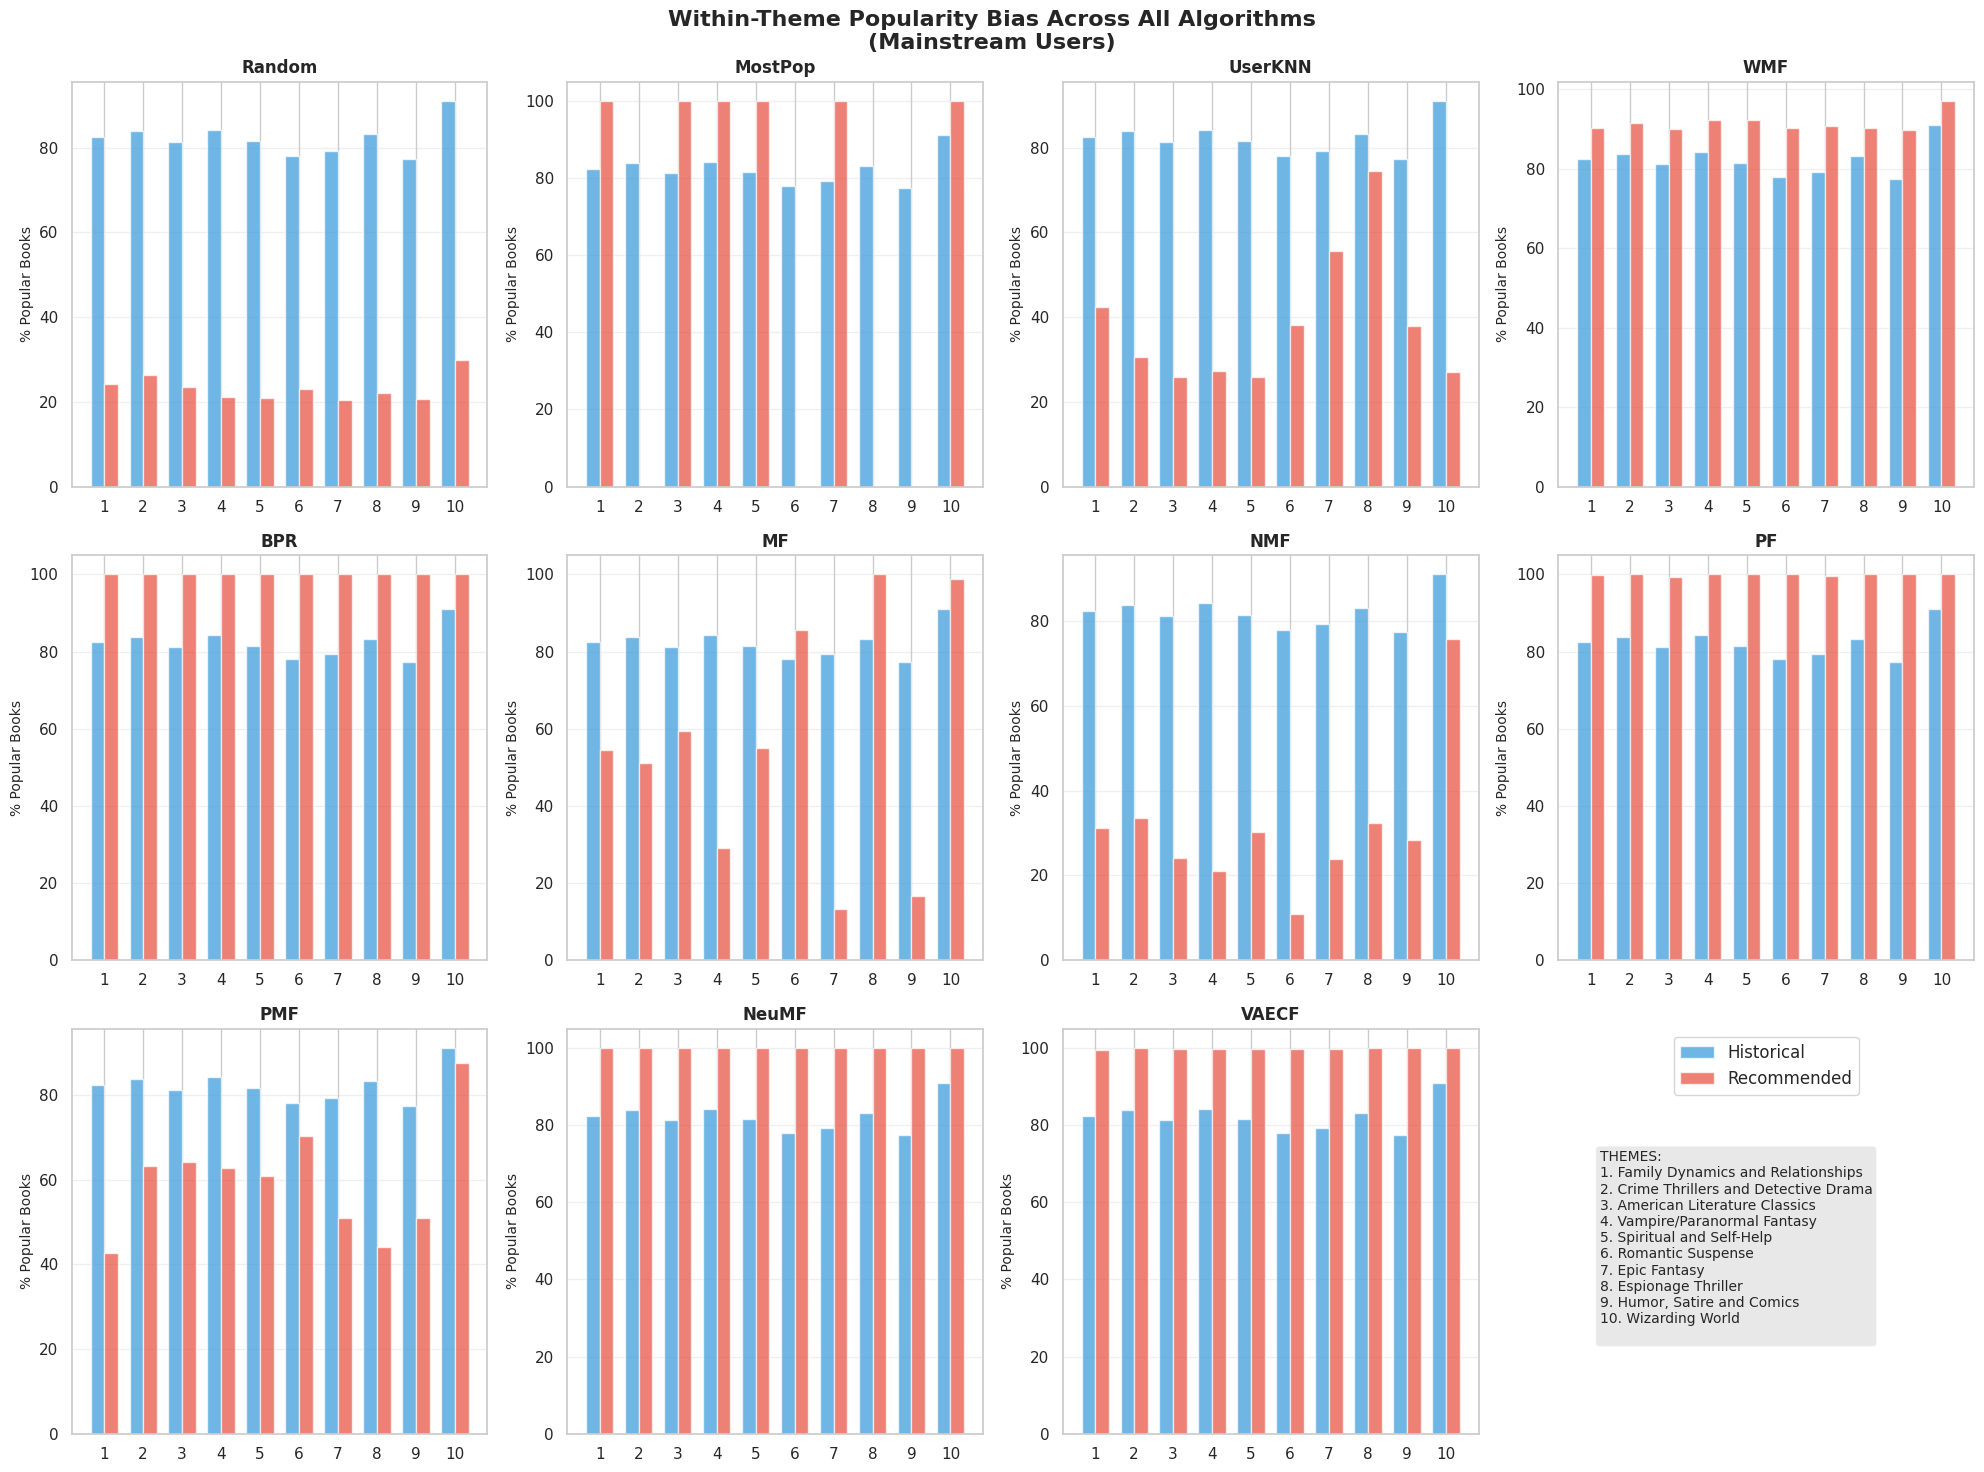


BIAS SUMMARY TABLE:
Algorithm    Avg Shift  Max Shift  Themes >+20%
--------------------------------------------------------------------------------
Random         -59.0%     -54.8%   0/10
MostPop        -22.2%     +20.7%   1/10
UserKNN        -43.7%      -8.6%   0/10
WMF             +9.3%     +12.4%   0/10
BPR            +17.8%     +22.7%   3/10
MF             -25.9%     +16.8%   0/10
NMF            -51.0%     -15.2%   0/10
PF             +17.7%     +22.7%   3/10
PMF            -22.5%      -3.6%   0/10
NeuMF          +17.8%     +22.7%   3/10
VAECF          +17.6%     +22.7%   3/10

🔍 Random:
 1. Family Dynamics and Relationships  : 82.4% → 24.2% (-58.2%)
 2. Crime Thrillers and Detective Drama: 83.8% → 26.3% (-57.6%)
 3. American Literature Classics       : 81.2% → 23.6% (-57.7%)
 4. Vampire/Paranormal Fantasy         : 84.2% → 21.2% (-63.0%)
 5. Spiritual and Self-Help            : 81.5% → 20.8% (-60.7%)
 6. Romantic Suspense                  : 78.0% → 23.1% (-54.8%)
 7. Epic Fantas

In [106]:
# Mainstream user analysis

main_users = user_popularity[user_popularity['reader_type'] == 'Mainstream Readers']['User-ID'].tolist()
print(f"Mainstream readers: {len(main_users)} users")
print(f"Average popularity preference: {user_popularity[user_popularity['reader_type'] == 'Mainstream Readers']['popularity_percentage'].mean():.1f}%")
main_history = df[df['User-ID'].isin(main_users)]

print("Mainstream USERS - HISTORICAL READING:")
print(f"Total Interaction with Books: {len(main_history)}")
print(f"Popular book Interactions: {main_history['is_popular'].sum()} ({main_history['is_popular'].mean()*100:.1f}%)")
print(f"Unpopular book interactions: {(~main_history['is_popular']).sum()} ({(~main_history['is_popular']).mean()*100:.1f}%)")


# Get top 10 themes for main users
top_10_themes = main_history['finegrained_Theme'].value_counts().head(10).index

# Calculate historical popularity for each theme
hist_popularity = {}
for theme in top_10_themes:
    theme_books = main_history[main_history['finegrained_Theme'] == theme]
    hist_popularity[theme] = theme_books['is_popular'].mean() * 100

# Create subplots for all algorithms
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

for idx, (system_name, rec_df) in enumerate(rec_dfs.items()):
    # Get recommendations with themes
    recs = rec_df[rec_df['user_id'].isin(main_users)]
    recs_info = recs.merge(book_popularity, left_on='item_id', right_on='ISBN', how='left').dropna()
    recs_themes = recs_info.merge(isbn_theme_map, left_on='item_id', right_on='ISBN', how='left').dropna()
    
    # Calculate recommended popularity for each theme
    historical = []
    recommended = []
    
    for theme in top_10_themes:
        rec_books = recs_themes[recs_themes['finegrained_Theme'] == theme]
        rec_pop = rec_books['is_popular'].mean() * 100 if len(rec_books) > 0 else 0
        
        historical.append(hist_popularity[theme])
        recommended.append(rec_pop)
    
    # Create bar chart with numbers on x-axis
    x = np.arange(1, 11)  # Numbers 1-10
    width = 0.35
    
    ax = axes[idx]
    ax.bar(x - width/2, historical, width, label='Historical', color='#3498db', alpha=0.7)
    ax.bar(x + width/2, recommended, width, label='Recommended', color='#e74c3c', alpha=0.7)
    
    ax.set_title(f'{system_name}', fontsize=12, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(x)
    ax.set_ylabel('% Popular Books', fontsize=10)
    ax.grid(axis='y', alpha=0.3)

# Create legend in the 12th subplot (bottom right)
legend_ax = axes[11]
legend_ax.axis('off')

# Add color legend
legend_ax.bar(0, 0, color='#3498db', alpha=0.7, label='Historical')
legend_ax.bar(0, 0, color='#e74c3c', alpha=0.7, label='Recommended')
legend_ax.legend(loc='upper center', fontsize=12)

# Add theme legend
legend_text = "THEMES:\n"
for i, theme in enumerate(top_10_themes, 1):
    legend_text += f"{i}. {theme}\n"

legend_ax.text(0.1, 0.7, legend_text, fontsize=10, verticalalignment='top', 
               transform=legend_ax.transAxes, bbox=dict(boxstyle="round,pad=0.3", 
               facecolor="lightgray", alpha=0.5))

plt.suptitle('Within-Theme Popularity Bias Across All Algorithms\n(Mainstream Users)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Print summary table
print("\nBIAS SUMMARY TABLE:")
print("=" * 80)
print(f"{'Algorithm':<12} {'Avg Shift':<10} {'Max Shift':<10} {'Themes >+20%'}")
print("-" * 80)

for system_name, rec_df in rec_dfs.items():
    recs = rec_df[rec_df['user_id'].isin(main_users)]
    recs_info = recs.merge(book_popularity, left_on='item_id', right_on='ISBN', how='left').dropna()
    recs_themes = recs_info.merge(isbn_theme_map, left_on='item_id', right_on='ISBN', how='left').dropna()
    
    shifts = []
    high_bias_count = 0
    
    for theme in top_10_themes:
        rec_books = recs_themes[recs_themes['finegrained_Theme'] == theme]
        rec_pop = rec_books['is_popular'].mean() * 100 if len(rec_books) > 0 else 0
        shift = rec_pop - hist_popularity[theme]
        shifts.append(shift)
        if shift > 20:
            high_bias_count += 1
    
    avg_shift = np.mean(shifts)
    max_shift = max(shifts)
    
    print(f"{system_name:<12} {avg_shift:>+7.1f}%   {max_shift:>+7.1f}%   {high_bias_count}/10")



# Per-theme results for each algorithm
top_10_themes = main_history['finegrained_Theme'].value_counts().head(10).index

# Historical baseline
hist_popularity = {}
for theme in top_10_themes:
    theme_books = main_history[main_history['finegrained_Theme'] == theme]
    hist_popularity[theme] = theme_books['is_popular'].mean() * 100

for system_name, rec_df in rec_dfs.items():
    print(f"\n🔍 {system_name}:")
    
    # Get recommendations
    recs = rec_df[rec_df['user_id'].isin(main_users)]
    recs_info = recs.merge(book_popularity, left_on='item_id', right_on='ISBN', how='left').dropna()
    recs_themes = recs_info.merge(isbn_theme_map, left_on='item_id', right_on='ISBN', how='left').dropna()
    
    # Per-theme results
    for i, theme in enumerate(top_10_themes, 1):
        rec_books = recs_themes[recs_themes['finegrained_Theme'] == theme]
        rec_pop = rec_books['is_popular'].mean() * 100 if len(rec_books) > 0 else 0
        shift = rec_pop - hist_popularity[theme]
        print(f"{i:2}. {theme[:35]:<35}: {hist_popularity[theme]:4.1f}% → {rec_pop:4.1f}% ({shift:+5.1f}%)")



  


Mainstream readers: 1275 users
Average popularity preference: 82.9%
Mainstream USERS - HISTORICAL READING:
Total Interaction with Books: 13048
Popular book Interactions: 10529 (80.7%)
Unpopular book interactions: 2519 (19.3%)


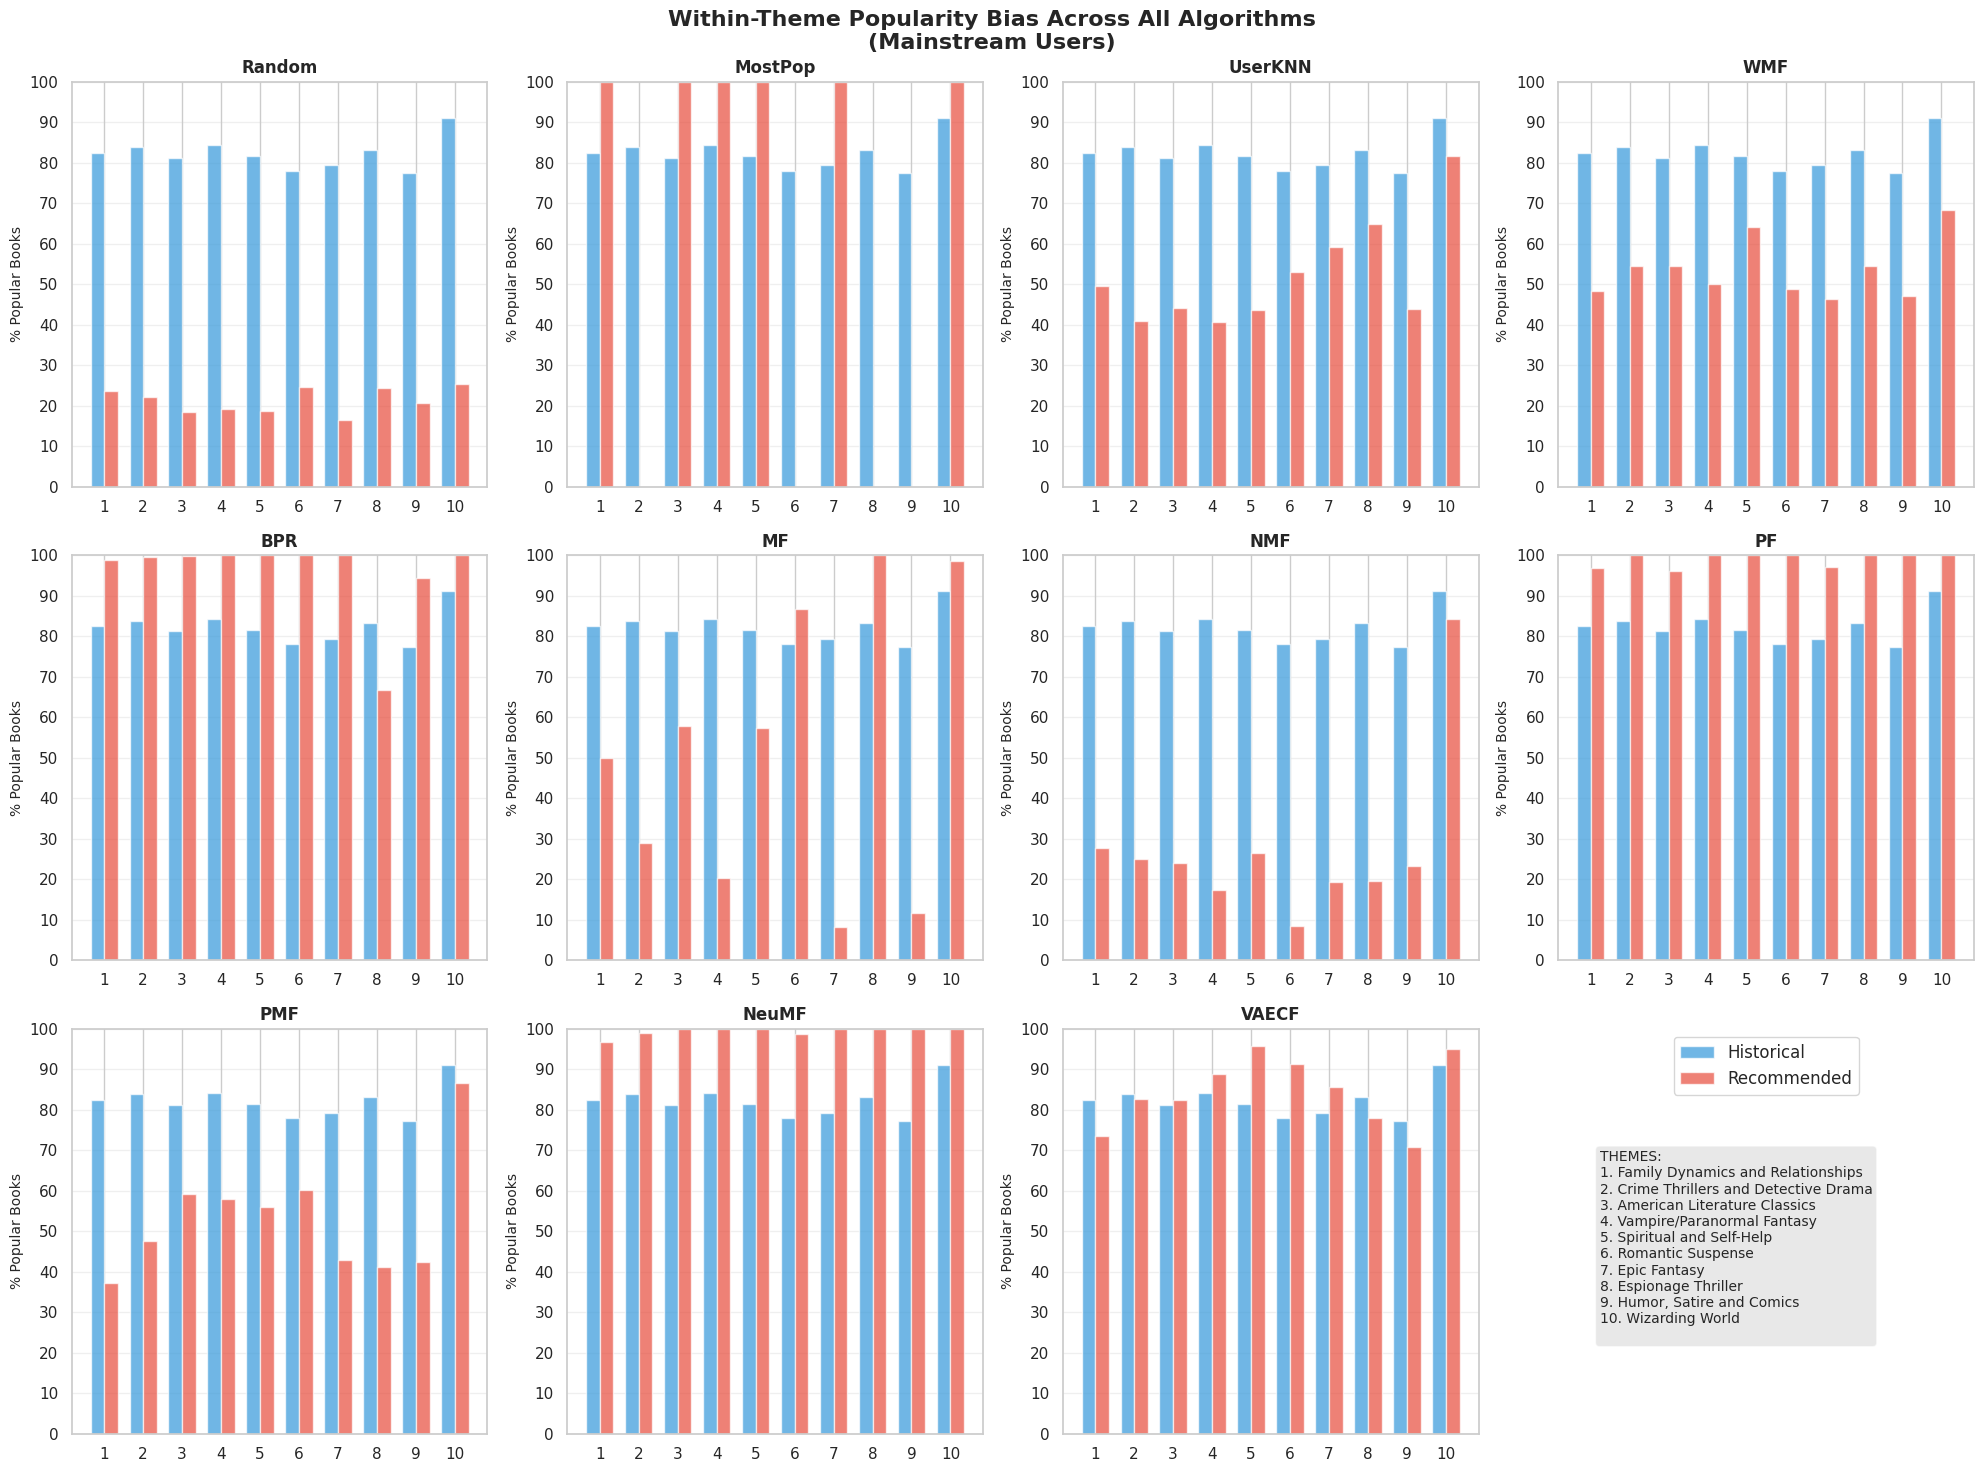


📊 BIAS SUMMARY TABLE:
Algorithm    Avg Shift  Max Shift  Themes >+20%
--------------------------------------------------------------------------------
Random         -60.9%     -53.4%   0/10
MostPop        -22.2%     +20.7%   1/10
UserKNN        -30.1%      -9.4%   0/10
WMF            -28.6%     -17.4%   0/10
BPR            +13.7%     +22.0%   2/10
MF             -30.2%     +16.8%   0/10
NMF            -54.7%      -6.8%   0/10
PF             +16.8%     +22.7%   2/10
PMF            -29.1%      -4.5%   0/10
NeuMF          +17.2%     +22.7%   3/10
VAECF           +2.2%     +14.3%   0/10


In [107]:
main_users = user_popularity[user_popularity['reader_type'] == 'Mainstream Readers']['User-ID'].tolist()
print(f"Mainstream readers: {len(main_users)} users")
print(f"Average popularity preference: {user_popularity[user_popularity['reader_type'] == 'Mainstream Readers']['popularity_percentage'].mean():.1f}%")
main_history = df[df['User-ID'].isin(main_users)]

print("Mainstream USERS - HISTORICAL READING:")
print(f"Total Interaction with Books: {len(main_history)}")
print(f"Popular book Interactions: {main_history['is_popular'].sum()} ({main_history['is_popular'].mean()*100:.1f}%)")
print(f"Unpopular book interactions: {(~main_history['is_popular']).sum()} ({(~main_history['is_popular']).mean()*100:.1f}%)")


# Get top 10 themes for main users
top_10_themes = main_history['finegrained_Theme'].value_counts().head(10).index

# Calculate historical popularity for each theme
hist_popularity = {}
for theme in top_10_themes:
    theme_books = main_history[main_history['finegrained_Theme'] == theme]
    hist_popularity[theme] = theme_books['is_popular'].mean() * 100




# Create subplots for all algorithms
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

for idx, (system_name, rec_df) in enumerate(rec_dfs.items()):
    # Get recommendations with themes
    recs = rec_df[rec_df['user_id'].isin(longtail_users)]
    recs_info = recs.merge(book_popularity, left_on='item_id', right_on='ISBN', how='left').dropna()
    recs_themes = recs_info.merge(isbn_theme_map, left_on='item_id', right_on='ISBN', how='left').dropna()
    
    # Calculate recommended popularity for each theme
    historical = []
    recommended = []
    
    for theme in top_10_themes:
        rec_books = recs_themes[recs_themes['finegrained_Theme'] == theme]
        rec_pop = rec_books['is_popular'].mean() * 100 if len(rec_books) > 0 else 0
        
        historical.append(hist_popularity[theme])
        recommended.append(rec_pop)
    
    # Create bar chart with numbers on x-axis
    x = np.arange(1, 11)  # Numbers 1-10
    width = 0.35
    
    ax = axes[idx]
    ax.bar(x - width/2, historical, width, label='Historical', color='#3498db', alpha=0.7)
    ax.bar(x + width/2, recommended, width, label='Recommended', color='#e74c3c', alpha=0.7)
    
    ax.set_title(f'{system_name}', fontsize=12, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(x)
    ax.set_ylabel('% Popular Books', fontsize=10)
    
    # Fix Y-axis scale: 0 to 100 with steps of 10
    ax.set_ylim(0, 100)
    ax.set_yticks(np.arange(0, 101, 10))
    
    ax.grid(axis='y', alpha=0.3)

# Create legend in the 12th subplot (bottom right)
legend_ax = axes[11]
legend_ax.axis('off')

# Add color legend
legend_ax.bar(0, 0, color='#3498db', alpha=0.7, label='Historical')
legend_ax.bar(0, 0, color='#e74c3c', alpha=0.7, label='Recommended')
legend_ax.legend(loc='upper center', fontsize=12)

# Add theme legend
legend_text = "THEMES:\n"
for i, theme in enumerate(top_10_themes, 1):
    legend_text += f"{i}. {theme}\n"
legend_ax.text(0.1, 0.7, legend_text, fontsize=10, verticalalignment='top', 
               transform=legend_ax.transAxes, bbox=dict(boxstyle="round,pad=0.3", 
               facecolor="lightgray", alpha=0.5))

plt.suptitle('Within-Theme Popularity Bias Across All Algorithms\n(Mainstream Users)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Print summary table
print("\n📊 BIAS SUMMARY TABLE:")
print("=" * 80)
print(f"{'Algorithm':<12} {'Avg Shift':<10} {'Max Shift':<10} {'Themes >+20%'}")
print("-" * 80)

for system_name, rec_df in rec_dfs.items():
    recs = rec_df[rec_df['user_id'].isin(longtail_users)]
    recs_info = recs.merge(book_popularity, left_on='item_id', right_on='ISBN', how='left').dropna()
    recs_themes = recs_info.merge(isbn_theme_map, left_on='item_id', right_on='ISBN', how='left').dropna()
    
    shifts = []
    high_bias_count = 0
    
    for theme in top_10_themes:
        rec_books = recs_themes[recs_themes['finegrained_Theme'] == theme]
        rec_pop = rec_books['is_popular'].mean() * 100 if len(rec_books) > 0 else 0
        shift = rec_pop - hist_popularity[theme]
        shifts.append(shift)
        if shift > 20:
            high_bias_count += 1
    
    avg_shift = np.mean(shifts)
    max_shift = max(shifts)
    
    print(f"{system_name:<12} {avg_shift:>+7.1f}%   {max_shift:>+7.1f}%   {high_bias_count}/10")

In [108]:
# Mixed user analysis

mixed_users = user_popularity[user_popularity['reader_type'] == 'Mixed Readers']['User-ID'].tolist()
print(f"Mixed readers: {len(mixed_users)} users")
print(f"Average popularity preference: {user_popularity[user_popularity['reader_type'] == 'Mixed Readers']['popularity_percentage'].mean():.1f}%")
mixed_history = df[df['User-ID'].isin(mixed_users)]

print("Mixed USERS - HISTORICAL READING:")
print(f"Total Interaction with Books: {len(mixed_history)}")
print(f"Popular book Interactions: {mixed_history['is_popular'].sum()} ({mixed_history['is_popular'].mean()*100:.1f}%)")
print(f"Unpopular book interactions: {(~mixed_history['is_popular']).sum()} ({(~mixed_history['is_popular']).mean()*100:.1f}%)")



import matplotlib.pyplot as plt
import numpy as np

# Get top 10 themes for mixed-tail users
top_10_themes = mixed_history['finegrained_Theme'].value_counts().head(10).index

# Calculate historical popularity for each theme
hist_popularity = {}
for theme in top_10_themes:
    theme_books = mixed_history[mixed_history['finegrained_Theme'] == theme]
    hist_popularity[theme] = theme_books['is_popular'].mean() * 100

# Create subplots for all algorithms
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

for idx, (system_name, rec_df) in enumerate(rec_dfs.items()):
    # Get recommendations with themes
    recs = rec_df[rec_df['user_id'].isin(mixed_users)]
    recs_info = recs.merge(book_popularity, left_on='item_id', right_on='ISBN', how='left').dropna()
    recs_themes = recs_info.merge(isbn_theme_map, left_on='item_id', right_on='ISBN', how='left').dropna()
    
    # Calculate recommended popularity for each theme
    historical = []
    recommended = []
    
    for theme in top_10_themes:
        rec_books = recs_themes[recs_themes['finegrained_Theme'] == theme]
        rec_pop = rec_books['is_popular'].mean() * 100 if len(rec_books) > 0 else 0
        
        historical.append(hist_popularity[theme])
        recommended.append(rec_pop)
    
    # Create bar chart with numbers on x-axis
    x = np.arange(1, 11)  # Numbers 1-10
    width = 0.35
    
    ax = axes[idx]
    ax.bar(x - width/2, historical, width, label='Historical', color='#3498db', alpha=0.7)
    ax.bar(x + width/2, recommended, width, label='Recommended', color='#e74c3c', alpha=0.7)
    
    ax.set_title(f'{system_name}', fontsize=12, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(x)
    ax.set_ylabel('% Popular Books', fontsize=10)
    ax.grid(axis='y', alpha=0.3)

# Create legend in the 12th subplot (bottom right)
legend_ax = axes[11]
legend_ax.axis('off')

# Add color legend
legend_ax.bar(0, 0, color='#3498db', alpha=0.7, label='Historical')
legend_ax.bar(0, 0, color='#e74c3c', alpha=0.7, label='Recommended')
legend_ax.legend(loc='upper center', fontsize=12)

# Add theme legend
legend_text = "THEMES:\n"
for i, theme in enumerate(top_10_themes, 1):
    legend_text += f"{i}. {theme}\n"

legend_ax.text(0.1, 0.7, legend_text, fontsize=10, verticalalignment='top', 
               transform=legend_ax.transAxes, bbox=dict(boxstyle="round,pad=0.3", 
               facecolor="lightgray", alpha=0.5))

plt.suptitle('Within-Theme Popularity Bias Across All Algorithms\n(Mixed Users)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Print summary table
print("\nBIAS SUMMARY TABLE:")
print("=" * 80)
print(f"{'Algorithm':<12} {'Avg Shift':<10} {'Max Shift':<10} {'Themes >+20%'}")
print("-" * 80)

for system_name, rec_df in rec_dfs.items():
    recs = rec_df[rec_df['user_id'].isin(mixed_users)]
    recs_info = recs.merge(book_popularity, left_on='item_id', right_on='ISBN', how='left').dropna()
    recs_themes = recs_info.merge(isbn_theme_map, left_on='item_id', right_on='ISBN', how='left').dropna()
    
    shifts = []
    high_bias_count = 0
    
    for theme in top_10_themes:
        rec_books = recs_themes[recs_themes['finegrained_Theme'] == theme]
        rec_pop = rec_books['is_popular'].mean() * 100 if len(rec_books) > 0 else 0
        shift = rec_pop - hist_popularity[theme]
        shifts.append(shift)
        if shift > 20:
            high_bias_count += 1
    
    avg_shift = np.mean(shifts)
    max_shift = max(shifts)
    
    print(f"{system_name:<12} {avg_shift:>+7.1f}%   {max_shift:>+7.1f}%   {high_bias_count}/10")



# Per-theme results for each algorithm
top_10_themes = mixed_history['finegrained_Theme'].value_counts().head(10).index

# Historical baseline
hist_popularity = {}
for theme in top_10_themes:
    theme_books = mixed_history[mixed_history['finegrained_Theme'] == theme]
    hist_popularity[theme] = theme_books['is_popular'].mean() * 100

for system_name, rec_df in rec_dfs.items():
    print(f"\n🔍 {system_name}:")
    
    # Get recommendations
    recs = rec_df[rec_df['user_id'].isin(mixed_users)]
    recs_info = recs.merge(book_popularity, left_on='item_id', right_on='ISBN', how='left').dropna()
    recs_themes = recs_info.merge(isbn_theme_map, left_on='item_id', right_on='ISBN', how='left').dropna()
    
    # Per-theme results
    for i, theme in enumerate(top_10_themes, 1):
        rec_books = recs_themes[recs_themes['finegrained_Theme'] == theme]
        rec_pop = rec_books['is_popular'].mean() * 100 if len(rec_books) > 0 else 0
        shift = rec_pop - hist_popularity[theme]
        print(f"{i:2}. {theme[:35]:<35}: {hist_popularity[theme]:4.1f}% → {rec_pop:4.1f}% ({shift:+5.1f}%)")


Mixed readers: 3431 users
Average popularity preference: 51.7%
Mixed USERS - HISTORICAL READING:
Total Interaction with Books: 51174
Popular book Interactions: 26614 (52.0%)
Unpopular book interactions: 24560 (48.0%)


KeyboardInterrupt: 

In [ ]:
mixed_users = user_popularity[user_popularity['reader_type'] == 'Mixed Readers']['User-ID'].tolist()
print(f"Mixed readers: {len(mixed_users)} users")
print(f"Average popularity preference: {user_popularity[user_popularity['reader_type'] == 'Mixed Readers']['popularity_percentage'].mean():.1f}%")
mixed_history = df[df['User-ID'].isin(mixed_users)]

print("Mixed USERS - HISTORICAL READING:")
print(f"Total Interaction with Books: {len(mixed_history)}")
print(f"Popular book Interactions: {mixed_history['is_popular'].sum()} ({mixed_history['is_popular'].mean()*100:.1f}%)")
print(f"Unpopular book interactions: {(~mixed_history['is_popular']).sum()} ({(~mixed_history['is_popular']).mean()*100:.1f}%)")


# Get top 10 themes for mixed-tail users
top_10_themes = mixed_history['finegrained_Theme'].value_counts().head(10).index

# Calculate historical popularity for each theme
hist_popularity = {}
for theme in top_10_themes:
    theme_books = mixed_history[mixed_history['finegrained_Theme'] == theme]
    hist_popularity[theme] = theme_books['is_popular'].mean() * 100

# Create subplots for all algorithms
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

for idx, (system_name, rec_df) in enumerate(rec_dfs.items()):
    # Get recommendations with themes
    recs = rec_df[rec_df['user_id'].isin(longtail_users)]
    recs_info = recs.merge(book_popularity, left_on='item_id', right_on='ISBN', how='left').dropna()
    recs_themes = recs_info.merge(isbn_theme_map, left_on='item_id', right_on='ISBN', how='left').dropna()
    
    # Calculate recommended popularity for each theme
    historical = []
    recommended = []
    
    for theme in top_10_themes:
        rec_books = recs_themes[recs_themes['finegrained_Theme'] == theme]
        rec_pop = rec_books['is_popular'].mean() * 100 if len(rec_books) > 0 else 0
        
        historical.append(hist_popularity[theme])
        recommended.append(rec_pop)
    
    # Create bar chart with numbers on x-axis
    x = np.arange(1, 11)  # Numbers 1-10
    width = 0.35
    
    ax = axes[idx]
    ax.bar(x - width/2, historical, width, label='Historical', color='#3498db', alpha=0.7)
    ax.bar(x + width/2, recommended, width, label='Recommended', color='#e74c3c', alpha=0.7)
    
    ax.set_title(f'{system_name}', fontsize=12, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(x)
    ax.set_ylabel('% Popular Books', fontsize=10)
    
    # Fix Y-axis scale: 0 to 100 with steps of 10
    ax.set_ylim(0, 100)
    ax.set_yticks(np.arange(0, 101, 10))
    
    ax.grid(axis='y', alpha=0.3)

# Create legend in the 12th subplot (bottom right)
legend_ax = axes[11]
legend_ax.axis('off')

# Add color legend
legend_ax.bar(0, 0, color='#3498db', alpha=0.7, label='Historical')
legend_ax.bar(0, 0, color='#e74c3c', alpha=0.7, label='Recommended')
legend_ax.legend(loc='upper center', fontsize=12)

# Add theme legend
legend_text = "THEMES:\n"
for i, theme in enumerate(top_10_themes, 1):
    legend_text += f"{i}. {theme}\n"
legend_ax.text(0.1, 0.7, legend_text, fontsize=10, verticalalignment='top', 
               transform=legend_ax.transAxes, bbox=dict(boxstyle="round,pad=0.3", 
               facecolor="lightgray", alpha=0.5))

plt.suptitle('Within-Theme Popularity Bias Across All Algorithms\n(Mixed Users)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Print summary table
print("\n📊 BIAS SUMMARY TABLE:")
print("=" * 80)
print(f"{'Algorithm':<12} {'Avg Shift':<10} {'Max Shift':<10} {'Themes >+20%'}")
print("-" * 80)

for system_name, rec_df in rec_dfs.items():
    recs = rec_df[rec_df['user_id'].isin(longtail_users)]
    recs_info = recs.merge(book_popularity, left_on='item_id', right_on='ISBN', how='left').dropna()
    recs_themes = recs_info.merge(isbn_theme_map, left_on='item_id', right_on='ISBN', how='left').dropna()
    
    shifts = []
    high_bias_count = 0
    
    for theme in top_10_themes:
        rec_books = recs_themes[recs_themes['finegrained_Theme'] == theme]
        rec_pop = rec_books['is_popular'].mean() * 100 if len(rec_books) > 0 else 0
        shift = rec_pop - hist_popularity[theme]
        shifts.append(shift)
        if shift > 20:
            high_bias_count += 1
    
    avg_shift = np.mean(shifts)
    max_shift = max(shifts)
    
    print(f"{system_name:<12} {avg_shift:>+7.1f}%   {max_shift:>+7.1f}%   {high_bias_count}/10")

# Intersectionality of User Groups

In [109]:
def calculate_gini_coefficient(theme_counts):
    if len(theme_counts) <= 1:
        return 0
    sorted_values = np.sort(theme_counts.values)
    n = len(sorted_values)
    index = np.arange(1, n + 1)
    gini = (2 * np.sum(index * sorted_values)) / (n * np.sum(sorted_values)) - (n + 1) / n
    return gini

# Calculate for each user
user_gini_scores = []
for user_id in df['User-ID'].unique():
    user_themes = df[df['User-ID'] == user_id]['finegrained_Theme']
    theme_counts = user_themes.value_counts()
    
    if len(theme_counts) > 0:
        gini_score = calculate_gini_coefficient(theme_counts)
        user_gini_scores.append({
            'User-ID': user_id,
            'gini_coefficient': gini_score,
            'num_themes': len(theme_counts)
        })

gini_df = pd.DataFrame(user_gini_scores)

User Type Distribution:
Moderate      4886
Generalist     323
Specialist     215
Name: user_type, dtype: int64

Group Characteristics:
            num_themes  gini_coefficient
user_type                               
Generalist       10.23              0.18
Moderate          6.78              0.23
Specialist        3.43              0.36


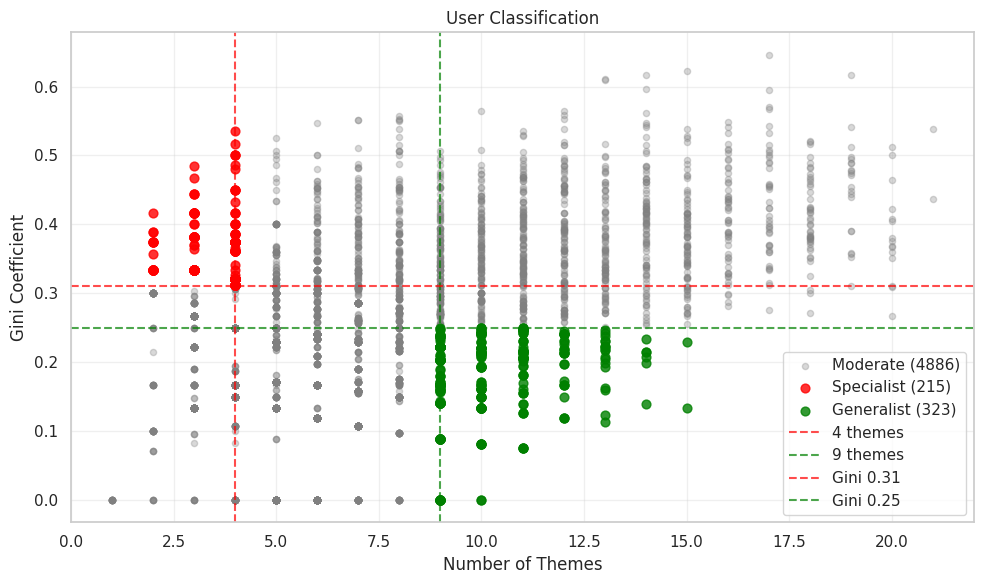

In [112]:
import matplotlib.pyplot as plt

# Apply your classification
def classify_simple(row):
    themes, gini = row['num_themes'], row['gini_coefficient']
    
    if themes <=4 and gini >= 0.31:  # Few themes + concentrated
        return 'Specialist'
    elif themes >= 9 and gini <= 0.25:  # Many themes + even
        return 'Generalist'
    else:
        return 'Moderate'

gini_df['user_type'] = gini_df.apply(classify_simple, axis=1)

# Results
print("User Type Distribution:")
print(gini_df['user_type'].value_counts())
print("\nGroup Characteristics:")
print(gini_df.groupby('user_type')[['num_themes', 'gini_coefficient']].mean().round(2))

# Simple plot
plt.figure(figsize=(10, 6))

colors = {'Specialist': 'red', 'Moderate': 'gray', 'Generalist': 'green'}
for group in ['Moderate', 'Specialist', 'Generalist']:  # Plot moderate first (background)
    if group in gini_df['user_type'].values:
        subset = gini_df[gini_df['user_type'] == group]
        alpha = 0.3 if group == 'Moderate' else 0.8
        size = 20 if group == 'Moderate' else 40
        plt.scatter(subset['num_themes'], subset['gini_coefficient'], 
                   c=colors[group], alpha=alpha, s=size, label=f"{group} ({len(subset)})")

# Add threshold lines
plt.axvline(x=4, color='red', linestyle='--', alpha=0.7, label='4 themes')
plt.axvline(x=9, color='green', linestyle='--', alpha=0.7, label='9 themes')
plt.axhline(y=0.31, color='red', linestyle='--', alpha=0.7, label='Gini 0.31')
plt.axhline(y=0.25, color='green', linestyle='--', alpha=0.7, label='Gini 0.25')

plt.xlabel('Number of Themes')
plt.ylabel('Gini Coefficient')
plt.title('User Classification')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

📊 CROSS-CLASSIFICATION USER DISTRIBUTION
reader_type  Long-tail Readers  Mainstream Readers  Mixed Readers
user_type                                                        
Generalist                  24                  59            240
Moderate                   646                1145           3095
Specialist                  48                  71             96

Total users classified: 5424


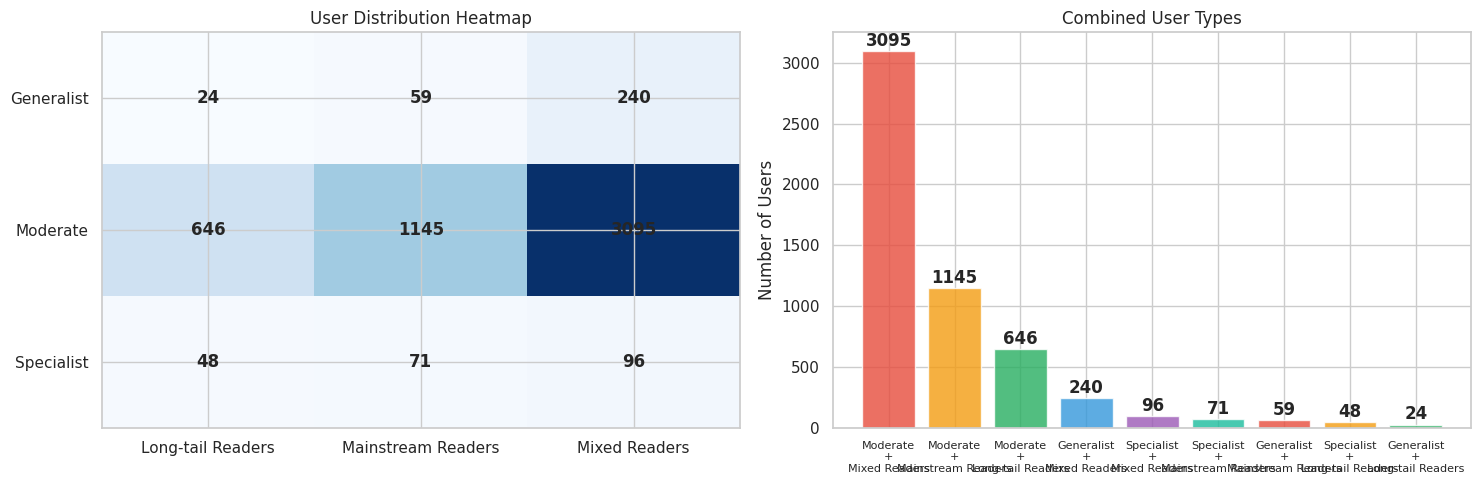


🎯 DETAILED BREAKDOWN:
Moderate + Mixed Readers           : 3095 users ( 57.1%)
Moderate + Mainstream Readers      : 1145 users ( 21.1%)
Moderate + Long-tail Readers       :  646 users ( 11.9%)
Generalist + Mixed Readers         :  240 users (  4.4%)
Specialist + Mixed Readers         :   96 users (  1.8%)
Specialist + Mainstream Readers    :   71 users (  1.3%)
Generalist + Mainstream Readers    :   59 users (  1.1%)
Specialist + Long-tail Readers     :   48 users (  0.9%)
Generalist + Long-tail Readers     :   24 users (  0.4%)


In [117]:
import matplotlib.pyplot as plt
import numpy as np

# Merge both classifications
combined_users = gini_df[['User-ID', 'user_type']].merge(
    user_popularity[['User-ID', 'reader_type']], on='User-ID', how='inner'
)

# Create combined user type
combined_users['combined_type'] = combined_users['user_type'] + ' + ' + combined_users['reader_type']

# Count distribution
cross_table = combined_users.pivot_table(
    index='user_type', 
    columns='reader_type', 
    aggfunc='size', 
    fill_value=0
)

print("📊 CROSS-CLASSIFICATION USER DISTRIBUTION")
print("=" * 60)
print(cross_table)

print(f"\nTotal users classified: {len(combined_users)}")

# Visualize as heatmap
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Heatmap of counts
im = ax1.imshow(cross_table.values, cmap='Blues', aspect='auto')
ax1.set_xticks(range(len(cross_table.columns)))
ax1.set_yticks(range(len(cross_table.index)))
ax1.set_xticklabels(cross_table.columns)
ax1.set_yticklabels(cross_table.index)
ax1.set_title('User Distribution Heatmap')

# Add count labels
for i in range(len(cross_table.index)):
    for j in range(len(cross_table.columns)):
        ax1.text(j, i, cross_table.iloc[i,j], ha='center', va='center', fontweight='bold')

combined_counts = combined_users['combined_type'].value_counts()
colors = ['#e74c3c', '#f39c12', '#27ae60', '#3498db', '#9b59b6', '#1abc9c']

bars = ax2.bar(range(len(combined_counts)), combined_counts.values, color=colors, alpha=0.8)
ax2.set_xticks(range(len(combined_counts)))
ax2.set_xticklabels([t.replace(' + ', '\n+\n') for t in combined_counts.index], fontsize=8, rotation=0)
ax2.set_title('Combined User Types')
ax2.set_ylabel('Number of Users')

# Add count labels on bars
for bar, count in zip(bars, combined_counts.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, 
             str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Print detailed breakdown
print(f"\n🎯 DETAILED BREAKDOWN:")
for user_type, count in combined_counts.items():
    pct = count/len(combined_users)*100
    print(f"{user_type:<35}: {count:4} users ({pct:5.1f}%)")

📊 CROSS-CLASSIFICATION USER DISTRIBUTION
reader_type  Long-tail Readers  Mixed Readers  Mainstream Readers
user_type                                                        
Specialist                  48             96                  71
Moderate                   646           3095                1145
Generalist                  24            240                  59

Total users classified: 5424


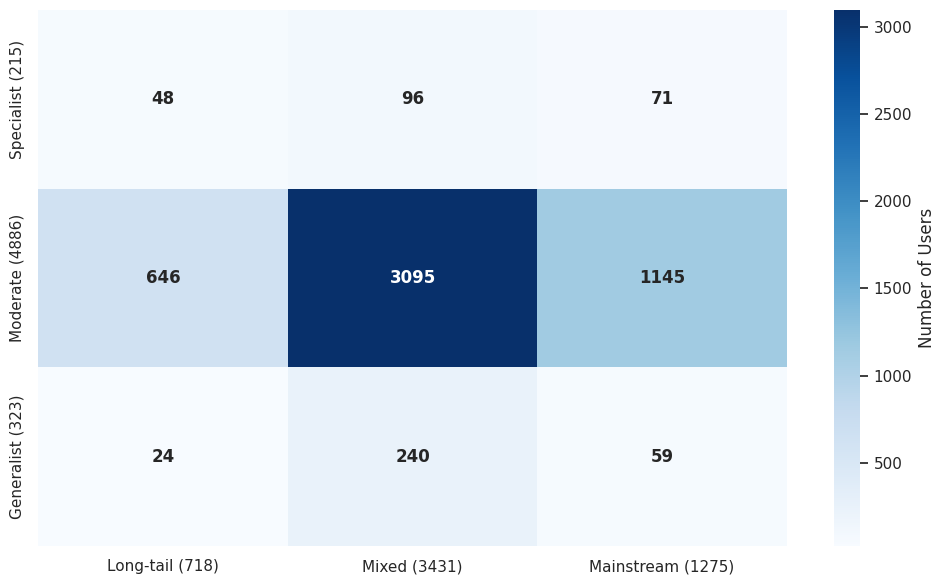


🎯 DETAILED BREAKDOWN:
Moderate + Mixed Readers           : 3095 users ( 57.1%)
Moderate + Mainstream Readers      : 1145 users ( 21.1%)
Moderate + Long-tail Readers       :  646 users ( 11.9%)
Generalist + Mixed Readers         :  240 users (  4.4%)
Specialist + Mixed Readers         :   96 users (  1.8%)
Specialist + Mainstream Readers    :   71 users (  1.3%)
Generalist + Mainstream Readers    :   59 users (  1.1%)
Specialist + Long-tail Readers     :   48 users (  0.9%)
Generalist + Long-tail Readers     :   24 users (  0.4%)


In [87]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Merge both classifications
combined_users = gini_df[['User-ID', 'user_type']].merge(
    user_popularity[['User-ID', 'reader_type']], on='User-ID', how='inner'
)

# Create combined user type
combined_users['combined_type'] = combined_users['user_type'] + ' + ' + combined_users['reader_type']

# Count distribution
cross_table = combined_users.pivot_table(
    index='user_type', 
    columns='reader_type', 
    aggfunc='size', 
    fill_value=0
)

# Reorder the rows and columns as requested
row_order = ['Specialist', 'Moderate', 'Generalist']
col_order = ['Long-tail Readers', 'Mixed Readers', 'Mainstream Readers']
custom_y_labels = ['Specialist (215)', 'Moderate (4886)', 'Generalist (323)']  # Custom row labels
custom_x_labels = ['Long-tail (718)', 'Mixed (3431)', 'Mainstream (1275)']  # Custom column labels

# Reindex to get the desired order
cross_table_ordered = cross_table.reindex(index=row_order, columns=col_order)

print("📊 CROSS-CLASSIFICATION USER DISTRIBUTION")
print("=" * 60)
print(cross_table_ordered)
print(f"\nTotal users classified: {len(combined_users)}")

# Create single heatmap using seaborn
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Create seaborn heatmap
sns.heatmap(cross_table_ordered, 
            annot=True, 
            fmt='d', 
            cmap='Blues', 
            ax=ax,
            cbar_kws={'label': 'Number of Users'},
            annot_kws={'fontweight': 'bold'},
            xticklabels=custom_x_labels,  # Custom x-axis labels
            yticklabels=custom_y_labels)  # Custom y-axis labels


ax.set_xlabel('')
ax.set_ylabel('')

# Manually set white text for the middle cell (Moderate + Mixed Readers)
for text in ax.texts:
    # Get the position of the text
    x, y = text.get_position()
    # Check if this is the middle cell (row 1, col 1 in 0-indexed)
    if abs(x - 1) < 0.1 and abs(y - 1) < 0.1:
        text.set_color('white')

plt.tight_layout()
plt.savefig('heatmap.png')
plt.show()

# Print detailed breakdown
combined_counts = combined_users['combined_type'].value_counts()
print(f"\n🎯 DETAILED BREAKDOWN:")
for user_type, count in combined_counts.items():
    pct = count/len(combined_users)*100
    print(f"{user_type:<35}: {count:4} users ({pct:5.1f}%)")



In [ ]:
# Niche + Long-tail users analysis (WMF algorithm)
niche_longtail_users = combined_users[combined_users['combined_type'] == 'Niche + Long-tail Readers']['User-ID'].tolist()
niche_longtail_history = df[df['User-ID'].isin(niche_longtail_users)]

# Get recommendations
system_name = 'WMF'
recs = rec_dfs[system_name][rec_dfs[system_name]['user_id'].isin(niche_longtail_users)]
recs_info = recs.merge(book_popularity, left_on='item_id', right_on='ISBN', how='left').dropna()
recs_themes = recs_info.merge(isbn_theme_map, left_on='item_id', right_on='ISBN', how='left').dropna()

print(f"🎯 NICHE + LONG-TAIL ({len(niche_longtail_users)} users) - {system_name}")
print("=" * 50)

# 1. Theme Analysis
hist_themes = niche_longtail_history['finegrained_Theme'].value_counts(normalize=True) * 100
rec_themes = recs_themes['finegrained_Theme'].value_counts(normalize=True) * 100

print("📚 THEME SHIFT:")
print(f"Top historical: {hist_themes.index[0]} ({hist_themes.iloc[0]:.1f}%)")
print(f"Top recommended: {rec_themes.index[0]} ({rec_themes.iloc[0]:.1f}%)")
print(f"Theme shift: {'YES' if hist_themes.index[0] != rec_themes.index[0] else 'NO'}")

# 2. Diversity Analysis  
hist_diversity = niche_longtail_history.groupby('User-ID')['finegrained_Theme'].nunique().mean()
rec_diversity = recs_themes.groupby('user_id')['finegrained_Theme'].nunique().mean()

print(f"\n🌍 DIVERSITY CHANGE:")
print(f"Historical themes: {hist_diversity:.1f}")
print(f"Recommended themes: {rec_diversity:.1f}")
print(f"Change: {rec_diversity - hist_diversity:+.1f}")

# 3. Popularity Analysis
hist_popular = niche_longtail_history['is_popular'].mean() * 100
rec_popular = recs_info['is_popular'].mean() * 100

print(f"\n📈 POPULARITY SHIFT:")
print(f"Historical: {hist_popular:.1f}% popular")
print(f"Recommended: {rec_popular:.1f}% popular") 
print(f"Shift: {rec_popular - hist_popular:+.1f}%")

print(f"\n🚨 BIAS VERDICT:")
theme_bias = "HIGH" if hist_themes.index[0] != rec_themes.index[0] else "LOW"
diversity_bias = "HIGH" if abs(rec_diversity - hist_diversity) > 1 else "LOW"  
popularity_bias = "HIGH" if rec_popular - hist_popular > 20 else "LOW"

print(f"Theme bias: {theme_bias}")
print(f"Diversity bias: {diversity_bias}")
print(f"Popularity bias: {popularity_bias}")

bias_count = sum([theme_bias == "HIGH", diversity_bias == "HIGH", popularity_bias == "HIGH"])
print(f"TOTAL: {bias_count}/3 biases detected {'🚨' if bias_count >= 2 else '⚠️' if bias_count == 1 else '✅'}")

In [ ]:
# Niche + Long-tail users across ALL algorithms
niche_longtail_users = combined_users[combined_users['combined_type'] == 'Niche + Long-tail Readers']['User-ID'].tolist()
niche_longtail_history = df[df['User-ID'].isin(niche_longtail_users)]

# Historical baselines
hist_themes = niche_longtail_history['finegrained_Theme'].value_counts(normalize=True) * 100
hist_diversity = niche_longtail_history.groupby('User-ID')['finegrained_Theme'].nunique().mean()
hist_popular = niche_longtail_history['is_popular'].mean() * 100

print(f"🎯 NICHE + LONG-TAIL USERS ({len(niche_longtail_users)} users) - ALL ALGORITHMS")
print("=" * 70)
print(f"Historical: {hist_themes.index[0]} ({hist_themes.iloc[0]:.1f}%) | {hist_diversity:.1f} themes | {hist_popular:.1f}% popular")
print("-" * 70)

results = []
for system_name, rec_df in rec_dfs.items():
    # Get recommendations
    recs = rec_df[rec_df['user_id'].isin(niche_longtail_users)]
    recs_info = recs.merge(book_popularity, left_on='item_id', right_on='ISBN', how='left').dropna()
    recs_themes = recs_info.merge(isbn_theme_map, left_on='item_id', right_on='ISBN', how='left').dropna()
    
    if len(recs_themes) == 0:
        continue
    
    # Calculate biases
    rec_themes = recs_themes['finegrained_Theme'].value_counts(normalize=True) * 100
    rec_diversity = recs_themes.groupby('user_id')['finegrained_Theme'].nunique().mean()
    rec_popular = recs_info['is_popular'].mean() * 100
    
    # Bias scores
    # theme_bias = "HIGH" if hist_themes.index[0] != rec_themes.index[0] else "LOW"
    theme_shift_intensity = abs(hist_themes.iloc[0] - rec_themes.iloc[0])
    theme_bias = "HIGH" if (hist_themes.index[0] != rec_themes.index[0]) and (theme_shift_intensity > 10) else "LOW"
    diversity_change = rec_diversity - hist_diversity
    relative_diversity_change = abs(diversity_change) / hist_diversity

    popularity_shift = rec_popular - hist_popular
    
    # Count high biases
    bias_count = 0
    if theme_bias == "HIGH": bias_count += 1
    if relative_diversity_change > 0.33: bias_count += 1  # 33% relative change
    # if abs(diversity_change) > 1: bias_count += 1
    if popularity_shift > 20: bias_count += 1
    
    results.append((system_name, bias_count, theme_bias, diversity_change, popularity_shift))
    
    print(f"{system_name:<10}: {rec_themes.index[0][:20]:<20} | {rec_diversity:4.1f} | {rec_popular:5.1f}% | {bias_count}/3 biases")

# Summary ranking
print(f"\n🏆 BIAS RANKING (Most to Least Biased):")
print("-" * 50)
results.sort(key=lambda x: (x[1], x[4]), reverse=True)  # Sort by bias count, then popularity shift

for i, (system, bias_count, theme_bias, div_change, pop_shift) in enumerate(results, 1):
    bias_icon = "🚨" if bias_count >= 2 else "⚠️" if bias_count == 1 else "✅"
    print(f"{i:2}. {system:<10}: {bias_count}/3 biases | Pop: {pop_shift:+5.1f}% | Div: {div_change:+4.1f} {bias_icon}")

print(f"\n💡 DOUBLE MINORITY VERDICT:")
severe_bias_algos = sum(1 for r in results if r[1] >= 2)
print(f"Algorithms with 2+ biases: {severe_bias_algos}/{len(results)}")
print("✅ HYPOTHESIS SUPPORTED" if severe_bias_algos > len(results)//2 else "❌ HYPOTHESIS NOT SUPPORTED")

In [ ]:
# Function to analyze each user group
def analyze_user_group(group_name):
    # Get users for this group
    group_users = combined_users[combined_users['combined_type'] == group_name]['User-ID'].tolist()
    group_history = df[df['User-ID'].isin(group_users)]
    
    if len(group_users) == 0:
        return None
    
    # Historical baselines
    hist_themes = group_history['finegrained_Theme'].value_counts(normalize=True) * 100
    hist_diversity = group_history.groupby('User-ID')['finegrained_Theme'].nunique().mean()
    hist_popular = group_history['is_popular'].mean() * 100
    
    print(f"🎯 {group_name.upper()} ({len(group_users)} users) - ALL ALGORITHMS")
    print("=" * 70)
    print(f"Historical: {hist_themes.index[0]} ({hist_themes.iloc[0]:.1f}%) | {hist_diversity:.1f} themes | {hist_popular:.1f}% popular")
    print("-" * 70)
    
    results = []
    for system_name, rec_df in rec_dfs.items():
        # Get recommendations
        recs = rec_df[rec_df['user_id'].isin(group_users)]
        recs_info = recs.merge(book_popularity, left_on='item_id', right_on='ISBN', how='left').dropna()
        recs_themes = recs_info.merge(isbn_theme_map, left_on='item_id', right_on='ISBN', how='left').dropna()
        
        if len(recs_themes) == 0:
            continue
        
        # Calculate biases
        rec_themes = recs_themes['finegrained_Theme'].value_counts(normalize=True) * 100
        rec_diversity = recs_themes.groupby('user_id')['finegrained_Theme'].nunique().mean()
        rec_popular = recs_info['is_popular'].mean() * 100
        
        # Bias scores
        theme_shift_intensity = abs(hist_themes.iloc[0] - rec_themes.iloc[0])
        theme_bias = "HIGH" if (hist_themes.index[0] != rec_themes.index[0]) and (theme_shift_intensity > 10) else "LOW"
        diversity_change = rec_diversity - hist_diversity
        relative_diversity_change = abs(diversity_change) / hist_diversity
        popularity_shift = rec_popular - hist_popular
        
        # Count high biases
        bias_count = 0
        if theme_bias == "HIGH": bias_count += 1
        if relative_diversity_change > 0.33: bias_count += 1  # 33% relative change
        if popularity_shift > 20: bias_count += 1
        
        results.append((system_name, bias_count, theme_bias, diversity_change, popularity_shift))
        
        print(f"{system_name:<10}: {rec_themes.index[0][:20]:<20} | {rec_diversity:4.1f} | {rec_popular:5.1f}% | {bias_count}/3 biases")
    
    # Summary ranking
    print(f"\n🏆 BIAS RANKING (Most to Least Biased):")
    print("-" * 50)
    results.sort(key=lambda x: (x[1], x[4]), reverse=True)  # Sort by bias count, then popularity shift
    for i, (system, bias_count, theme_bias, div_change, pop_shift) in enumerate(results, 1):
        bias_icon = "🚨" if bias_count >= 2 else "⚠️" if bias_count == 1 else "✅"
        print(f"{i:2}. {system:<10}: {bias_count}/3 biases | Pop: {pop_shift:+5.1f}% | Div: {div_change:+4.1f} {bias_icon}")
    
    print(f"\n💡 BIAS VERDICT:")
    severe_bias_algos = sum(1 for r in results if r[1] >= 2)
    print(f"Algorithms with 2+ biases: {severe_bias_algos}/{len(results)}")
   
    
    return {
        'users': len(group_users),
        'severe_bias_algos': severe_bias_algos,
        'total_algos': len(results),
        'avg_bias': sum(r[1] for r in results) / len(results) if results else 0
    }

# Analyze all user groups
user_groups = combined_users['combined_type'].unique()
group_summaries = {}

for group_name in user_groups:
    result = analyze_user_group(group_name)
    if result:
        group_summaries[group_name] = result
    print("\n" + "="*80 + "\n")

# Final comparison
print("🏆 FINAL INTERSECTIONAL BIAS SUMMARY")
print("=" * 60)
print(f"{'Group':<35} {'Users':<8} {'Avg Bias':<10} {'Severe %'}")
print("-" * 60)

sorted_groups = sorted(group_summaries.items(), key=lambda x: x[1]['avg_bias'], reverse=True)
for group_name, stats in sorted_groups:
    severe_pct = stats['severe_bias_algos'] / stats['total_algos'] * 100 if stats['total_algos'] > 0 else 0
    bias_icon = "🚨" if stats['avg_bias'] >= 2 else "⚠️" if stats['avg_bias'] >= 1 else "✅"
    print(f"{group_name:<35} {stats['users']:<8} {stats['avg_bias']:<10.1f} {severe_pct:5.0f}% {bias_icon}")

print(f"\n💡 INTERSECTIONAL HYPOTHESIS:")
print("TOP 3 MOST BIASED (Expected Double Minorities):")
for i, (group_name, stats) in enumerate(sorted_groups[:3], 1):
    print(f"{i}. {group_name}: {stats['avg_bias']:.1f} avg bias")

In [ ]:
# Function to analyze each user group
def analyze_user_group(group_name):
    # Get users for this group
    group_users = combined_users[combined_users['combined_type'] == group_name]['User-ID'].tolist()
    group_history = df[df['User-ID'].isin(group_users)]
    
    if len(group_users) == 0:
        return None
    
    # Historical baselines
    hist_themes = group_history['finegrained_Theme'].value_counts(normalize=True) * 100
    hist_diversity = group_history.groupby('User-ID')['finegrained_Theme'].nunique().mean()
    hist_popular = group_history['is_popular'].mean() * 100
    
    print(f"🎯 {group_name.upper()} ({len(group_users)} users) - ALL ALGORITHMS")
    print("=" * 70)
    print(f"Historical: {hist_themes.index[0]} ({hist_themes.iloc[0]:.1f}%) | {hist_diversity:.1f} themes | {hist_popular:.1f}% popular")
    print("-" * 70)
    
    results = []
    for system_name, rec_df in rec_dfs.items():
        # Get recommendations
        recs = rec_df[rec_df['user_id'].isin(group_users)]
        recs_info = recs.merge(book_popularity, left_on='item_id', right_on='ISBN', how='left').dropna()
        recs_themes = recs_info.merge(isbn_theme_map, left_on='item_id', right_on='ISBN', how='left').dropna()
        
        if len(recs_themes) == 0:
            continue
        
        # Calculate biases
        rec_themes = recs_themes['finegrained_Theme'].value_counts(normalize=True) * 100
        rec_diversity = recs_themes.groupby('user_id')['finegrained_Theme'].nunique().mean()
        rec_popular = recs_info['is_popular'].mean() * 100
        
        # Bias scores
        theme_shift_intensity = abs(hist_themes.iloc[0] - rec_themes.iloc[0])
        theme_bias = "HIGH" if (hist_themes.index[0] != rec_themes.index[0]) and (theme_shift_intensity > 10) else "LOW"
        diversity_change = rec_diversity - hist_diversity
        relative_diversity_change = abs(diversity_change) / hist_diversity
        popularity_shift = rec_popular - hist_popular
        
        # Count high biases
        bias_count = 0
        if theme_bias == "HIGH": bias_count += 1
        if relative_diversity_change > 0.33: bias_count += 1  # 33% relative change
        if popularity_shift > 33: bias_count += 1
        
        results.append((system_name, bias_count, theme_bias, diversity_change, popularity_shift))
        
        print(f"{system_name:<10}: {rec_themes.index[0][:20]:<20} | {rec_diversity:4.1f} | {rec_popular:5.1f}% | {bias_count}/3 biases")
    
    # Summary ranking
    print(f"\n🏆 BIAS RANKING (Most to Least Biased):")
    print("-" * 50)
    results.sort(key=lambda x: (x[1], x[4]), reverse=True)  # Sort by bias count, then popularity shift
    for i, (system, bias_count, theme_bias, div_change, pop_shift) in enumerate(results, 1):
        bias_icon = "🚨" if bias_count >= 2 else "⚠️" if bias_count == 1 else "✅"
        print(f"{i:2}. {system:<10}: {bias_count}/3 biases | Pop: {pop_shift:+5.1f}% | Div: {div_change:+4.1f} {bias_icon}")
    
    print(f"\n💡 BIAS VERDICT:")
    severe_bias_algos = sum(1 for r in results if r[1] >= 2)
    print(f"Algorithms with 2+ biases: {severe_bias_algos}/{len(results)}")
   
    
    return {
        'users': len(group_users),
        'severe_bias_algos': severe_bias_algos,
        'total_algos': len(results),
        'avg_bias': sum(r[1] for r in results) / len(results) if results else 0
    }

# Analyze all user groups
user_groups = combined_users['combined_type'].unique()
group_summaries = {}

for group_name in user_groups:
    result = analyze_user_group(group_name)
    if result:
        group_summaries[group_name] = result
    print("\n" + "="*80 + "\n")

# Final comparison
print("FINAL INTERSECTIONAL BIAS SUMMARY")
print("=" * 60)
print(f"{'Group':<35} {'Users':<8} {'Avg Bias':<10} {'Biased Algos'}")
print("-" * 60)

sorted_groups = sorted(group_summaries.items(), key=lambda x: x[1]['avg_bias'], reverse=True)
for group_name, stats in sorted_groups:
   
    print(f"{group_name:<35} {stats['users']:<8} {stats['avg_bias']:<10.1f} {stats['severe_bias_algos']:<12}")

print(f"\n💡 INTERSECTIONAL HYPOTHESIS:")
print("TOP 3 MOST BIASED (Expected Double Minorities):")
for i, (group_name, stats) in enumerate(sorted_groups[:3], 1):
    print(f"{i}. {group_name}: {stats['avg_bias']:.1f} avg bias")